In [1218]:
import uproot
print("uproot version: ", uproot.__version__)
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tqdm.notebook import tqdm
import pickle
from collections import Counter

import awkward as ak


uproot version:  5.6.2


# Load Ntuple File

In [1220]:

# downloaded from /exp/uboone/data/users/eyandel/combined_reco/mcc910_test/processed_checkout_root_files/MCC9.10_Test_Samples_v10_04_07_04_Run4b_super_unified_reco2_BNB_nu_NC_pi0_overlay_reco2_hist.root
# BNB NC Pi0 super-unified ntuple, with WC post-processing
#f = uproot.open("data_files/MCC9.10_Test_Samples_v10_04_07_04_Run4b_super_unified_reco2_BNB_nu_NC_pi0_overlay_reco2_hist.root")

# downloaded from /exp/uboone/data/users/eyandel/combined_reco/mcc910_test/processed_checkout_root_files/SURPRISE_Test_Samples_v10_04_07_05_Run4b_super_unified_reco2_BNB_nu_NC_pi0_overlay_reco2_hist.root
# BNB NC Pi0 super-unified ntuple, with WC post-processing
f = uproot.open("data_files/SURPRISE_Test_Samples_v10_04_07_05_Run4b_super_unified_reco2_BNB_nu_NC_pi0_overlay_reco2_hist.root")

# TODO: make this work nicely with multiple files of different types and runs being loaded together

In [1179]:
f.items()

[('nuselection;1', <ReadOnlyDirectory '/nuselection' at 0x0006df602790>),
 ('nuselection/NeutrinoSelectionFilter;35',
  <TTree 'NeutrinoSelectionFilter' (838 branches) at 0x000621b9ce80>),
 ('nuselection/NeutrinoSelectionFilter;34',
  <TTree 'NeutrinoSelectionFilter' (838 branches) at 0x000621b9cdc0>),
 ('nuselection/SubRun;1', <TTree 'SubRun' (3 branches) at 0x000621b9cf70>),
 ('shrreco3d;1', <ReadOnlyDirectory '/shrreco3d' at 0x000621b9cfa0>),
 ('shrreco3d/_energy_tree;4',
  <TTree '_energy_tree' (6 branches) at 0x0006e5219c10>),
 ('shrreco3d/_energy_tree;3',
  <TTree '_energy_tree' (6 branches) at 0x0006429e0ee0>),
 ('shrreco3d/_energy_tree;2',
  <TTree '_energy_tree' (6 branches) at 0x0006e5219280>),
 ('shrreco3d/_energy_tree;1',
  <TTree '_energy_tree' (6 branches) at 0x0006e52270a0>),
 ('shrreco3d/_dedx_tree;4',
  <TTree '_dedx_tree' (24 branches) at 0x0006e5219220>),
 ('shrreco3d/_dedx_tree;3',
  <TTree '_dedx_tree' (24 branches) at 0x000621b9ce20>),
 ('shrreco3d/_dedx_tree;2',


In [1180]:
already_printed_keys = []

for key in f["wcpselection"].items():
    key_name = key[0].split(";")[0]
    if key_name not in already_printed_keys: # sometimes a TTree is repeated, we ignore duplicates
        print("\nPrinting variables in TTree: ", key[0].split(";")[0])
        print(f["wcpselection"][key[0]].keys())
        already_printed_keys.append(key_name)


Printing variables in TTree:  T_spacepoints
['Trec_spacepoints_x', 'Trec_spacepoints_y', 'Trec_spacepoints_z', 'Trec_spacepoints_q', 'Trec_spacepoints_cluster_id', 'Trec_spacepoints_real_cluster_id', 'Trec_spacepoints_sub_cluster_id', 'Treccharge_spacepoints_x', 'Treccharge_spacepoints_y', 'Treccharge_spacepoints_z', 'Treccharge_spacepoints_q', 'Treccharge_spacepoints_cluster_id', 'Treccharge_spacepoints_real_cluster_id', 'Treccharge_spacepoints_sub_cluster_id', 'Trecchargeblob_spacepoints_x', 'Trecchargeblob_spacepoints_y', 'Trecchargeblob_spacepoints_z', 'Trecchargeblob_spacepoints_q', 'Trecchargeblob_spacepoints_cluster_id', 'Trecchargeblob_spacepoints_real_cluster_id', 'Trecchargeblob_spacepoints_sub_cluster_id']

Printing variables in TTree:  T_PFeval
['run', 'subrun', 'event', 'neutrino_type', 'reco_nuvtxX', 'reco_nuvtxY', 'reco_nuvtxZ', 'reco_showervtxX', 'reco_showervtxY', 'reco_showervtxZ', 'reco_showerKE', 'reco_muonvtxX', 'reco_muonvtxY', 'reco_muonvtxZ', 'reco_muonMomentum

# Load Wire-Cell Variables

In [1181]:
# all the bdt variable keys

#f["wcpselection"]["T_BDTvars"].keys()
#f["wcpselection"]["T_BDTvars;1"].keys()
#f["wcpselection"]["T_BDTvars;2"].keys()
#f["wcpselection"]["T_BDTvars;3"]['shw_sp_n_20mev_showers'].items()
#f["wcpselection"]["T_BDTvars;4"].keys()

f["wcpselection"]["T_BDTvars"].keys()


['cosmic_flag',
 'cosmic_n_solid_tracks',
 'cosmic_energy_main_showers',
 'cosmic_energy_direct_showers',
 'cosmic_energy_indirect_showers',
 'cosmic_n_direct_showers',
 'cosmic_n_indirect_showers',
 'cosmic_n_main_showers',
 'cosmic_filled',
 'gap_flag',
 'gap_flag_prolong_u',
 'gap_flag_prolong_v',
 'gap_flag_prolong_w',
 'gap_flag_parallel',
 'gap_n_points',
 'gap_n_bad',
 'gap_energy',
 'gap_num_valid_tracks',
 'gap_flag_single_shower',
 'gap_filled',
 'mip_quality_flag',
 'mip_quality_energy',
 'mip_quality_overlap',
 'mip_quality_n_showers',
 'mip_quality_n_tracks',
 'mip_quality_flag_inside_pi0',
 'mip_quality_n_pi0_showers',
 'mip_quality_shortest_length',
 'mip_quality_acc_length',
 'mip_quality_shortest_angle',
 'mip_quality_flag_proton',
 'mip_quality_filled',
 'mip_flag',
 'mip_energy',
 'mip_n_end_reduction',
 'mip_n_first_mip',
 'mip_n_first_non_mip',
 'mip_n_first_non_mip_1',
 'mip_n_first_non_mip_2',
 'mip_vec_dQ_dx_0',
 'mip_vec_dQ_dx_1',
 'mip_vec_dQ_dx_2',
 'mip_vec_

In [1182]:
# truth variables

f['wcpselection']['T_KINEvars'].keys()


['kine_reco_Enu',
 'kine_reco_add_energy',
 'kine_energy_particle',
 'kine_energy_info',
 'kine_particle_type',
 'kine_energy_included',
 'kine_pio_mass',
 'kine_pio_flag',
 'kine_pio_vtx_dis',
 'kine_pio_energy_1',
 'kine_pio_theta_1',
 'kine_pio_phi_1',
 'kine_pio_dis_1',
 'kine_pio_energy_2',
 'kine_pio_theta_2',
 'kine_pio_phi_2',
 'kine_pio_dis_2',
 'kine_pio_angle']

In [1221]:
T_bdt_vars = [              # variables involved with BDT training (if you want to train your own BDT, lots of these variables will be useful)
                            # many of these variables describe specific features of the WC spacepoints using this code: https://github.com/BNLIF/wire-cell-pid/blob/master/src/NeutrinoID_nue_tagger.h
                            # here, we just include higher level outputs:
    "nue_score",                    # BDT score for nue selection, used for the WC inclusive nueCC analysis
    "numu_score",                   # BDT score for numu selection, used for the WC inclusive numuCC selections
    "nc_delta_score",               # BDT score for NC Delta selection
    "nc_pio_score",                 # BDT score for NC pi0 selection
    "numu_cc_flag",                 # flag, -1 means not generic selected, 0 means generic selected, 1 means cut-based numuCC selected. We often use "numu_cc_flag >= 0" to apply generic neutrino selection.
]

T_eval_vars = [             # variables involved with low level reconstruction and truth information
    "run",                         # run number
    "subrun",                       # subrun number
    "event",                        # event number
    "match_isFC",                   # reconstructed cluster is fully contained (FC), boolean
    "truth_nuEnergy",               # true neutrino energy (MeV)
    "truth_nuPdg",                  # true neutrino pdg code
    "truth_isCC",                   # true interaction type is charged current, boolean
    "match_completeness_energy",    # the true energy deposited in the clusters that are 3D-matched with the reconstructed neutrino clusters (MeV)
    "truth_energyInside",           # the true energy deposited in the TPC Fiducial Volume (MeV)
    "truth_vtxInside",              # boolean, true neutrino vertex is inside the TPC Fiducial Volume
    "truth_vtxX",                   # true neutrino vertex x (cm)
    "truth_vtxY",                   # true neutrino vertex y (cm)
    "truth_vtxZ",                   # true neutrino vertex z (cm)
    "weight_cv",                    # GENIE MicroBooNE tune event weight (which should be corrected by also using weight_spline)
    "weight_spline",                # additional weight to correct the GENIE tune for certain events
]
T_eval_data_vars = [        # same as above, but for data files we do not attempt to load any truth information
    "run",
    "subrun",
    "event",
    "match_isFC",
]

T_kine_vars = [             # variables involved with kinematic reconstruction
    "kine_reco_Enu",                # reconstructed neutrino energy (MeV). "kine_reco_Enu > 0" is another way to apply generic neutrino selection.
    "kine_energy_particle",         # energy of each reco particle
    "kine_particle_type", # pdg code of each reco particle
    "kine_pio_mass",
    "kine_pio_energy_2",
    "kine_pio_flag"
]

T_pf_vars = [               # variables involved with individual particles
    "truth_NprimPio",
    "truth_NCDelta",
    "reco_nuvtxX",
    "reco_nuvtxY",
    "reco_nuvtxZ",
    "reco_muonMomentum",            # reconstructed muon momentum 4-vector (p_x, p_y, p_z, p_t), in (GeV/c, GeV/c, GeV/c, GeV)
    "reco_showerMomentum",          # reconstructed primary shower momentum 4-vector (p_x, p_y, p_z, p_t), in (GeV/c, GeV/c, GeV/c, GeV)
    "reco_showervtxX",
    "reco_showervtxY",
    "reco_showervtxZ",

    # truth shower = xyz ke

    'truth_corr_showervtxX', 
    'truth_corr_showervtxY', 
    'truth_corr_showervtxZ', 
    'truth_showerKE',

    # These variables are related to individual true particles
    "truth_Ntrack",
    "truth_id",
    "truth_pdg",
    "truth_mother",
    "truth_startMomentum",
    "truth_startXYZT",
    "truth_endXYZT",

    # These variables are related to individual reco particles
    "reco_Ntrack",
    "reco_id",
    "reco_pdg",
    "reco_mother",
    "reco_startMomentum",
    "reco_startXYZT",
    "reco_endXYZT",
]

T_pf_data_vars = [          # same as above, but for data files we do not attempt to load any truth information
    "reco_nuvtxX",
    "reco_nuvtxY",
    "reco_nuvtxZ",
    "reco_muonMomentum",
    "reco_showerMomentum",
    "reco_showervtxX",
    "reco_showervtxY",
    "reco_showervtxZ",
    "reco_Ntrack",
    "reco_id",
    "reco_pdg",
    "reco_mother",
    "reco_startMomentum",
    "reco_startXYZT",
    "reco_endXYZT",
    'kine_reco_Enu'
]



vars = {}
vars.update(f["wcpselection"]["T_BDTvars"].arrays(T_bdt_vars, library="np"))
vars.update(f["wcpselection"]["T_eval"].arrays(T_eval_vars, library="np"))
vars.update(f["wcpselection"]["T_KINEvars"].arrays(T_kine_vars, library="np"))
vars.update(f["wcpselection"]["T_PFeval"].arrays(T_pf_vars, library="np"))

vars.update(f["wcpselection"]["T_BDTvars;3"]['shw_sp_n_20mev_showers'].arrays(library="np"))
vars.update(f["wcpselection"]["T_BDTvars;3"]['shw_sp_20mev_showers'].arrays(library="np"))

file_POT = np.sum(f["wcpselection"]["T_pot"].arrays("pot_tor875good", library="np")["pot_tor875good"])
for col in vars:
    vars[col] = vars[col].tolist()
wc_df = pd.DataFrame(vars)

nu_overlay_df = pd.DataFrame(vars)
nu_overlay_df["file"] = "nu_overlay"

#nu_overlay_df

#wc_df

print(nu_overlay_df.columns)

Index(['nue_score', 'numu_score', 'nc_delta_score', 'nc_pio_score',
       'numu_cc_flag', 'run', 'subrun', 'event', 'match_isFC',
       'truth_nuEnergy', 'truth_nuPdg', 'truth_isCC',
       'match_completeness_energy', 'truth_energyInside', 'truth_vtxInside',
       'truth_vtxX', 'truth_vtxY', 'truth_vtxZ', 'weight_cv', 'weight_spline',
       'kine_reco_Enu', 'kine_energy_particle', 'kine_particle_type',
       'kine_pio_mass', 'kine_pio_energy_2', 'kine_pio_flag', 'truth_NprimPio',
       'truth_NCDelta', 'reco_nuvtxX', 'reco_nuvtxY', 'reco_nuvtxZ',
       'reco_muonMomentum', 'reco_showerMomentum', 'reco_showervtxX',
       'reco_showervtxY', 'reco_showervtxZ', 'truth_corr_showervtxX',
       'truth_corr_showervtxY', 'truth_corr_showervtxZ', 'truth_showerKE',
       'truth_Ntrack', 'truth_id', 'truth_pdg', 'truth_mother',
       'truth_startMomentum', 'truth_startXYZT', 'truth_endXYZT',
       'reco_Ntrack', 'reco_id', 'reco_pdg', 'reco_mother',
       'reco_startMomentum', 'reco_

## Wire-Cell post-processing

In [1184]:
# Extra reco variables
proton_nums = []
other_track_nums = []
energy_lists = wc_df["kine_energy_particle"].to_numpy()
pdg_lists = wc_df["kine_particle_type"].to_numpy()
for i in tqdm(range(wc_df.shape[0])):
    proton_num = 0
    other_track_num = 0
    energy_list = energy_lists[i]
    pdg_list = pdg_lists[i]
    for i in range(len(energy_list)):
        if abs(pdg_list[i]) == 2212:
            if energy_list[i] > 35: # 35 MeV reco proton kinetic energy threshold
                proton_num += 1
        if abs(pdg_list[i]) == 13 or abs(pdg_list[i]) == 211: # see N_tracks at https://github.com/BNLIF/wcp-uboone-bdt/blob/main/inc/WCPLEEANA/cuts.h
            if energy_list[i] > 10.:
                other_track_num += 1
    proton_nums.append(proton_num)
    other_track_nums.append(other_track_num)
wc_df["reco_num_protons"] = proton_nums
wc_df["reco_num_other_tracks"] = other_track_nums

# Extra truth variables
max_prim_proton_energies = []
truth_pdgs = wc_df["truth_pdg"].to_numpy()
#print(truth_pdgs)
truth_mothers = wc_df["truth_mother"].to_numpy()
truth_startMomentums = wc_df["truth_startMomentum"].to_numpy()
for i in tqdm(range(wc_df.shape[0])):
    max_prim_proton_energy = 0
    truth_pdg_list = truth_pdgs[i]
    truth_mother_list = truth_mothers[i]
    truth_startMomentum_list = truth_startMomentums[i]
    if isinstance(truth_pdg_list, float) and np.isnan(truth_pdg_list): # doesn't have a truth Geant4 particle tree
        max_prim_proton_energies.append(-1)
        continue
    for j in range(len(truth_pdg_list)):
        if truth_mother_list[j] == 0 and truth_pdg_list[j] == 2212: # primary proton
            max_prim_proton_energy = max(truth_startMomentum_list[j][3] * 1000. - 938.272089, max_prim_proton_energy)
    max_prim_proton_energies.append(max_prim_proton_energy)
wc_df["true_max_prim_proton_energy"] = max_prim_proton_energies

# extra primary shower position and angle variables
shower_thetas = []
shower_phis = []
distances_to_boundary = []
backwards_projected_dists = []
reco_shower_momentum = wc_df["reco_showerMomentum"].to_numpy()
reco_nu_vtx_x = wc_df["reco_showervtxX"].to_numpy()
reco_nu_vtx_y = wc_df["reco_showervtxY"].to_numpy()
reco_nu_vtx_z = wc_df["reco_showervtxZ"].to_numpy()
#print(wc_df.shape[0], "events in the WC data frame")
for i in tqdm(range(wc_df.shape[0])):
    reco_shower_momentum_0 = reco_shower_momentum[i][0]
    reco_shower_momentum_1 = reco_shower_momentum[i][1]
    reco_shower_momentum_2 = reco_shower_momentum[i][2]
    reco_shower_momentum_3 = reco_shower_momentum[i][3]
    
    if reco_shower_momentum_3 > 0:
        reco_shower_momentum_perp = np.sqrt(reco_shower_momentum_0 * reco_shower_momentum_0 + reco_shower_momentum_1 * reco_shower_momentum_1)
        shower_thetas.append(np.arctan2(reco_shower_momentum_perp, reco_shower_momentum_2) * 180. / np.pi)
        shower_phis.append(np.arctan2(reco_shower_momentum_0, reco_shower_momentum_1) * 180. / np.pi)

        shower_momentum_total_3d = np.sqrt(reco_shower_momentum_0 * reco_shower_momentum_0 + 
                                            reco_shower_momentum_1 * reco_shower_momentum_1 + 
                                            reco_shower_momentum_2 * reco_shower_momentum_2)
        shower_unit_vector_3d = [reco_shower_momentum_0 / shower_momentum_total_3d, 
                                    reco_shower_momentum_1 / shower_momentum_total_3d, 
                                    reco_shower_momentum_2 / shower_momentum_total_3d]
        center_x = 130.
        center_y = 0.
        center_z = 525.    
        towards_center_length = np.sqrt((reco_nu_vtx_x[i] - center_x) * (reco_nu_vtx_x[i] - center_x) + 
                                        (reco_nu_vtx_y[i] - center_y) * (reco_nu_vtx_y[i] - center_y) + 
                                        (reco_nu_vtx_z[i] - center_z) * (reco_nu_vtx_z[i] - center_z))
        towards_center_unit_vector_3d = [(center_x - reco_nu_vtx_x[i]) / towards_center_length, 
                                            (center_y - reco_nu_vtx_y[i]) / towards_center_length, 
                                            (center_z - reco_nu_vtx_z[i]) / towards_center_length]

        shower_momentum_total_2d = np.sqrt(reco_shower_momentum_0 * reco_shower_momentum_0 + 
                                            reco_shower_momentum_1 * reco_shower_momentum_1)
        shower_unit_vector_2d = [reco_shower_momentum_0 / shower_momentum_total_3d, 
                                    reco_shower_momentum_1 / shower_momentum_total_3d]
        towards_center_length = np.sqrt((reco_nu_vtx_x[i] - center_x) * (reco_nu_vtx_x[i] - center_x) + 
                                        (reco_nu_vtx_y[i] - center_y) * (reco_nu_vtx_y[i] - center_y))
        towards_center_unit_vector_2d = [(center_x - reco_nu_vtx_x[i]) / towards_center_length, 
                                            (center_y - reco_nu_vtx_y[i]) / towards_center_length]
        
        min_backwards_projected_dist = 1e9
                
        # projecting to x walls
        if shower_unit_vector_3d[0] > 0:
            min_backwards_projected_dist = min(min_backwards_projected_dist, (reco_nu_vtx_x[i] - (-1)) / shower_unit_vector_3d[0])
        else:
            min_backwards_projected_dist = min(min_backwards_projected_dist, (reco_nu_vtx_x[i] - (254.3)) / shower_unit_vector_3d[0])
            
        # projecting to y walls
        if shower_unit_vector_3d[1] > 0:
            min_backwards_projected_dist = min(min_backwards_projected_dist, (reco_nu_vtx_y[i] - (-115.)) / shower_unit_vector_3d[1])
        else:
            min_backwards_projected_dist = min(min_backwards_projected_dist, (reco_nu_vtx_y[i] - (117.)) / shower_unit_vector_3d[1])
            
        # projecting to z walls
        if shower_unit_vector_3d[2] > 0:
            min_backwards_projected_dist = min(min_backwards_projected_dist, (reco_nu_vtx_z[i] - (0.6)) / shower_unit_vector_3d[2])
        else:
            min_backwards_projected_dist = min(min_backwards_projected_dist, (reco_nu_vtx_z[i] - (1036.4)) / shower_unit_vector_3d[2])

        backwards_projected_dists.append(min_backwards_projected_dist)
        
    else:
        shower_thetas.append(np.nan)
        shower_phis.append(np.nan)
        backwards_projected_dists.append(np.nan)
        
    distances_to_boundary.append(np.min([
        abs(reco_nu_vtx_x[i] - (-1.)),
        abs(reco_nu_vtx_x[i] - (254.3)),
        abs(reco_nu_vtx_y[i] - (-115.)),
        abs(reco_nu_vtx_y[i] - (117.)),
        abs(reco_nu_vtx_z[i] - (0.6)),
        abs(reco_nu_vtx_z[i] - (1036.4))
    ]))
wc_df["reco_shower_theta"] = shower_thetas
wc_df["reco_shower_phi"] = shower_phis
wc_df["reco_distance_to_boundary"] = distances_to_boundary
wc_df["reco_backwards_projected_dist"] = backwards_projected_dists

# make our own shower variable by counting all items in "truth_pdg" that are either -11, 11, 22

good_version = """truth_shower_pdg_counts = []
reco_shower_pdg_counts = []
for i in tqdm(range(wc_df.shape[0])):
    shower_pdg_count_t = 0
    shower_pdg_count_r = 0
    truth_pdg_list = wc_df["truth_pdg"][i]
    reco_pdg_list = wc_df["reco_pdg"][i]
    #if isinstance(truth_pdg_list, float) and np.isnan(truth_pdg_list): # doesn't have a truth Geant4 particle tree
        #truth_shower_pdg_counts.append(-1)
        #continue
    #if isinstance(reco_pdg_list, float) and np.isnan(reco_pdg_list): # doesn't have a reco Geant4 particle tree
        #reco_shower_pdg_counts.append(-1)
        #continue
    for pdg in truth_pdg_list:
        if abs(pdg) == 11 or pdg == 22: # electron or photon
            shower_pdg_count_t += 1
    for pdg in reco_pdg_list:
        if abs(pdg) == 11 or pdg == 22:
            shower_pdg_count_r += 1
    truth_shower_pdg_counts.append(shower_pdg_count_t)
    reco_shower_pdg_counts.append(shower_pdg_count_r)"""

reco_shower_pdg_counts = []
for i in tqdm(range(wc_df.shape[0])):
    shower_pdg_count_r = 0
    reco_pdg_list = wc_df["reco_pdg"][i]
    if isinstance(reco_pdg_list, float) and np.isnan(reco_pdg_list): # doesn't have a reco Geant4 particle tree
        reco_shower_pdg_counts.append(-1)
        continue
    for pdg in reco_pdg_list:
        if abs(pdg) == 11 or pdg == 22: # electron or photon
            shower_pdg_count_r += 1
    reco_shower_pdg_counts.append(shower_pdg_count_r)

truth_shower_pdg_counts = []
for i in tqdm(range(wc_df.shape[0])):
    shower_pdg_count_t = 0
    truth_pdg_list = wc_df["truth_pdg"][i]
    if isinstance(truth_pdg_list, float) and np.isnan(truth_pdg_list): # doesn't have a truth Geant4 particle tree
        truth_shower_pdg_counts.append(-1)
        continue
    for pdg in truth_pdg_list:
        if abs(pdg) == 11 or pdg == 22: # electron or photon
            shower_pdg_count_t += 1
    truth_shower_pdg_counts.append(shower_pdg_count_t)

print(np.shape(truth_shower_pdg_counts), np.shape(reco_shower_pdg_counts))

number_missed_showers_var = wc_df['shw_sp_n_20mev_showers']




# finding missed showers, compare that the the difference histogram makes sense (could definitely be combined with above)

missed_shower_counts = []
for i in tqdm(range(wc_df.shape[0])):
    missed_shower_count = 0
    truth_pdg_list = wc_df["truth_pdg"][i]
    reco_pdg_list = wc_df["reco_pdg"][i]
    #if isinstance(truth_pdg_list, float) and np.isnan(truth_pdg_list): # doesn't have a truth Geant4 particle tree
        #missed_shower_counts.append(-1)
        #continue
    #if isinstance(reco_pdg_list, float) and np.isnan(reco_pdg_list): # doesn't have a reco Geant4 particle tree
        #missed_shower_counts.append(-1)
        #continue
    for pdg in truth_pdg_list:
        if abs(pdg) == 11 or pdg == 22: # electron or photon
            if pdg not in reco_pdg_list: # if the truth shower pdg is not in the reco shower pdg list, it is a missed shower
                missed_shower_count += 1
    print("Event", i, "has", missed_shower_count, "missed showers")
    missed_shower_counts.append(missed_shower_count)






  0%|          | 0/42294 [00:00<?, ?it/s]

  0%|          | 0/42294 [00:00<?, ?it/s]

  0%|          | 0/42294 [00:00<?, ?it/s]

/var/folders/_s/7j_881g14zd1rn9kv4_hn7nw0000gn/T/ipykernel_63163/2351234253.py:107: RuntimeWarning: divide by zero encountered in scalar divide
  min_backwards_projected_dist = min(min_backwards_projected_dist, (reco_nu_vtx_z[i] - (1036.4)) / shower_unit_vector_3d[2])


  0%|          | 0/42294 [00:00<?, ?it/s]

  0%|          | 0/42294 [00:00<?, ?it/s]

(42294,) (42294,)


  0%|          | 0/42294 [00:00<?, ?it/s]

Event 0 has 3 missed showers
Event 1 has 2 missed showers
Event 2 has 2 missed showers
Event 3 has 48 missed showers
Event 4 has 4 missed showers
Event 5 has 3 missed showers
Event 6 has 4 missed showers
Event 7 has 13 missed showers
Event 8 has 3 missed showers
Event 9 has 6 missed showers
Event 10 has 6 missed showers
Event 11 has 3 missed showers
Event 12 has 3 missed showers
Event 13 has 2 missed showers
Event 14 has 6 missed showers
Event 15 has 8 missed showers
Event 16 has 9 missed showers
Event 17 has 13 missed showers
Event 18 has 6 missed showers
Event 19 has 14 missed showers
Event 20 has 6 missed showers
Event 21 has 8 missed showers
Event 22 has 7 missed showers
Event 23 has 2 missed showers
Event 24 has 4 missed showers
Event 25 has 6 missed showers
Event 26 has 3 missed showers
Event 27 has 2 missed showers
Event 28 has 3 missed showers
Event 29 has 19 missed showers
Event 30 has 5 missed showers
Event 31 has 5 missed showers
Event 32 has 10 missed showers
Event 33 has 4

# Load Blip Variables

In [1222]:
blip_vars = [
    "nblips_saved",
    "blip_x",
    "blip_y",
    "blip_z",
    "blip_size",
    "blip_energy",
    "blip_charge",
    "blip_nplanes",
    "blip_proxtrkdist",
    "blip_proxtrkid",
    "blip_touchtrk",
    "blip_touchtrkid",
    "blip_badwirefrac",
    "blip_pl0_nwires",
    "blip_pl1_nwires",
    "blip_pl2_nwires",
    "blip_pl0_bydeadwire",
    "blip_pl1_bydeadwire",
    "blip_pl2_bydeadwire",
    "blip_pl0_centerwire",
    "blip_pl1_centerwire",
    "blip_pl2_centerwire",
    "blip_true_g4id",
    "blip_true_pdg",
    "blip_true_energy",
]

vars = {}
vars.update(f["nuselection"]["NeutrinoSelectionFilter"].arrays(blip_vars, library="np"))
for col in vars:
    vars[col] = vars[col].tolist()
blip_df = pd.DataFrame(vars)

blip_df

KeyInFileError: not found: 'nblips_saved'
in file data_files/SURPRISE_Test_Samples_v10_04_07_05_Run4b_super_unified_reco2_BNB_nu_NC_pi0_overlay_reco2_hist.root
in object /nuselection/NeutrinoSelectionFilter;35

# Load PeLEE Variables

In [1186]:
# TODO: add relevant variables here

pelee_vars = [
    "shr_energy",
]

vars = {}
vars.update(f["nuselection"]["NeutrinoSelectionFilter"].arrays(pelee_vars, library="np"))
for col in vars:
    vars[col] = vars[col].tolist()
pelee_df = pd.DataFrame(vars)

pelee_df


shr_energy
0        0.101215
1        0.089634
2        0.145308
3        0.000000
4        0.000000
...           ...
42289    0.000000
42290    0.000000
42291    0.087600
42292    0.000000
42293    0.256313

[42294 rows x 1 columns]

In [1187]:
# TODO: add LANTERN variables here once they're in the super-unified ntuple
# (LArPID variables are already available in the WC particle flow tree)


# Unifying different reconstructions

In [1188]:
# adding variable name prefixes
wc_df = wc_df.add_prefix("wc_")
# blip variables pretty much already have the "blip_" prefix
pelee_df = pelee_df.add_prefix("pelee_")

#all_df = pd.concat([wc_df, blip_df, pelee_df], axis=1)
all_df = pd.concat([wc_df, pelee_df], axis=1)

all_df


wc_nue_score  wc_numu_score  wc_nc_delta_score  wc_nc_pio_score  \
0        -15.000000      -0.445759          -0.986454         3.598568   
1         -8.405992      -0.906318          -6.305526         3.168464   
2        -15.000000       1.700583          -0.913104        -0.312040   
3        -15.000000      -3.821578          -2.275953        -1.729817   
4         -9.779932      -1.000641          -7.236095         5.160080   
...             ...            ...                ...              ...   
42289    -15.000000       2.166740          -7.223006        -3.473993   
42290    -15.000000       1.021837          -3.612303        -0.145557   
42291    -15.000000      -3.821578          -2.275953        -1.729817   
42292    -15.000000      -3.340668          -2.275953        -1.729817   
42293    -15.000000      -3.821578          -2.275953        -1.729817   

       wc_numu_cc_flag  wc_run  wc_subrun  wc_event  wc_match_isFC  \
0                  0.0   20290         30      1510           True   
1                  0.0   20290         30      1521           True   
2                  0.0   20290         30      1537          False   
3                 -1.0   20290         30      1541           True   
4                  0.0   20290         30      1543          False   
...                ...     ...        ...       ...            ...   
42289              1.0   20245        391     19568          False   
42290              0.0   20245        391     19577          False   
42291             -1.0   20245        391     19579           True   
42292             -1.0   20245        391     19583          False   
42293             -1.0   20245        391     19589           True   

       wc_truth_nuEnergy  ...  wc_shw_sp_n_20mev_showers  \
0            1415.797485  ...                        2.0   
1            2649.550049  ...                        3.0   
2             840.083069  ...                        1.0   
3            1657.857056  ...                       -1.0   
4            1086.874634  ...                        2.0   
...                  ...  ...                        ...   
42289        3558.931396  ...                        1.0   
42290        1027.518921  ...                        1.0   
42291        1092.887207  ...                       -1.0   
42292        1313.793091  ...                       -1.0   
42293        1741.371826  ...                       -1.0   

       wc_shw_sp_20mev_showers  wc_reco_num_protons  wc_reco_num_other_tracks  \
0                       [1, 1]                    1                         0   
1              [1, 1, 0, 1, 0]                    1                         1   
2                    [0, 1, 0]                    1                         0   
3                    [0, 1, 0]                    0                         0   
4                       [1, 1]                    0                         0   
...                        ...                  ...                       ...   
42289                [0, 1, 0]                    2                         1   
42290                   [1, 0]                    3                         1   
42291                   [1, 0]                    0                         0   
42292                   [1, 0]                    0                         0   
42293                   [1, 0]                    0                         0   

       wc_true_max_prim_proton_energy  wc_reco_shower_theta  \
0                          359.108398            122.379702   
1                           99.380371             31.858819   
2                           84.627075                   NaN   
3                          140.987305                   NaN   
4                            0.000000             39.734961   
...                               ...                   ...   
42289                      935.686279                   NaN   
42290                      166.023560            125.920218   
42291           

# Assigning XS and POT weighting, using WC variables

In [1189]:
normalizing_POT = 6.80e20

weight_cv_arr = all_df["wc_weight_cv"]
weight_spline_arr = all_df["wc_weight_spline"]
net_weights = []
for i in tqdm(range(len(weight_cv_arr))):
    weight_temp = weight_cv_arr[i] * weight_spline_arr[i]
    if weight_temp <= 0. or weight_temp > 30. or np.isnan(weight_temp): # something went wrong with the saved GENIE weights, set it to one
        weight_temp = 1.
    net_weights.append(weight_temp * normalizing_POT / file_POT)
all_df["net_weight"] = net_weights


  0%|          | 0/42294 [00:00<?, ?it/s]

# Saving to pickle

In [1190]:
all_df.to_pickle("data_files/all_df.pkl")

# to load:
# all_df = pd.read_pickle("data_files/all_df.pkl")


# Making Histograms

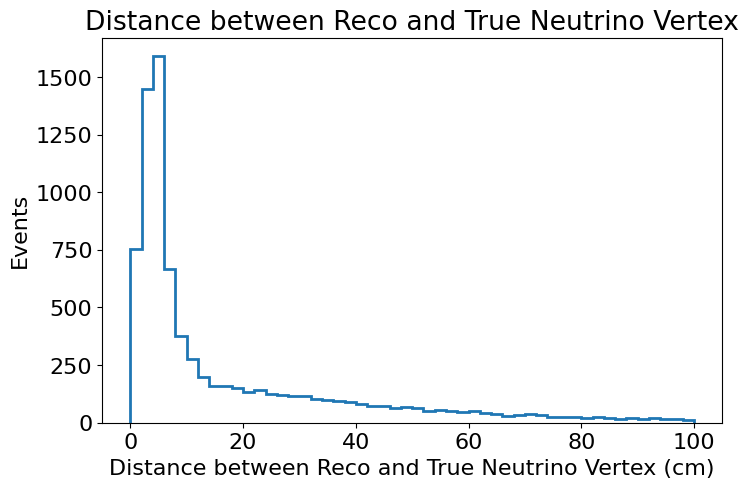

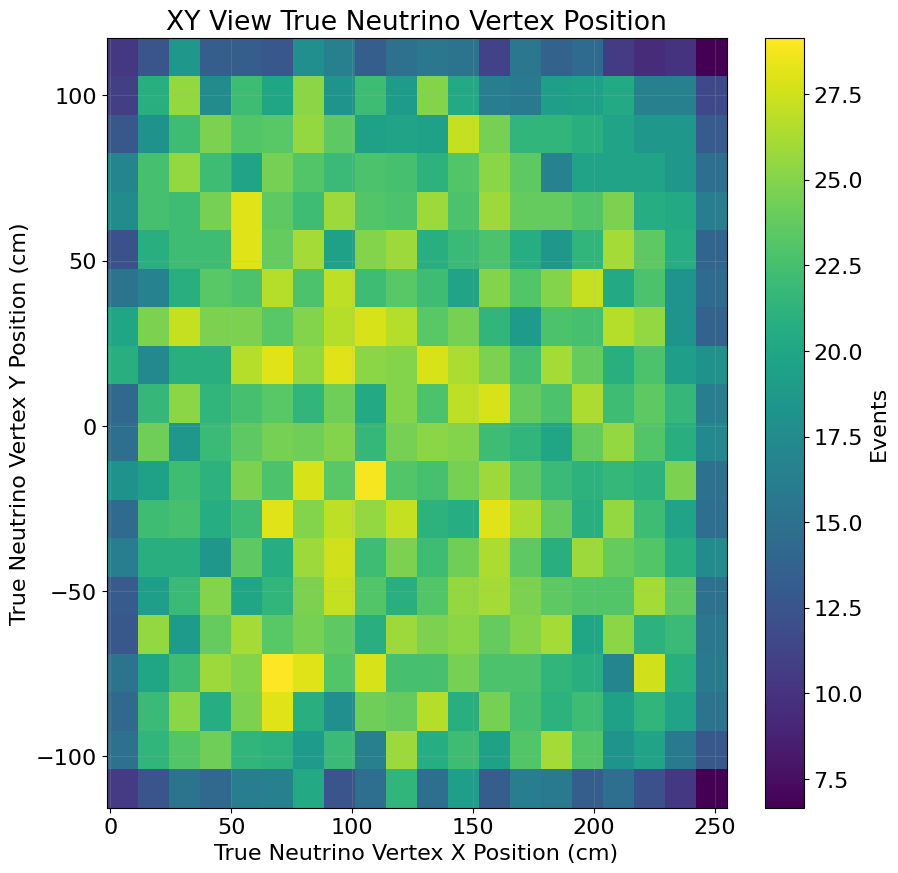

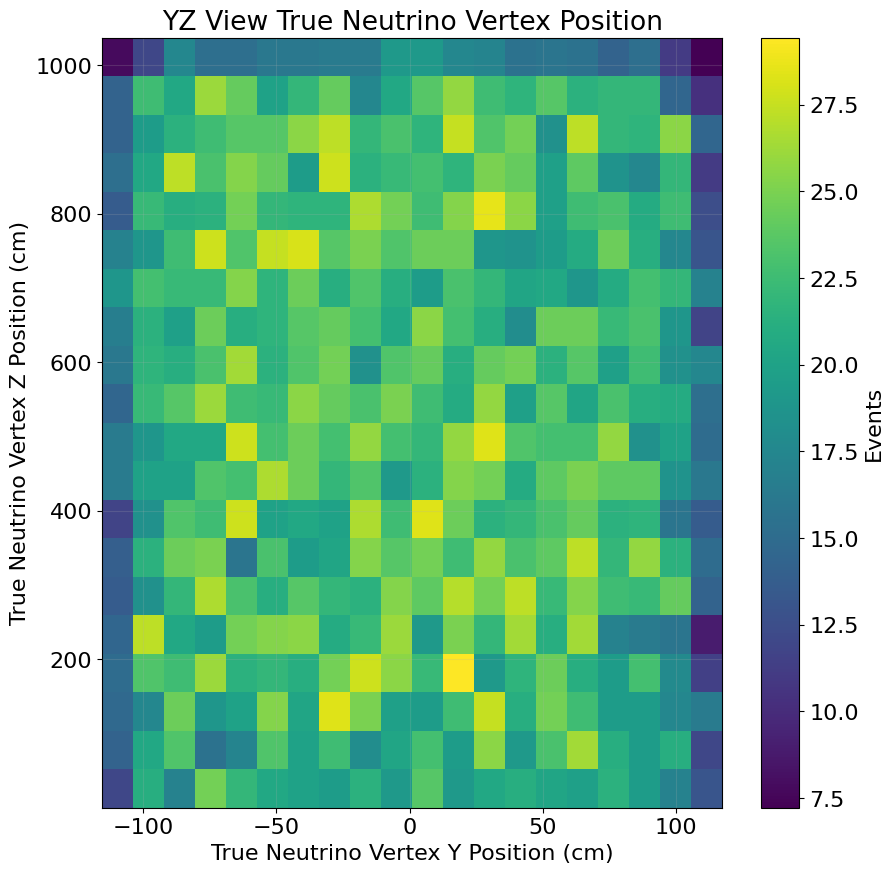

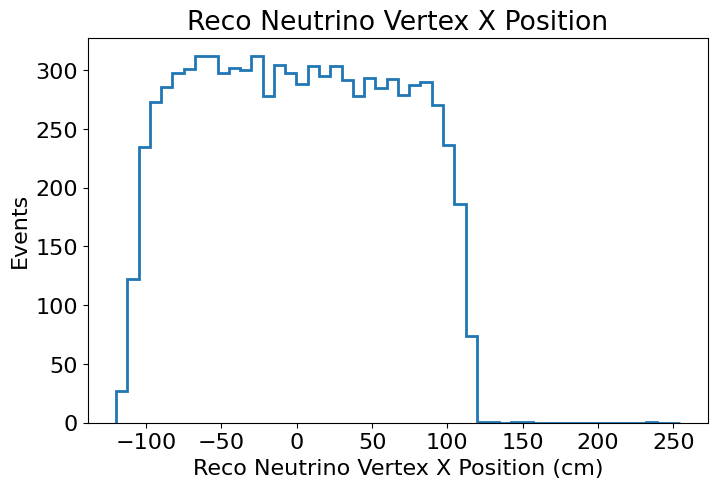

-115.51395416259766


In [1216]:
plt.rcParams.update({'font.size': 16})
lw=2

#plt.figure(figsize=(8, 5))
#plt.hist(all_df["wc_numu_score"], weights=all_df["net_weight"], bins=50, range=(-5, 5), histtype="step", lw=lw)
#plt.xlabel(r"Wire-Cell $\nu_\mu$CC BDT Score")
#plt.ylabel("Events")
#plt.title("Example Wire-Cell Plot")
#plt.show()

#plt.figure(figsize=(8, 5))
#plt.hist(all_df["nblips_saved"], weights=all_df["net_weight"], bins=50, histtype="step", lw=lw)
#plt.xlabel(r"Number of Blips Saved")
#plt.ylabel("Events")
#plt.title("Example Blip Plot")
#plt.show()

#plt.figure(figsize=(8, 5))
#plt.hist(all_df["pelee_shr_energy"], weights=all_df["net_weight"], bins=50, range=(0, 2), histtype="step", lw=lw)
#plt.xlabel(r"PeLEE Shower Energy")
#plt.ylabel("Events")
#plt.title("Example PeLEE Plot")
#plt.show()

# use only events identified as neutrino candidates using all_df.query("kine_reco_Enu > 0")

nucandidate_df = all_df.query("wc_kine_reco_Enu > 0")

# distances between reco and true neutrino vertex
plt.figure(figsize=(8, 5))
plt.hist(np.sqrt((nucandidate_df["wc_truth_vtxX"] - nucandidate_df["wc_reco_nuvtxX"])**2 + 
                 (nucandidate_df["wc_truth_vtxY"] - nucandidate_df["wc_reco_nuvtxY"])**2 + 
                 (nucandidate_df["wc_truth_vtxZ"] - nucandidate_df["wc_reco_nuvtxZ"])**2), weights=nucandidate_df["net_weight"], bins=50, range=(0, 100), histtype="step", lw=lw)
plt.xlabel(r"Distance between Reco and True Neutrino Vertex (cm)")
plt.ylabel("Events")
plt.title(r"Distance between Reco and True Neutrino Vertex")
plt.show()

import matplotlib.pyplot as plt
import numpy as np

# --- XY View ---
x = nucandidate_df["wc_truth_vtxX"]
y = nucandidate_df["wc_truth_vtxY"]

plt.figure(figsize=(10, 10))
plt.hist2d(x, y, 
           weights=nucandidate_df["net_weight"], bins=(20, 20), 
           range=[[x.min(), x.max()], [y.min(), y.max()]], cmap="viridis")
plt.colorbar(label="Events")
plt.xlabel(r"True Neutrino Vertex X Position (cm)")
plt.ylabel(r"True Neutrino Vertex Y Position (cm)")
plt.title(r"XY View True Neutrino Vertex Position")
plt.grid(alpha=0.2)
plt.show()

# --- YZ View ---
y = nucandidate_df["wc_truth_vtxY"]
z = nucandidate_df["wc_truth_vtxZ"]

plt.figure(figsize=(10, 10))
plt.hist2d(y, z, 
           weights=nucandidate_df["net_weight"], bins=(20, 20), 
           range=[[y.min(), y.max()], [z.min(), z.max()]], cmap="viridis")
plt.colorbar(label="Events")
plt.xlabel(r"True Neutrino Vertex Y Position (cm)")
plt.ylabel(r"True Neutrino Vertex Z Position (cm)")
plt.title(r"YZ View True Neutrino Vertex Position")
plt.grid(alpha=0.2)
plt.show()

# --- ZX View ---
z = nucandidate_df["wc_truth_vtxZ"]
x = nucandidate_df["wc_truth_vtxX"]

plt.figure(figsize=(10, 10))
plt.hist2d(z, x, 
           weights=nucandidate_df["net_weight"], bins=(20, 20), 
           range=[[z.min(), z.max()], [x.min(), x.max()]], cmap="viridis")
plt.colorbar(label="Events")
plt.xlabel(r"True Neutrino Vertex Z Position (cm)")
plt.ylabel(r"True Neutrino Vertex X Position (cm)")
plt.title(r"ZX View True Neutrino Vertex Position")
plt.grid(alpha=0.2)
plt.show()

# histogram of reco neutrino x vertex position 
plt.figure(figsize=(8, 5))
plt.hist(nucandidate_df["wc_reco_nuvtxY"], weights=nucandidate_df["net_weight"], bins=50, range=(-120, 254.3
                                                                                ), histtype="step", lw=lw)
plt.xlabel(r"Reco Neutrino Vertex X Position (cm)")
plt.ylabel("Events")
plt.title(r"Reco Neutrino Vertex X Position")
plt.show()

plt.figure(figsize=(8, 5))
plt.hist(nucandidate_df["wc_truth_vtxY"], weights=nucandidate_df["net_weight"], bins=50, range=(-120, 254.3), histtype="step", lw=lw)
plt.xlabel(r"True Neutrino Vertex X Position (cm)")
plt.ylabel("Events")
plt.title(r"True Neutrino Vertex X Position")
plt.show()

print(nucandidate_df["wc_truth_vtxY"].min())







In [1192]:
# find number of showers

#print(len(shower_thetas))
#print(len(nucandidate_df["wc_run"]))

#print(all_df["wc_reco_showerMomentum"].mode())
print(nucandidate_df["wc_reco_showervtxX"])

#print(all_df.columns)

# histogram of reco shower x vertex
plt.figure(figsize=(8, 5))
plt.hist(nucandidate_df["wc_reco_showervtxX"], weights=nucandidate_df["net_weight"], bins=50, range=(0, all_df["wc_reco_showervtxX"].max()), histtype="step", lw=lw)

0        230.730148
1        156.138885
2         -1.000000
4        144.645752
5         84.366699
            ...    
42285    160.642670
42286     -1.000000
42288    120.983521
42289     -1.000000
42290     63.550667
Name: wc_reco_showervtxX, Length: 30663, dtype: float64


(array([ 62.74336499, 119.10134328, 155.47028493, 165.46480325,
        160.7451696 , 183.23283581, 189.61822252, 185.17621438,
        182.95521031, 191.28397557, 185.17621438, 197.39173676,
        197.11411126, 182.39995929, 185.45383989, 186.84196743,
        195.72598371, 190.45109904, 191.83922659, 187.67484396,
        198.22461329, 187.11959294, 175.45932157, 196.28123473,
        192.1168521 , 189.0629715 , 197.66936227, 191.00635006,
        182.6775848 , 178.79082767, 179.34607869, 186.0090909 ,
        184.89858887, 180.73420624, 188.23009497, 174.07119402,
        184.62096336, 183.78808683, 172.68306648, 168.24105834,
        139.36800542,  83.56527815,  24.70867028,   0.        ,
          0.        ,   0.27762551,   0.        ,   0.        ,
          0.        ,   0.27762551]),
 array([  0.        ,   6.03058105,  12.06116211,  18.09174316,
         24.12232422,  30.15290527,  36.18348633,  42.21406738,
         48.24464844,  54.27522949,  60.30581055,  66.3363916 ,
  

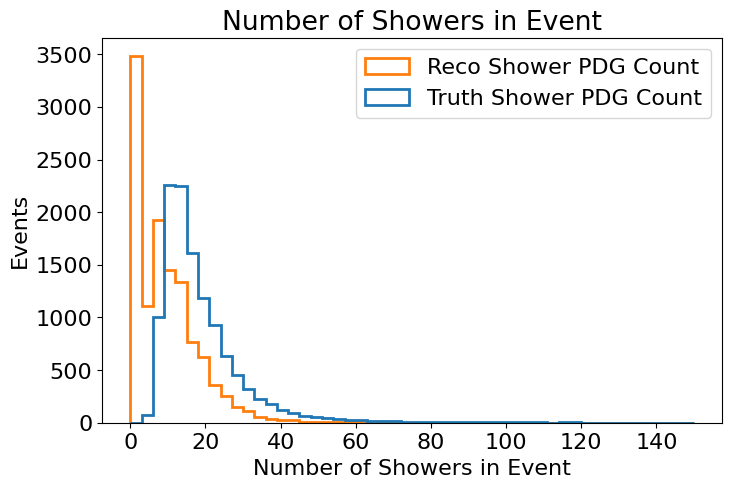

In [1193]:
# make a histogram of amount of showers in a given event; truth and reco

plt.figure(figsize=(8, 5))
plt.hist([truth_shower_pdg_counts, reco_shower_pdg_counts],
         weights=[all_df["net_weight"], all_df["net_weight"]],
         bins=50, range=(0, 150), histtype="step", lw=lw, label=["Truth Shower PDG Count", "Reco Shower PDG Count"])
plt.xlabel(r"Number of Showers in Event")
plt.ylabel("Events")
plt.title(r"Number of Showers in Event")
plt.legend()
plt.show()


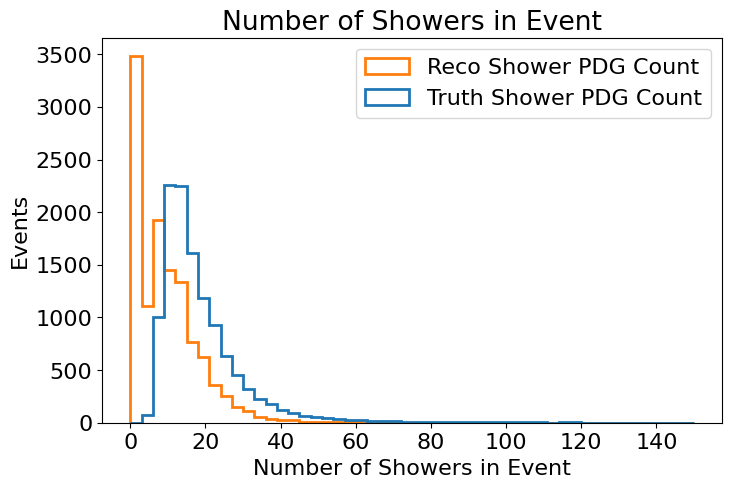

In [1194]:
# histogram of showers with some energy cutoff

plt.figure(figsize=(8, 5))
plt.hist([truth_shower_pdg_counts, reco_shower_pdg_counts],
         weights=[all_df["net_weight"], all_df["net_weight"]],
         bins=50, range=(0, 150), histtype="step", lw=lw, label=["Truth Shower PDG Count", "Reco Shower PDG Count"])
plt.xlabel(r"Number of Showers in Event")
plt.ylabel("Events")
plt.title(r"Number of Showers in Event")
plt.legend()
plt.show()


/var/folders/_s/7j_881g14zd1rn9kv4_hn7nw0000gn/T/ipykernel_63163/2446503924.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


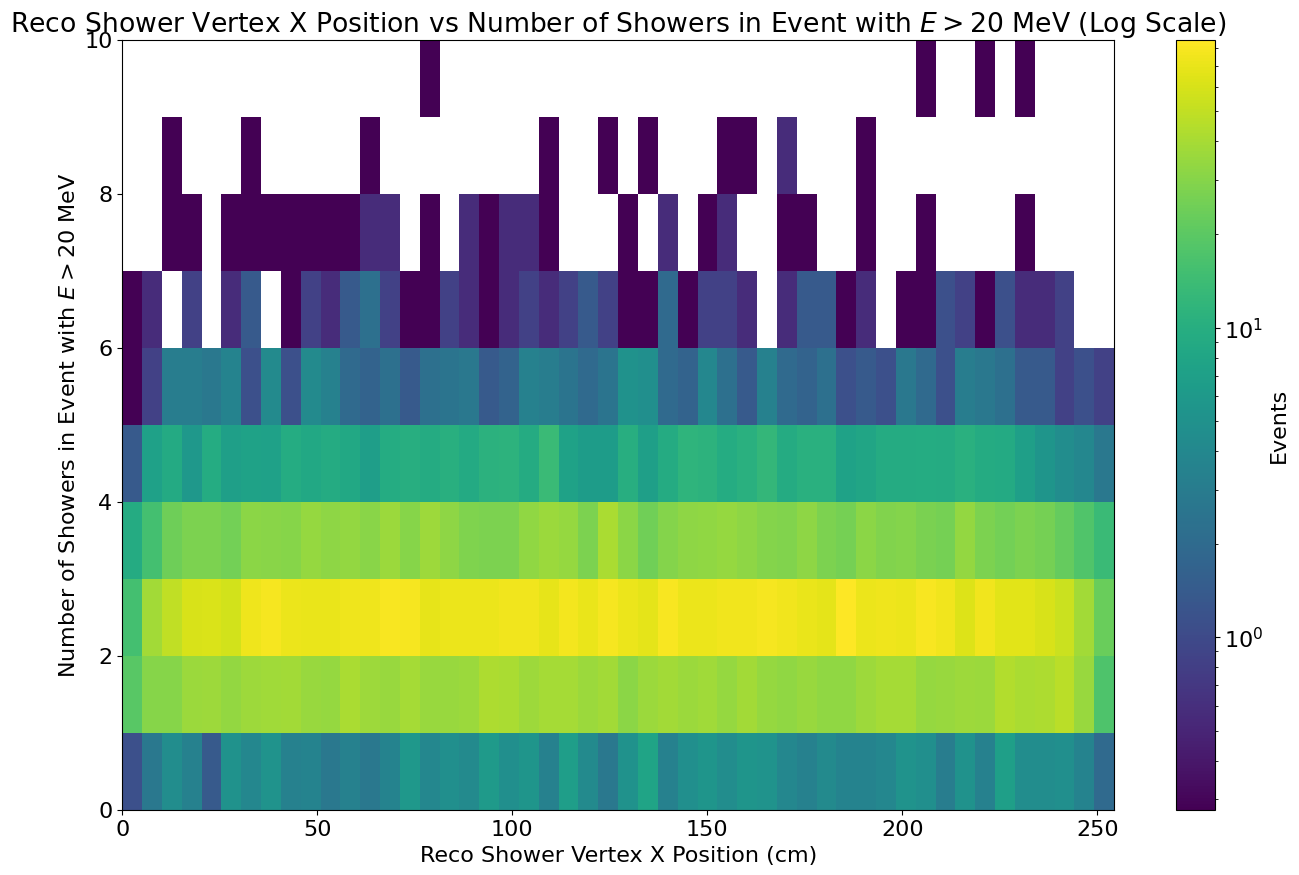

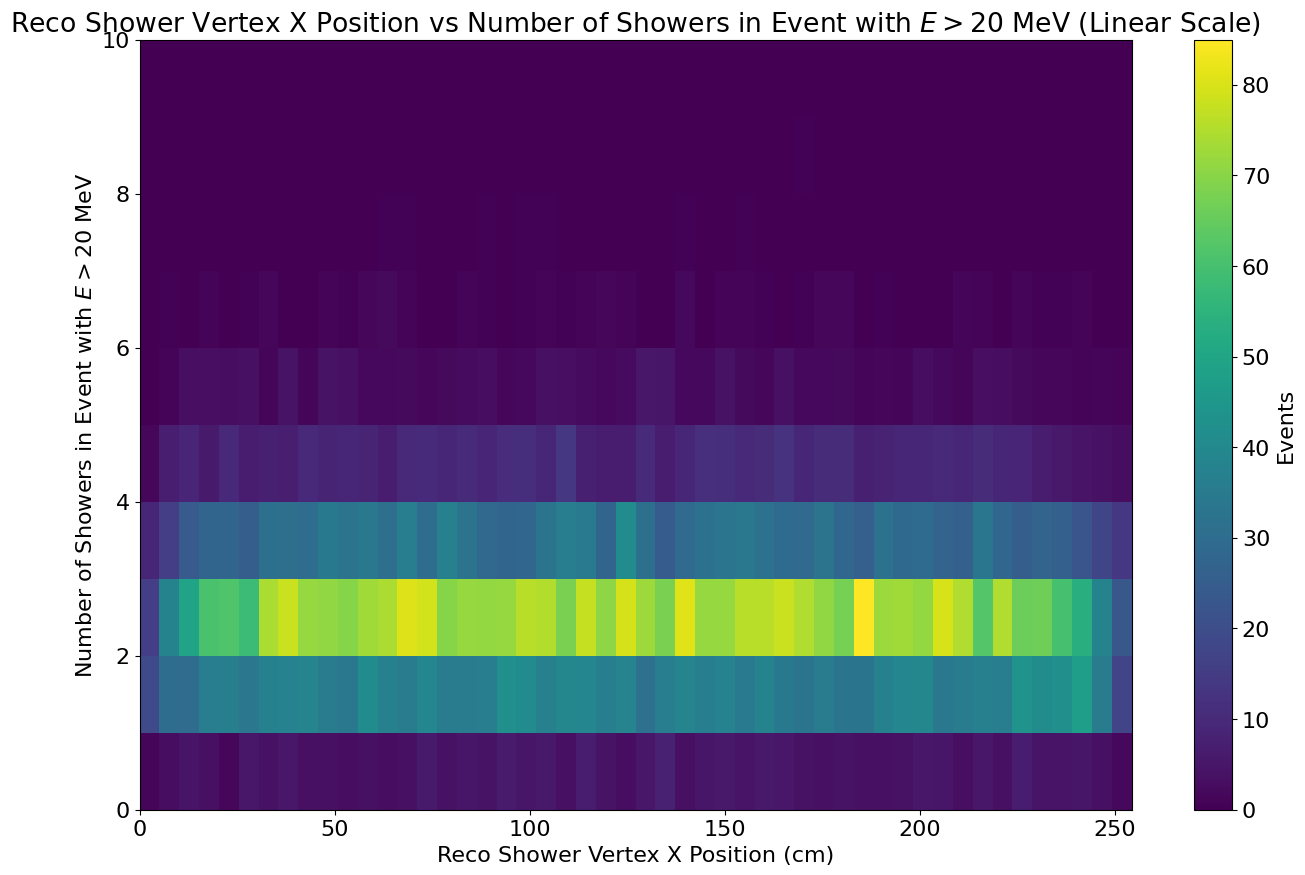

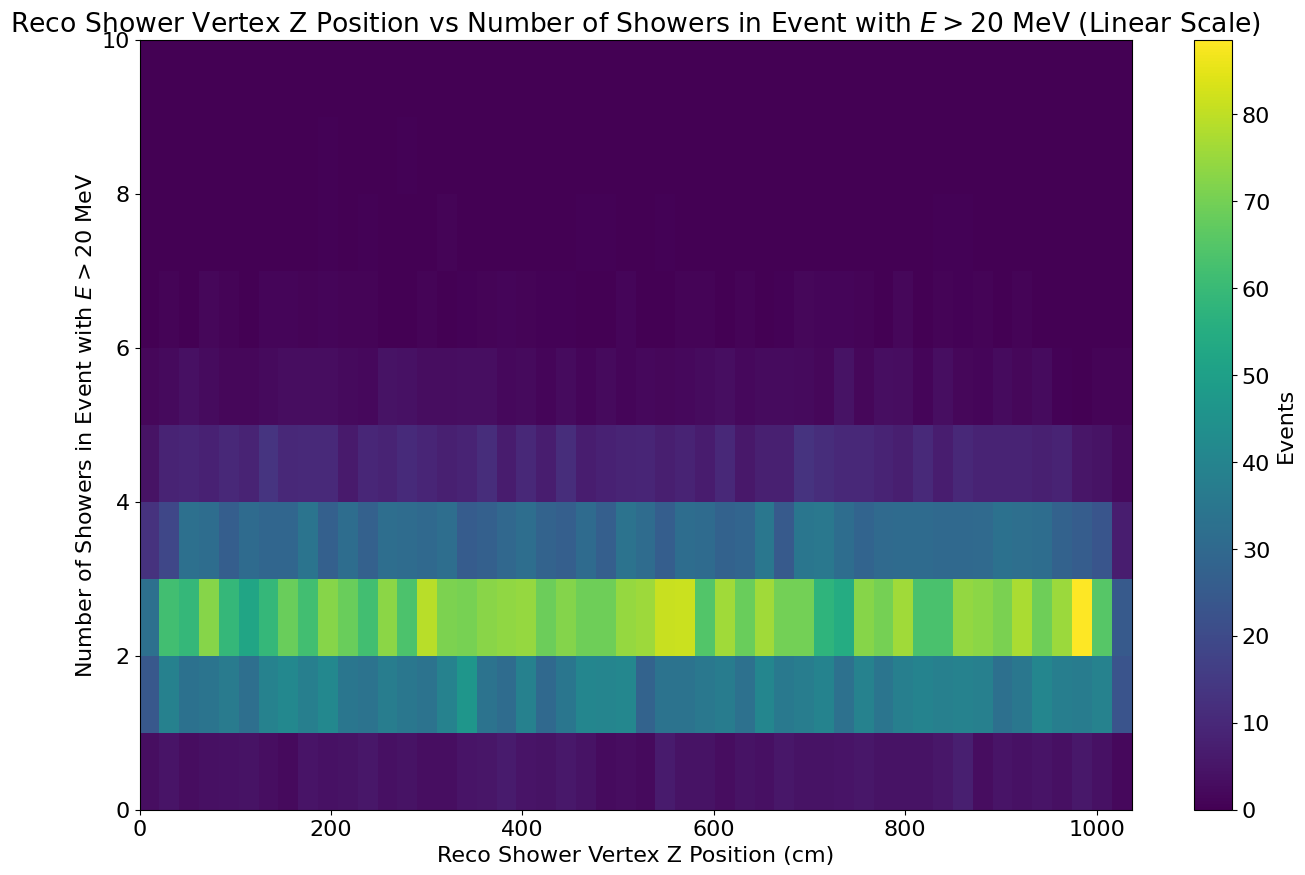

In [1195]:
# histograms of missed showers ?

# actuall identify missed showers using shw_sp_n_20mev_showers
import matplotlib.colors as colors
# histogram of 'shw_sp_n_20mev_showers'

plt.figure(figsize=(8, 5))
plt.hist(all_df["wc_shw_sp_n_20mev_showers"], weights=all_df["net_weight"], bins=50, range=(0, 15), lw=lw)
plt.xlabel(r"Number of Showers in Event with $E > 20$ MeV")
plt.yscale("log")
plt.ylabel("Events")
plt.title(r"Number of Showers in Event with $E > 20$ MeV")
plt.legend()
plt.show()

# 2d histogram of vertex x position and number of showers

plt.figure(figsize=(16, 10))
plt.hist2d(wc_df["wc_reco_showervtxX"], wc_df["wc_shw_sp_n_20mev_showers"], 
           weights=all_df["net_weight"], bins=(50, 10), range=((0, 254.3), (0, 10)), norm=colors.LogNorm(), cmap="viridis")
plt.colorbar(label="Events")
plt.xlabel(r"Reco Shower Vertex X Position (cm)")
plt.ylabel(r"Number of Showers in Event with $E > 20$ MeV")
plt.title(r"Reco Shower Vertex X Position vs Number of Showers in Event with $E > 20$ MeV (Log Scale)")
plt.show()


plt.figure(figsize=(16, 10))
plt.hist2d(wc_df["wc_reco_showervtxX"], wc_df["wc_shw_sp_n_20mev_showers"], 
           weights=all_df["net_weight"], bins=(50, 10), range=((0, 254.3), (0, 10)), cmap="viridis")
plt.colorbar(label="Events")
plt.xlabel(r"Reco Shower Vertex X Position (cm)")
plt.ylabel(r"Number of Showers in Event with $E > 20$ MeV")
plt.title(r"Reco Shower Vertex X Position vs Number of Showers in Event with $E > 20$ MeV (Linear Scale)")
plt.show()

# 2d histogram of vertex y position and number of showers linear

# replace events with wc_reco_showervtxY = -1 with -999

no_neg_one_y = wc_df["wc_reco_showervtxY"].replace(-1, -999)

plt.figure(figsize=(16, 10))
plt.hist2d(no_neg_one_y, wc_df["wc_shw_sp_n_20mev_showers"], 
           weights=all_df["net_weight"], bins=(50, 10), range=((-120, 120), (0, 10)), cmap="viridis")
plt.colorbar(label="Events")
plt.xlabel(r"Reco Shower Vertex Y Position (cm)")
plt.ylabel(r"Number of Showers in Event with $E > 20$ MeV")
plt.title(r"Reco Shower Vertex Y Position vs Number of Showers in Event with $E > 20$ MeV (Linear Scale)")
plt.show()


# 2d histogram of vertex z position and number of showers linear
plt.figure(figsize=(16, 10))
plt.hist2d(wc_df["wc_reco_showervtxZ"], wc_df["wc_shw_sp_n_20mev_showers"], 
           weights=all_df["net_weight"], bins=(50, 10), range=((0, 1036.4), (0, 10)), cmap="viridis")
plt.colorbar(label="Events")
plt.xlabel(r"Reco Shower Vertex Z Position (cm)")
plt.ylabel(r"Number of Showers in Event with $E > 20$ MeV")
plt.title(r"Reco Shower Vertex Z Position vs Number of Showers in Event with $E > 20$ MeV (Linear Scale)")
plt.show()



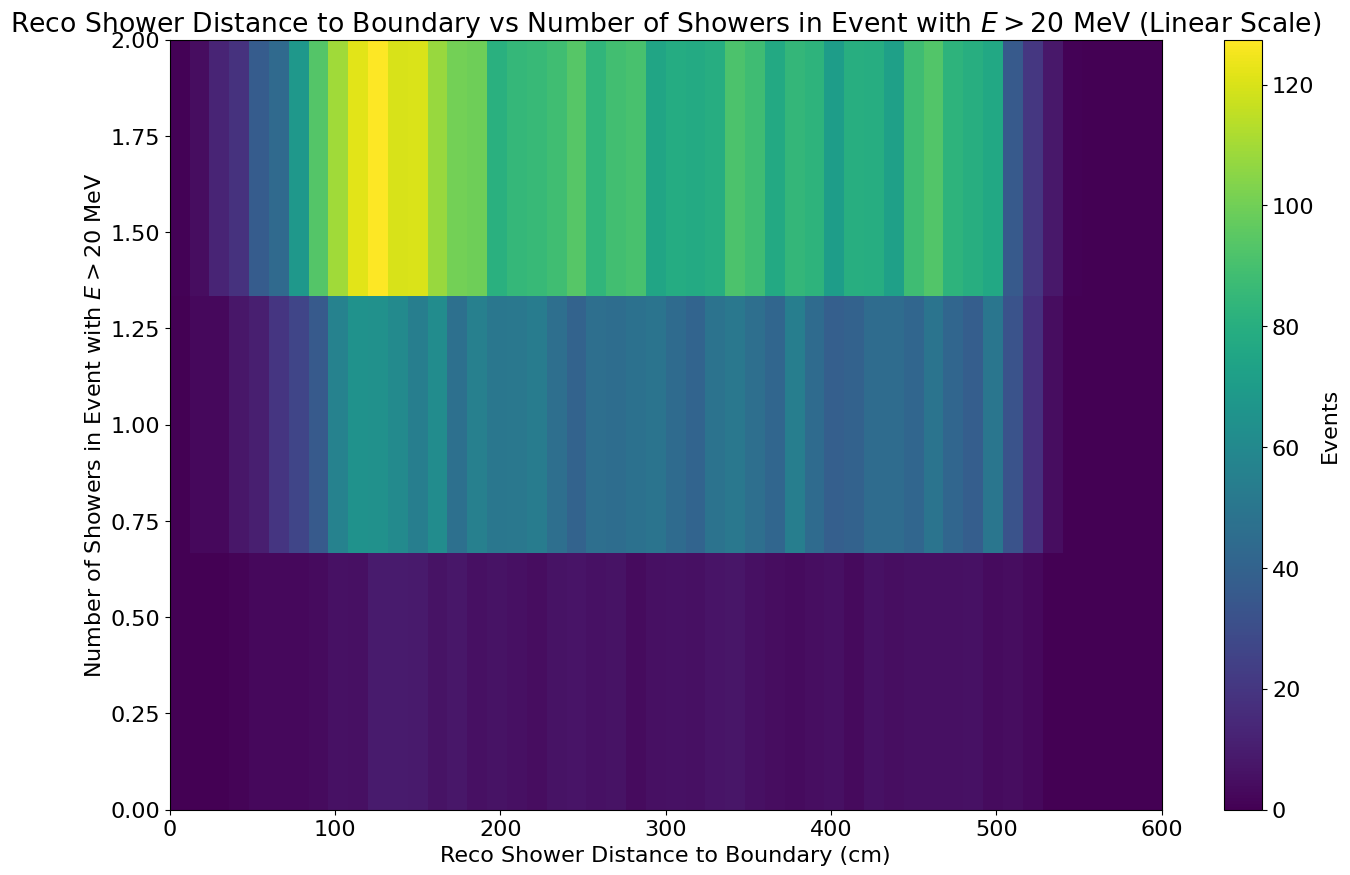

In [1196]:
# 2d histogram of distance to boundary and number of showers linear

plt.figure(figsize=(16, 10))
plt.hist2d(wc_df["wc_reco_distance_to_boundary"], wc_df["wc_shw_sp_n_20mev_showers"], 
           weights=all_df["net_weight"], bins=(50, 3), range=((1.8, 150), (0, 2)), cmap="viridis")
plt.colorbar(label="Events")
plt.xlabel(r"Reco Shower Distance to Boundary (cm)")
plt.ylabel(r"Number of Showers in Event with $E > 20$ MeV")
plt.title(r"Reco Shower Distance to Boundary vs Number of Showers in Event with $E > 20$ MeV (Linear Scale)")
plt.show()

# make my own distance to boundary variable
distance_to_boundary = []
for i in range(len(wc_df["wc_reco_showervtxX"])):
    x = wc_df["wc_reco_showervtxX"][i] - 130.  # center of the TPC in x
    y = wc_df["wc_reco_showervtxY"][i] 
    z = wc_df["wc_reco_showervtxZ"][i] - 525.  # center of the TPC in z
    if x == -1 or y == -1 or z == -1:
        distance = -1
        distance_to_boundary.append(distance)
        continue  # skip invalid entries
    distance = np.sqrt(x**2 + y**2 + z**2)
    distance_to_boundary.append(distance)

        
distance_to_boundary = np.array(distance_to_boundary)
    
plt.figure(figsize=(16, 10))
plt.hist2d(distance_to_boundary, wc_df["wc_shw_sp_n_20mev_showers"], 
           weights=all_df["net_weight"], bins=(50, 3), range=((0, 600), (0, 2)), cmap="viridis")
plt.colorbar(label="Events")
plt.xlabel(r"Reco Shower Distance to Boundary (cm)")
plt.ylabel(r"Number of Showers in Event with $E > 20$ MeV")
plt.title(r"Reco Shower Distance to Boundary vs Number of Showers in Event with $E > 20$ MeV (Linear Scale)")
plt.show()

        

In [1197]:
# figure out some way to normalize the number of events per distance away from center of tpc using truth ? 

In [1198]:
# what percent of NC pi0 events have an associated proton?

# find entries in truth_pdg that are 111 (pi0) and have a 2212 (proton) in the same event

truth_pdg = f["wcpselection"]["T_PFeval"]["truth_pdg"]  # truth particle pdg codes
truth_mother = f["wcpselection"]["T_PFeval"]["truth_mother"]  # truth particle mother pdg codes
truth_pdg = np.array(truth_pdg)  # convert to numpy array for easier processing
truth_mother = np.array(truth_mother)  # convert to numpy array for easier processing

truth_startMomentum = f["wcpselection"]["T_PFeval"]["truth_startMomentum"]  # truth particle start momentum 
truth_startMomentum = np.array(truth_startMomentum)  # convert to numpy array for easier processing


kine_energy_particle = f["wcpselection"]["T_KINEvars"]["kine_energy_particle"]  # kinetic energy of each reco particle
kine_energy_particle = np.array(kine_energy_particle) 

print(kine_energy_particle) # convert to numpy array for easier processing

pio_and_photon_flag = []
pio_flag = []
 # convert to list
for evt_idx, event in enumerate(truth_pdg):
    photon_indices = []
    for particle_index in range(len(event)):
        if event[particle_index] == 2212:
            photon_indices.append(particle_index)
            #print("Found proton in event", evt_idx, "at index", particle_index, "with mother", truth_mother[evt_idx][particle_index])
            break
    for i in photon_indices:
        if truth_mother[evt_idx][i] == 0 and (truth_startMomentum[evt_idx][i][3] - .93827) > 0.035:  # check if the proton is primary and has kinetic energy > 35 MeV
            pio_and_photon_flag.append(True)
    if 111 not in event:
        pio_flag.append(False)
    if 111 in event:
        pio_flag.append(np.sum(event == 111))


# all events with a pi0 and a proton
count = 0
count2 = 0
for event in truth_pdg:
    if 111 in event:  # check if pi0 is present
        pio_flag.append(True)
        if 2212 in event:  # check if proton is present
            #pio_and_photon_flag.append(True)
            count2+=1
            continue
        else:
            count+=1
    else:
        count +=1



# plot the fraction of NC pi0 events with an associated proton

pio_and_photon_flag = np.array(pio_and_photon_flag)
truth_pdg = f["wcpselection"]["T_PFeval"]["truth_pdg"]  # truth particle pdg codes

num_pio_events = np.sum(pio_flag)  # total number of pi0 events
num_pio_and_photon_events = np.sum(pio_and_photon_flag)  # total number of pi0 events with an associated proton

#print("Total number of pi0 events:", num_pio_events)
#print("Total number of pi0 events with an associated proton:", num_pio_and_proton_events)
# calculate the fraction of pi0 events with an associated proton
pio_fraction_with_photon = num_pio_and_photon_events / 42294

print("Fraction of NC pi0 events with an associated photon:", pio_fraction_with_photon)


#print(np.array(truth_pdg))

"truth_pdg"


[array([355.30817 , 203.83015 ,  25.788746,  20.767609], dtype=float32)
 array([ 95.4797   ,  82.060555 ,  40.38527  , 144.00839  ,  71.894264 ,
          7.604262 ,   2.170977 ,   1.8207767,   1.978713 ,   1.39195  ],
       dtype=float32)
 array([ 36.23437   ,  14.488093  ,  30.275517  , 178.35072   ,
          0.99543923,   5.022283  ], dtype=float32)             ...
 array([], dtype=float32) array([], dtype=float32)
 array([], dtype=float32)]
Fraction of NC pi0 events with an associated photon: 0.5252990967986003


'truth_pdg'

In [1199]:
# repeating above with reco variables 

reco_pdg = f["wcpselection"]["T_PFeval"]["reco_pdg"]  # truth particle pdg codes
reco_mother = f["wcpselection"]["T_PFeval"]["reco_mother"]  # truth particle mother pdg codes

kine_energy_particle = f["wcpselection"]["T_KINEvars"]["kine_energy_particle"]

np.array(kine_energy_particle)  # convert to numpy array for easier processing

print(kine_energy_particle)

f["wcpselection"]["T_KINEvars"]["kine_energy_particle"].keys()  # reco particle kinetic energy

print(np.shape(kine_energy_particle), np.shape(reco_pdg), np.shape(reco_mother))

kine_energy_particle = np.array(kine_energy_particle)  # convert to numpy array for easier processing
reco_pdg = np.array(reco_pdg)  # convert to numpy array for easier processing
reco_mother = np.array(reco_mother)  # convert to numpy array for easier processing

pio_and_photon_flag = []
pio_flag = []
 # convert to list
for evt_idx, event in enumerate(reco_pdg):
    if len(event) == 0 or len(reco_mother[evt_idx]) == 0 or len(kine_energy_particle[evt_idx]) == 0:
        continue  # skip empty events
    photon_indices = []
    for particle_index in range(len(event)):
        if event[particle_index] == 2212:
            photon_indices.append(particle_index)
            break
    for i in photon_indices:
        if reco_mother[evt_idx][i] == 0 and kine_energy_particle[evt_idx][i] > .035:
            pio_and_photon_flag.append(True)
    if 111 not in event:
        pio_flag.append(False)
    if 111 in event:
        #pio_flag.append(np.sum(event == 111))
        pio_flag.append(True)

    
print(f"{np.sum(pio_and_photon_flag)} / {np.sum(pio_flag)}")

print(np.sum(pio_and_photon_flag) / np.sum(pio_flag))  # print the fraction of pi0 events with an associated proton

<TBranchElement 'kine_energy_particle' at 0x00061f75f6a0>
(42294,) (42294,) (42294,)
11337 / 14152
0.801088185415489


In [1200]:
# see if photons that scatter outside of the TPC are counted as showers in truth

import awkward as ak

photon_outside_tpcs = []

photons_from_pi0 = []

truth_startXYZT = f["wcpselection"]["T_PFeval"]["truth_startXYZT"]  # truth particle start position and time
truth_startXYZT = np.array(truth_startXYZT)  # convert to numpy array for easier processing

print(np.shape(truth_startXYZT))


truth_pdg = f["wcpselection"]["T_PFeval"]["truth_pdg"]  # truth particle pdg codes
truth_mother = f["wcpselection"]["T_PFeval"]["truth_mother"]  # truth particle mother pdg codes
truth_pdg = np.array(truth_pdg)  # convert to numpy array for easier processing
truth_mother = np.array(truth_mother)  # convert to numpy array for easier processing

truth_startMomentum = f["wcpselection"]["T_PFeval"]["truth_startMomentum"]  # truth particle start momentum 
truth_startMomentum = np.array(truth_startMomentum)  # convert to numpy array for easier processing


kine_energy_particle = f["wcpselection"]["T_KINEvars"]["kine_energy_particle"]  # kinetic energy of each reco particle
kine_energy_particle = np.array(kine_energy_particle) 
 # convert to list
 # 
 # 
xx = []
yy = []
zz = []
for evt_idx, event in enumerate(truth_pdg):
    photon_indices = [i for i, p in enumerate(event) if p == 22]
    for i in photon_indices:
        if truth_mother[evt_idx][i] == 0:
            x, y, z = truth_startXYZT[evt_idx][i][0], truth_startXYZT[evt_idx][i][1], truth_startXYZT[evt_idx][i][2]
            xx.append(x)
            yy.append(y)
            zz.append(z)
            #print("Photon start position:", x, y, z)
            if x < -1 or x > 254.3 or y < -110 or y > 117 or z < 6 or z > 1002:
                print(f"    Photon from pi0 found outside of TPC in event {evt_idx}")
    if 111 not in event:
        pio_flag.append(False)
    else:
        pio_flag.append(sum(p == 111 for p in event))

#print(truth_startXYZT)



print(f'range of photon along x: {np.min(xx)} to {np.max(xx)}')
print(f'range of photon along y: {np.min(yy)} to {np.max(yy)}')
print(f'range of photon along z: {np.min(zz)} to {np.max(zz)}')



(42294,)
    Photon from pi0 found outside of TPC in event 34110
range of photon along x: -0.3818800151348114 to 246.2207489013672
range of photon along y: -110.72865295410156 to 107.9645004272461
range of photon along z: 6.941678047180176 to 1001.3209228515625


Event 27 has 1 photons from pi0
vertex location: 23.25510025024414, -48.032249450683594, 610.2109375
Event 781 has 1 photons from pi0
vertex location: 3.5975046157836914, 112.80227661132812, 945.2906494140625
Event 1035 has 2 photons from pi0
vertex location: 69.09063720703125, -83.02330017089844, 322.0942077636719
Event 1558 has 1 photons from pi0
vertex location: 16.32088851928711, 31.815982818603516, 357.0698547363281
Event 1581 has 2 photons from pi0
vertex location: 145.80325317382812, -59.851070404052734, 32.689178466796875
Event 1585 has 1 photons from pi0
vertex location: 86.72918701171875, 101.41213989257812, 183.73062133789062
Event 1833 has 2 photons from pi0
vertex location: 2.8429758548736572, -106.83741760253906, 614.0078125
Event 2118 has 1 photons from pi0
vertex location: 176.45997619628906, 5.42570686340332, 967.1571044921875
Event 2229 has 1 photons from pi0
vertex location: 147.62420654296875, 25.789180755615234, 220.33370971679688
Event 2465 has 2 photons from pi0


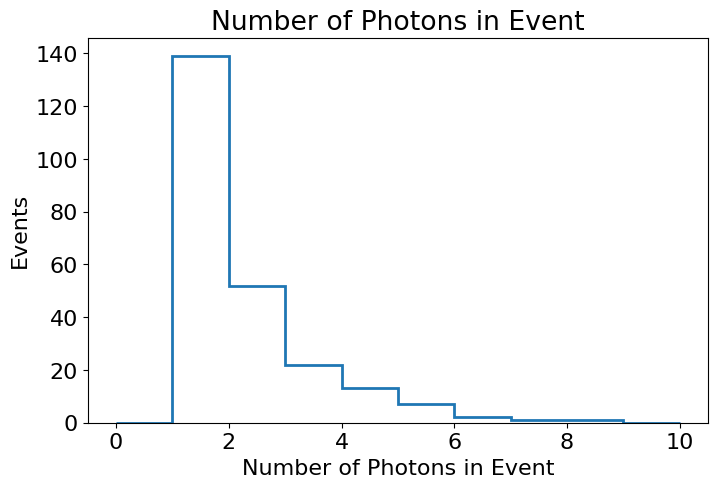

nue_score  numu_score  nc_delta_score  nc_pio_score  numu_cc_flag  \
0     -15.000000   -0.445759       -0.986454      3.598568           0.0   
1      -8.405992   -0.906318       -6.305526      3.168464           0.0   
2     -15.000000    1.700583       -0.913104     -0.312040           0.0   
3     -15.000000   -3.821578       -2.275953     -1.729817          -1.0   
4      -9.779932   -1.000641       -7.236095      5.160080           0.0   
...          ...         ...             ...           ...           ...   
42289 -15.000000    2.166740       -7.223006     -3.473993           1.0   
42290 -15.000000    1.021837       -3.612303     -0.145557           0.0   
42291 -15.000000   -3.821578       -2.275953     -1.729817          -1.0   
42292 -15.000000   -3.340668       -2.275953     -1.729817          -1.0   
42293 -15.000000   -3.821578       -2.275953     -1.729817          -1.0   

         run  subrun  event  match_isFC  truth_nuEnergy  ...  reco_Ntrack  \
0      20290      30   1510        True     1415.797485  ...            8   
1      20290      30   1521        True     2649.550049  ...           18   
2      20290      30   1537       False      840.083069  ...           11   
3      20290      30   1541        True     1657.857056  ...            0   
4      20290      30   1543       False     1086.874634  ...           13   
...      ...     ...    ...         ...             ...  ...          ...   
42289  20245     391  19568       False     3558.931396  ...           11   
42290  20245     391  19577       False     1027.518921  ...           13   
42291  20245     391  19579        True     1092.887207  ...            0   
42292  20245     391  19583       False     1313.793091  ...            0   
42293  20245     391  19589        True     1741.371826  ...            0   

                                                 reco_id  \
0      [34000, 35014, 44028, 38021, 35033, 35034, 440...   
1      [47019, 47033, 47014, 44004, 45009, 55027, 510...   
2      [35010, 35011, 34007, 33001, 36012, 37013, 340...   
3                                                     []   
4      [32018, 30002, 36024, 37025, 38026, 40028, 320...   
...                                                  ...   
42289  [27001, 27003, 27020, 29006, 33009, 34010, 350...   
42290  [23001, 23002, 23003, 23004, 23021, 104013, 24...   
42291                                                 []   
42292                                                 []   
42293                                                 []   

                                                reco_pdg  \
0                [2212, 11, 11, 2212, 111, 22, 22, 2112]   
1      [2212, 13, 11, 11, 11, 11, 11, 11, 11, 11, 111...   
2        [2212, 11, 11, 11, 11, 11, 111, 22, 22, 22, 22]   
3                                                     []   
4      [11, 11, 2212, 11, 2212, 11, 111, 22, 22, 2112...   
...                                                  ...   
42289  [2212, 2212, 13, 11, 11, 2212, 2212, 22, 22, 2...   
42290  [2212, 211, 13, 2212, 2212, 11, 11, 11, 11, 22...   
42291                                                 []   
42292                                                 []   
42293                                                 []   

                                             reco_mother  \
0           [0, 35034, 44035, 38036, 0, 35033, 35033, 0]   
1      [0, 0, 0, 44035, 45036, 55037, 51038, 52039, 5...   
2      [0, 0, 34016, 33017, 36018, 37019, 35010, 3401...   
3                                                     []   
4      [32037, 30038, 36039, 37040, 38041, 40042, 0, ...   
...                                                  ...   
42289  [0, 0, 0, 29021, 33022, 34023, 35024, 0, 29006...   
42290  [0, 0, 0, 23002, 0, 104024, 24025, 101026, 106...   
42291                                                 []   
42292                                                 []   
42293                                                 []   

      

In [1201]:
# generate histogram of pi0 photon occurences

truth_pdg = f["wcpselection"]["T_PFeval"]["truth_pdg"]  # truth particle pdg codes
truth_mother = f["wcpselection"]["T_PFeval"]["truth_mother"]  # truth particle mother pdg codes
truth_pdg = np.array(truth_pdg)  # convert to numpy array for easier processing
truth_mother = np.array(truth_mother)  # convert to numpy array for easier processing

num_photons_list = []

for evt_idx, event in enumerate(truth_pdg):
    num_photons = 0
    photon_indices = [i for i, p in enumerate(event) if p == 22]
    for i in photon_indices:
        #print(truth_mother[evt_idx][i])
        if truth_mother[evt_idx][i] == 0 or truth_mother[evt_idx][i] == 111:
            num_photons += 1
    if num_photons > 0:
        print(f"Event {evt_idx} has {num_photons} photons from pi0")
        print(f'vertex location: {truth_startXYZT[evt_idx][photon_indices[0]][0]}, {truth_startXYZT[evt_idx][photon_indices[0]][1]}, {truth_startXYZT[evt_idx][photon_indices[0]][2]}')

    if num_photons > 0:
        num_photons_list.append(num_photons)
    #if 111 not in event:
    #    pio_flag.append(False)
    #else:
        #pio_flag.append(sum(p == 111 for p in event))

plt.figure(figsize=(8, 5))
plt.hist(num_photons_list, bins=10, range=(0, 10), histtype="step", lw=lw)
plt.xlabel(r"Number of Photons in Event")
plt.ylabel("Events")
plt.title(r"Number of Photons in Event")
plt.show()

nu_overlay_df


[22]
mother of mother: [111]
[22]
mother of mother: [-11]
[22]
mother of mother: [11]


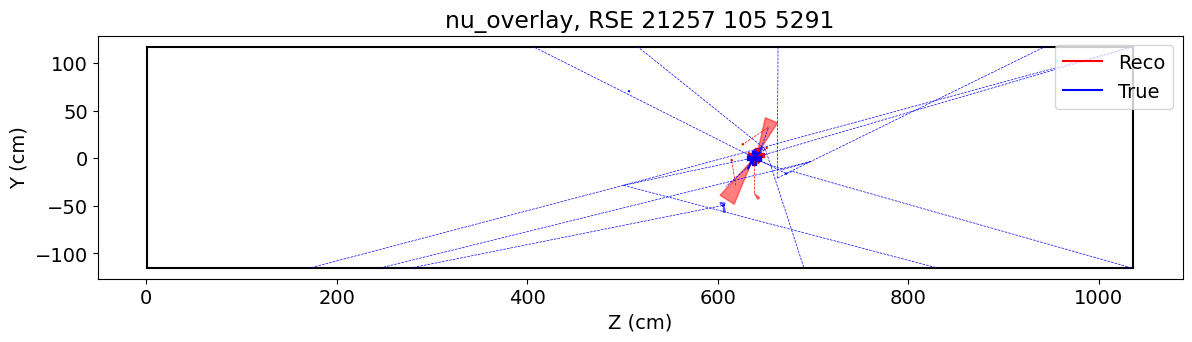

[22]
mother of mother: [111]
[22]
mother of mother: [-11]
[22]
mother of mother: [11]


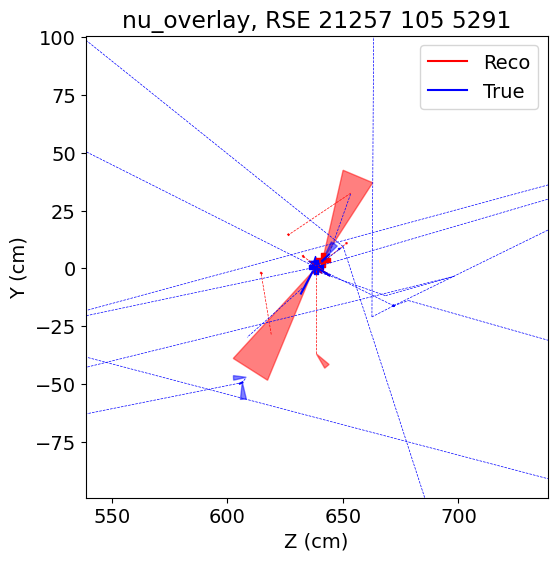

[22]
mother of mother: [111]
[22]
mother of mother: [-11]
[22]
mother of mother: [11]


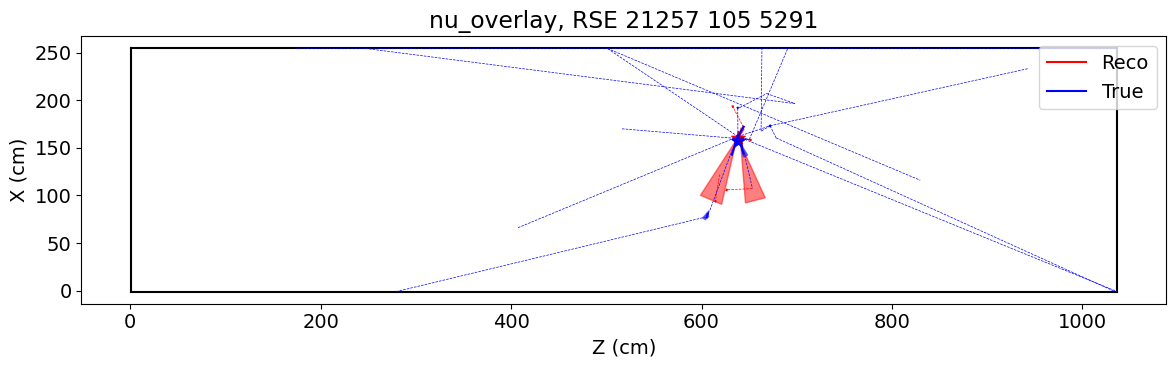

[22]
mother of mother: [111]
[22]
mother of mother: [-11]
[22]
mother of mother: [11]


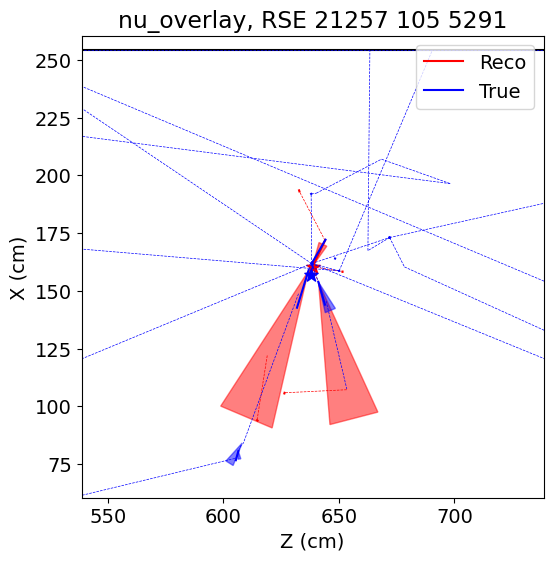

[22]
mother of mother: [111]
[22]
mother of mother: [-11]
[22]
mother of mother: [11]


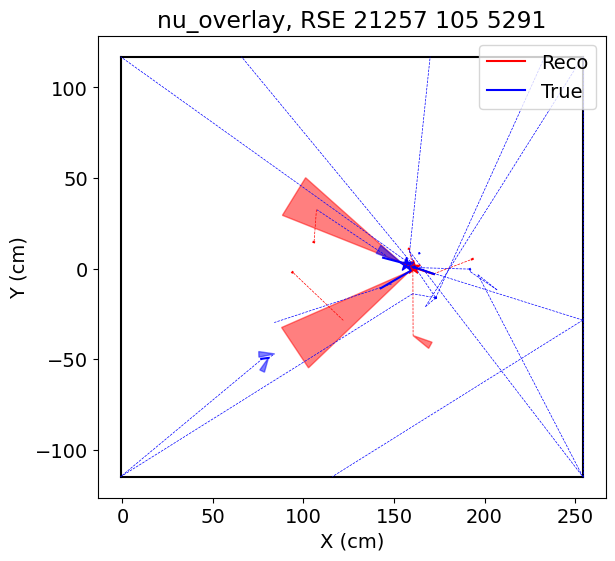

[22]
mother of mother: [111]
[22]
mother of mother: [-11]
[22]
mother of mother: [11]


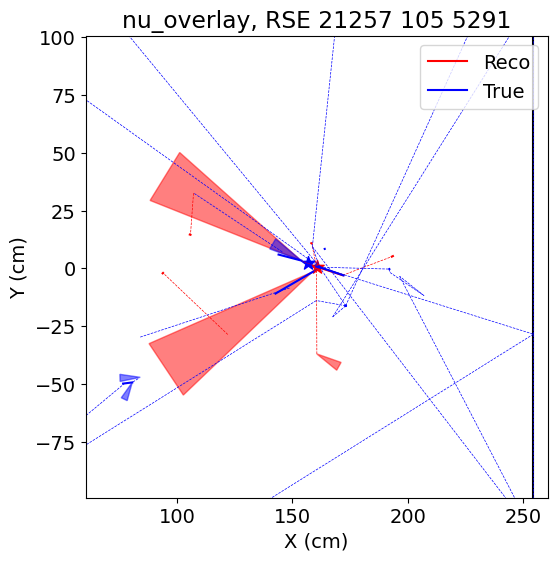

In [1202]:
# full event displays

def show_simplified_event_display(one_event_df, view="zy", index=0, zoomed=False):
    file = one_event_df["file"].to_numpy()[index]
    run = one_event_df["run"].to_numpy()[index]
    #print(run)
    subrun = one_event_df["subrun"].to_numpy()[index]
    event = one_event_df["event"].to_numpy()[index]

    reco_ids = one_event_df["reco_id"].to_numpy()[index]
    reco_pdgs = one_event_df["reco_pdg"].to_numpy()[index]
    reco_start_XYZTs = one_event_df["reco_startXYZT"].to_numpy()[index]
    reco_end_XYZTs = one_event_df["reco_endXYZT"].to_numpy()[index]

    truth_ids = one_event_df["truth_id"].to_numpy()[index]
    truth_pdgs = one_event_df["truth_pdg"].to_numpy()[index]
    truth_start_XYZTs = one_event_df["truth_startXYZT"].to_numpy()[index]
    truth_end_XYZTs = one_event_df["truth_endXYZT"].to_numpy()[index]

    tpc_min_x = -1.
    tpc_max_x = 254.3
    tpc_min_y = -115.
    tpc_max_y = 117.
    tpc_min_z = 0.6
    tpc_max_z = 1036.4

    plt.rcParams.update({'font.size': 14})

    plt.figure(figsize=(14, 6))
    if view == "zy":
        plt.plot([tpc_min_z, tpc_max_z], [tpc_min_y, tpc_min_y], c="k")
        plt.plot([tpc_min_z, tpc_max_z], [tpc_max_y, tpc_max_y], c="k")
        plt.plot([tpc_min_z, tpc_min_z], [tpc_min_y, tpc_max_y], c="k")
        plt.plot([tpc_max_z, tpc_max_z], [tpc_min_y, tpc_max_y], c="k")
    elif view =="zx":
        plt.plot([tpc_min_z, tpc_max_z], [tpc_min_x, tpc_min_x], c="k")
        plt.plot([tpc_min_z, tpc_max_z], [tpc_max_x, tpc_max_x], c="k")
        plt.plot([tpc_min_z, tpc_min_z], [tpc_min_x, tpc_max_x], c="k")
        plt.plot([tpc_max_z, tpc_max_z], [tpc_min_x, tpc_max_x], c="k")
    elif view == "xy":
        plt.plot([tpc_min_x, tpc_max_x], [tpc_min_y, tpc_min_y], c="k")
        plt.plot([tpc_min_x, tpc_max_x], [tpc_max_y, tpc_max_y], c="k")
        plt.plot([tpc_min_x, tpc_min_x], [tpc_min_y, tpc_max_y], c="k")
        plt.plot([tpc_max_x, tpc_max_x], [tpc_min_y, tpc_max_y], c="k")
    plt.plot([], [], c="r", label="Reco")
    plt.plot([], [], c="b", label="True")
    for j in range(len(reco_pdgs)):
        start_x, start_y, start_z, start_t = reco_start_XYZTs[j]
        end_x, end_y, end_z, end_t = reco_end_XYZTs[j]
        if view == "zy":
            start = np.array([start_z, start_y])
            end = np.array([end_z, end_y])
        elif view == "zx":
            start = np.array([start_z, start_x])
            end = np.array([end_z, end_x])
        elif view == "xy":
            start = np.array([start_x, start_y])
            end = np.array([end_x, end_y])
        pdg = reco_pdgs[j]
        if Particle.from_pdgid(pdg).charge == 0: # invisible particle, draw dashed line
            plt.plot([start[0], end[0]], [start[1], end[1]], c="r", linestyle="--", lw=0.5)
        elif pdg == 11: # shower, plot cone
        #elif pdg == 22:
            direction = end - start
            length = np.linalg.norm(direction)
            unit_direction = direction / length
            perp = np.array([-unit_direction[1], unit_direction[0]])
            angle_rad = np.radians(20 / 2)
            side_length = length * np.tan(angle_rad)
            side1 = end - side_length * perp
            side2 = end + side_length * perp
            triangle = np.array([start, side1, end, side2])
            plt.fill(triangle[:, 0], triangle[:, 1], color="r", alpha=0.5)
        else: # track, plot line
            plt.plot([start[0], end[0]], [start[1], end[1]], c="r")

    for j in range(len(truth_pdgs)):
        start_x, start_y, start_z, start_t = truth_start_XYZTs[j]
        end_x, end_y, end_z, end_t = truth_end_XYZTs[j]
        start_x = np.clip(start_x, tpc_min_x, tpc_max_x)
        start_y = np.clip(start_y, tpc_min_y, tpc_max_y)
        start_z = np.clip(start_z, tpc_min_z, tpc_max_z)
        end_x = np.clip(end_x, tpc_min_x, tpc_max_x)
        end_y = np.clip(end_y, tpc_min_y, tpc_max_y)
        end_z = np.clip(end_z, tpc_min_z, tpc_max_z)
        if view == "zy":
            start = np.array([start_z, start_y])
            end = np.array([end_z, end_y])
        elif view == "zx":
            start = np.array([start_z, start_x])
            end = np.array([end_z, end_x])
        elif view == "xy":
            start = np.array([start_x, start_y])
            end = np.array([end_x, end_y])
        pdg = truth_pdgs[j]
        if Particle.from_pdgid(pdg).charge == 0: # invisible particle, draw dashed line
            plt.plot([start[0], end[0]], [start[1], end[1]], c="b", linestyle="--", lw=0.5)
        elif pdg == 11: # shower, plot cone
        #elif pdg == 22:
        #elif pdg == -11:
            direction = end - start
            length = np.linalg.norm(direction)
            unit_direction = direction / length
            perp = np.array([-unit_direction[1], unit_direction[0]])
            angle_rad = np.radians(20 / 2)
            side_length = length * np.tan(angle_rad)
            side1 = end - side_length * perp
            side2 = end + side_length * perp
            triangle = np.array([start, side1, end, side2])
            #print(truth_mother[index][j])
            pdg_index = np.where(truth_ids == truth_mother[index][j])
            mother_of_mother = np.where(truth_ids == truth_mother[index][pdg_index])
            #print(pdg_index)
            print(truth_pdg[index][pdg_index])
            print(f'mother of mother: {truth_pdg[index][mother_of_mother]}')
            plt.fill(triangle[:, 0], triangle[:, 1], color="b", alpha=0.5)
        else: # track, plot line
            plt.plot([start[0], end[0]], [start[1], end[1]], c="b")

    if view == "zy":
        plt.scatter(one_event_df["reco_nuvtxZ"].to_numpy()[index], one_event_df["reco_nuvtxY"].to_numpy()[index], color="r", marker="*", s=100)
        #plt.scatter(160, 55, color="r", marker="*", s=200)
        plt.scatter(one_event_df["truth_vtxZ"].to_numpy()[index], one_event_df["truth_vtxY"].to_numpy()[index], color="b", marker="*", s=100)# shower vertex location
        plt.scatter(one_event_df["reco_showervtxZ"].to_numpy()[index], one_event_df["reco_showervtxY"].to_numpy()[index], color="r", marker="P", s=100)
        plt.scatter(one_event_df["truth_corr_showervtxZ"].to_numpy()[index], one_event_df["truth_corr_showervtxY"].to_numpy()[index], color="b", marker="P", s=100)
  
    elif view == "zx":
        plt.scatter(one_event_df["reco_nuvtxZ"].to_numpy()[index], one_event_df["reco_nuvtxX"].to_numpy()[index], color="r", marker="*", s=100)
        plt.scatter(one_event_df["truth_vtxZ"].to_numpy()[index], one_event_df["truth_vtxX"].to_numpy()[index], color="b", marker="*", s=100)
    elif view == "xy":
        plt.scatter(one_event_df["reco_nuvtxX"].to_numpy()[index], one_event_df["reco_nuvtxY"].to_numpy()[index], color="r", marker="*", s=100)
        plt.scatter(one_event_df["truth_vtxX"].to_numpy()[index], one_event_df["truth_vtxY"].to_numpy()[index], color="b", marker="*", s=100)
    plt.title(f"{file}, RSE {run} {subrun} {event}")
    plt.legend(loc="upper right")
    if view == "zy":
        plt.xlabel("Z (cm)")
        plt.ylabel("Y (cm)")
    elif view == "zx":
        plt.xlabel("Z (cm)")
        plt.ylabel("X (cm)")
    elif view == "xy":
        plt.xlabel("X (cm)")
        plt.ylabel("Y (cm)")
    if zoomed and view == "zy":
        plt.xlim(one_event_df["reco_nuvtxZ"].to_numpy()[index]-100, one_event_df["reco_nuvtxZ"].to_numpy()[index]+100)
        plt.ylim(one_event_df["reco_nuvtxY"].to_numpy()[index]-100, one_event_df["reco_nuvtxY"].to_numpy()[index]+100)
    elif zoomed and view == "zx":
        plt.xlim(one_event_df["reco_nuvtxZ"].to_numpy()[index]-100, one_event_df["reco_nuvtxZ"].to_numpy()[index]+100)
        plt.ylim(one_event_df["reco_nuvtxX"].to_numpy()[index]-100, one_event_df["reco_nuvtxX"].to_numpy()[index]+100)
    elif zoomed and view == "xy":
        plt.xlim(one_event_df["reco_nuvtxX"].to_numpy()[index]-100, one_event_df["reco_nuvtxX"].to_numpy()[index]+100)
        plt.ylim(one_event_df["reco_nuvtxY"].to_numpy()[index]-100, one_event_df["reco_nuvtxY"].to_numpy()[index]+100)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()

def go(i):
    show_simplified_event_display(nu_overlay_df, view="zy", index=i, zoomed=False)
    show_simplified_event_display(nu_overlay_df, view="zy", index=i, zoomed=True)
    show_simplified_event_display(nu_overlay_df, view="zx", index=i, zoomed=False)
    show_simplified_event_display(nu_overlay_df, view="zx", index=i, zoomed=True)

    show_simplified_event_display(nu_overlay_df, view="xy", index=i, zoomed=False)
    show_simplified_event_display(nu_overlay_df, view="xy", index=i, zoomed=True)

go(122)

## working reco showers

mother of mother: [111]
mother of mother: [111]


/var/folders/_s/7j_881g14zd1rn9kv4_hn7nw0000gn/T/ipykernel_63163/3309282701.py:75: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if mother2_pdg == 111:


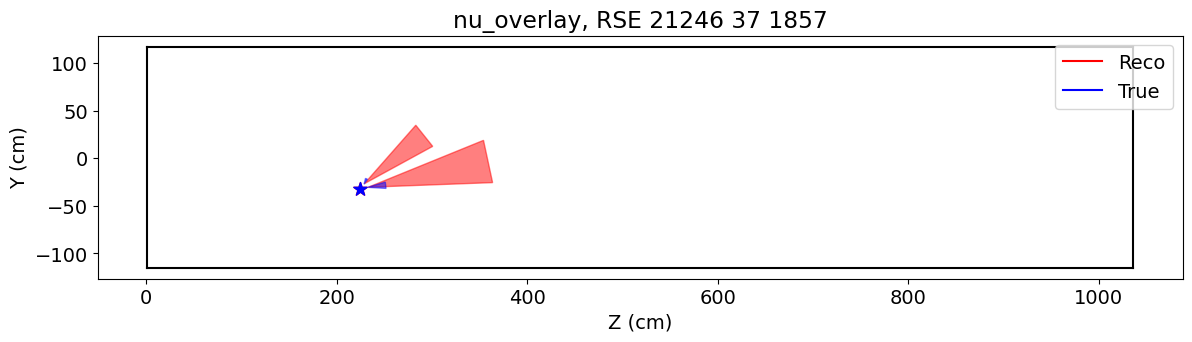

mother of mother: [111]
mother of mother: [111]


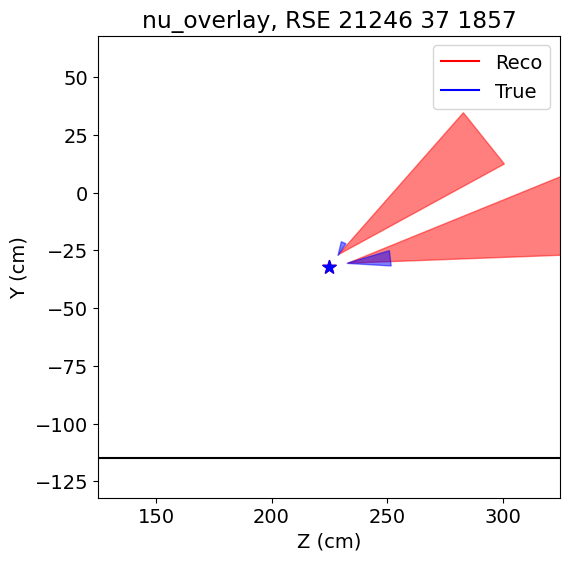

mother of mother: [111]
mother of mother: [111]


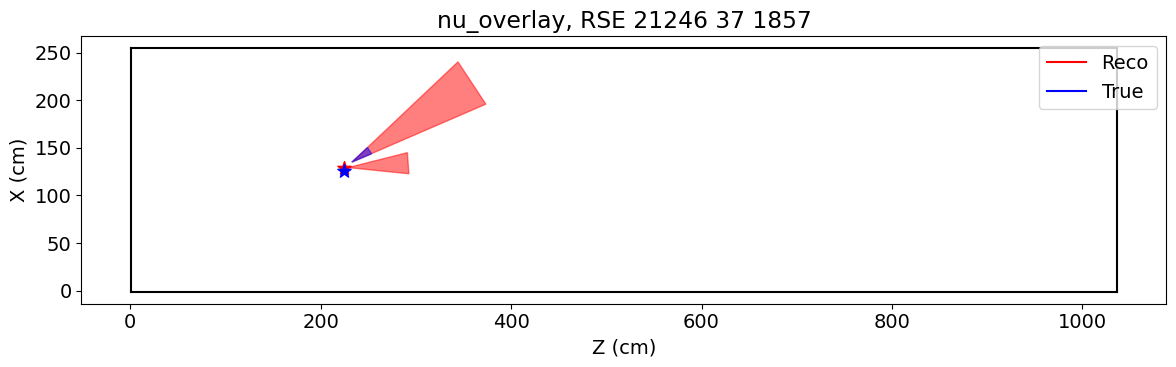

mother of mother: [111]
mother of mother: [111]


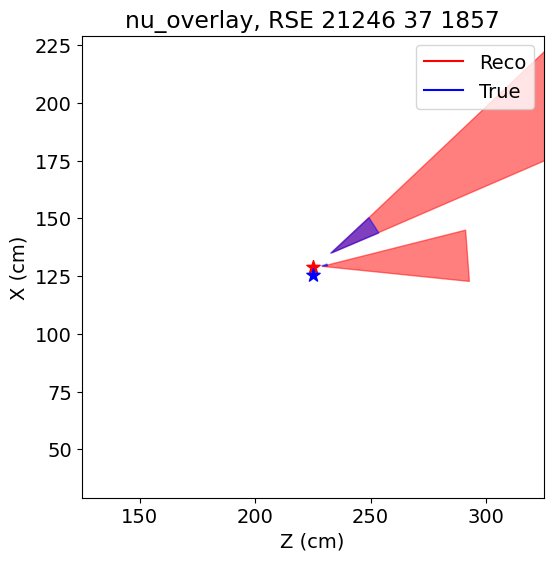

mother of mother: [111]
mother of mother: [111]


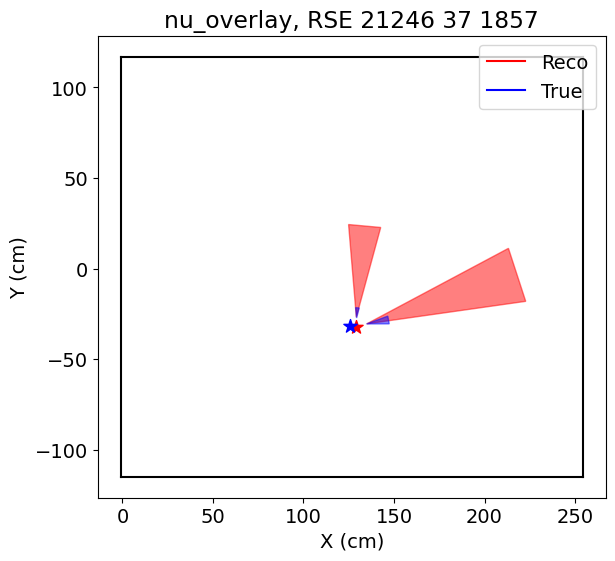

mother of mother: [111]
mother of mother: [111]


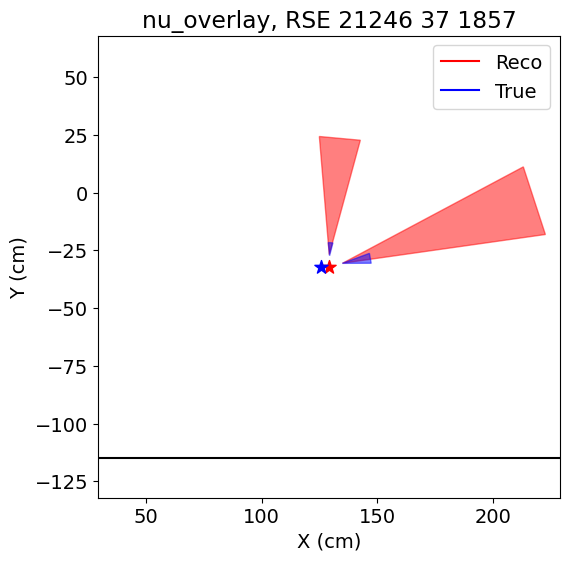

In [1203]:
# restarting only plotting photons from mother^2 = 111 

from particle import Particle

#print(nu_overlay_df["subrun"].to_numpy())

#print(nu_overlay_df["run"].to_numpy()[0])from particle import Particle

#print(nu_overlay_df["subrun"].to_numpy())

#print(nu_overlay_df["run"].to_numpy()[0])

def show_simplified_event_display(one_event_df, view="zy", index=0, zoomed=False):
    file = one_event_df["file"].to_numpy()[index]
    run = one_event_df["run"].to_numpy()[index]
    #print(run)
    subrun = one_event_df["subrun"].to_numpy()[index]
    event = one_event_df["event"].to_numpy()[index]

    reco_ids = one_event_df["reco_id"].to_numpy()[index]
    reco_pdgs = one_event_df["reco_pdg"].to_numpy()[index]
    reco_start_XYZTs = one_event_df["reco_startXYZT"].to_numpy()[index]
    reco_end_XYZTs = one_event_df["reco_endXYZT"].to_numpy()[index]

    truth_ids = one_event_df["truth_id"].to_numpy()[index]
    truth_pdgs = one_event_df["truth_pdg"].to_numpy()[index]
    truth_start_XYZTs = one_event_df["truth_startXYZT"].to_numpy()[index]
    truth_end_XYZTs = one_event_df["truth_endXYZT"].to_numpy()[index]

    tpc_min_x = -1.
    tpc_max_x = 254.3
    tpc_min_y = -115.
    tpc_max_y = 117.
    tpc_min_z = 0.6
    tpc_max_z = 1036.4

    plt.rcParams.update({'font.size': 14})

    plt.figure(figsize=(14, 6))
    if view == "zy":
        plt.plot([tpc_min_z, tpc_max_z], [tpc_min_y, tpc_min_y], c="k")
        plt.plot([tpc_min_z, tpc_max_z], [tpc_max_y, tpc_max_y], c="k")
        plt.plot([tpc_min_z, tpc_min_z], [tpc_min_y, tpc_max_y], c="k")
        plt.plot([tpc_max_z, tpc_max_z], [tpc_min_y, tpc_max_y], c="k")
    elif view =="zx":
        plt.plot([tpc_min_z, tpc_max_z], [tpc_min_x, tpc_min_x], c="k")
        plt.plot([tpc_min_z, tpc_max_z], [tpc_max_x, tpc_max_x], c="k")
        plt.plot([tpc_min_z, tpc_min_z], [tpc_min_x, tpc_max_x], c="k")
        plt.plot([tpc_max_z, tpc_max_z], [tpc_min_x, tpc_max_x], c="k")
    elif view == "xy":
        plt.plot([tpc_min_x, tpc_max_x], [tpc_min_y, tpc_min_y], c="k")
        plt.plot([tpc_min_x, tpc_max_x], [tpc_max_y, tpc_max_y], c="k")
        plt.plot([tpc_min_x, tpc_min_x], [tpc_min_y, tpc_max_y], c="k")
        plt.plot([tpc_max_x, tpc_max_x], [tpc_min_y, tpc_max_y], c="k")
    plt.plot([], [], c="r", label="Reco")
    plt.plot([], [], c="b", label="True")
    for j in range(len(reco_pdgs)):
        start_x, start_y, start_z, start_t = reco_start_XYZTs[j]
        end_x, end_y, end_z, end_t = reco_end_XYZTs[j]
        if view == "zy":
            start = np.array([start_z, start_y])
            end = np.array([end_z, end_y])
        elif view == "zx":
            start = np.array([start_z, start_x])
            end = np.array([end_z, end_x])
        elif view == "xy":
            start = np.array([start_x, start_y])
            end = np.array([end_x, end_y])
        pdg = reco_pdgs[j]
        mother_index = np.where(reco_ids == reco_mother[index][j])[0]
        if mother_index.size == 0:
            continue  # Skip if no mother found
        mother2_index = np.where(reco_ids == reco_mother[index][mother_index])[0]
        mother2_pdg = reco_pdg[index][mother2_index]
        if mother2_pdg == 111:
        #elif pdg == 11: # shower, plot cone
        #elif pdg == 22:
        #elif pdg == -11:
            print(f'mother of mother: {mother2_pdg}')
            direction = end - start
            length = np.linalg.norm(direction)
            unit_direction = direction / length
            perp = np.array([-unit_direction[1], unit_direction[0]])
            angle_rad = np.radians(20 / 2)
            side_length = length * np.tan(angle_rad)
            side1 = end - side_length * perp
            side2 = end + side_length * perp
            triangle = np.array([start, side1, end, side2])
            plt.fill(triangle[:, 0], triangle[:, 1], color="r", alpha=0.5)
        #else: # track, plot line
            #plt.plot([start[0], end[0]], [start[1], end[1]], c="r")

    for j in range(len(truth_pdgs)):
        start_x, start_y, start_z, start_t = truth_start_XYZTs[j]
        end_x, end_y, end_z, end_t = truth_end_XYZTs[j]
        start_x = np.clip(start_x, tpc_min_x, tpc_max_x)
        start_y = np.clip(start_y, tpc_min_y, tpc_max_y)
        start_z = np.clip(start_z, tpc_min_z, tpc_max_z)
        end_x = np.clip(end_x, tpc_min_x, tpc_max_x)
        end_y = np.clip(end_y, tpc_min_y, tpc_max_y)
        end_z = np.clip(end_z, tpc_min_z, tpc_max_z)
        if view == "zy":
            start = np.array([start_z, start_y])
            end = np.array([end_z, end_y])
        elif view == "zx":
            start = np.array([start_z, start_x])
            end = np.array([end_z, end_x])
        elif view == "xy":
            start = np.array([start_x, start_y])
            end = np.array([end_x, end_y])
        pdg = truth_pdgs[j]
        if pdg == 11: # shower, plot cone
        #elif pdg == 22:
        #elif pdg == -11:
            mother_index = np.where(truth_ids == truth_mother[index][j])[0]
            #print(mother_index)
            if mother_index.size == 0:
                continue  # Skip if no mother found
            mother2_index = np.where(truth_ids == truth_mother[index][mother_index])[0]
            if mother2_index.size == 0:
                continue
            if mother2_index.size > 0:
                mother2_pdg = truth_pdg[index][mother2_index]
            if np.any(mother2_pdg == 111):
                direction = end - start
                length = np.linalg.norm(direction)
                unit_direction = direction / length
                perp = np.array([-unit_direction[1], unit_direction[0]])
                angle_rad = np.radians(20 / 2)
                side_length = length * np.tan(angle_rad)
                side1 = end - side_length * perp
                side2 = end + side_length * perp
                triangle = np.array([start, side1, end, side2])
                #print(truth_mother[index][j])
                pdg_index = np.where(truth_ids == truth_mother[index][j])
                mother_of_mother = np.where(truth_ids == truth_mother[index][pdg_index])
                #print(pdg_index)
                #print(truth_pdg[index][pdg_index])
                #print(f'mother of mother: {truth_pdg[index][mother_of_mother]}')
                plt.fill(triangle[:, 0], triangle[:, 1], color="b", alpha=0.5)
        #else: # track, plot line
            #plt.plot([start[0], end[0]], [start[1], end[1]], c="b")

    if view == "zy":
        plt.scatter(one_event_df["reco_nuvtxZ"].to_numpy()[index], one_event_df["reco_nuvtxY"].to_numpy()[index], color="r", marker="*", s=100)
        #plt.scatter(160, 55, color="r", marker="*", s=200)
        plt.scatter(one_event_df["truth_vtxZ"].to_numpy()[index], one_event_df["truth_vtxY"].to_numpy()[index], color="b", marker="*", s=100)# shower vertex location
        #plt.scatter(one_event_df["reco_showervtxZ"].to_numpy()[index], one_event_df["reco_showervtxY"].to_numpy()[index], color="r", marker="P", s=100)
        #plt.scatter(one_event_df["truth_corr_showervtxZ"].to_numpy()[index], one_event_df["truth_corr_showervtxY"].to_numpy()[index], color="b", marker="P", s=100)
  
    elif view == "zx":
        plt.scatter(one_event_df["reco_nuvtxZ"].to_numpy()[index], one_event_df["reco_nuvtxX"].to_numpy()[index], color="r", marker="*", s=100)
        plt.scatter(one_event_df["truth_vtxZ"].to_numpy()[index], one_event_df["truth_vtxX"].to_numpy()[index], color="b", marker="*", s=100)
    elif view == "xy":
        plt.scatter(one_event_df["reco_nuvtxX"].to_numpy()[index], one_event_df["reco_nuvtxY"].to_numpy()[index], color="r", marker="*", s=100)
        plt.scatter(one_event_df["truth_vtxX"].to_numpy()[index], one_event_df["truth_vtxY"].to_numpy()[index], color="b", marker="*", s=100)
    plt.title(f"{file}, RSE {run} {subrun} {event}")
    plt.legend(loc="upper right")
    if view == "zy":
        plt.xlabel("Z (cm)")
        plt.ylabel("Y (cm)")
    elif view == "zx":
        plt.xlabel("Z (cm)")
        plt.ylabel("X (cm)")
    elif view == "xy":
        plt.xlabel("X (cm)")
        plt.ylabel("Y (cm)")
    if zoomed and view == "zy":
        plt.xlim(one_event_df["reco_nuvtxZ"].to_numpy()[index]-100, one_event_df["reco_nuvtxZ"].to_numpy()[index]+100)
        plt.ylim(one_event_df["reco_nuvtxY"].to_numpy()[index]-100, one_event_df["reco_nuvtxY"].to_numpy()[index]+100)
    elif zoomed and view == "zx":
        plt.xlim(one_event_df["reco_nuvtxZ"].to_numpy()[index]-100, one_event_df["reco_nuvtxZ"].to_numpy()[index]+100)
        plt.ylim(one_event_df["reco_nuvtxX"].to_numpy()[index]-100, one_event_df["reco_nuvtxX"].to_numpy()[index]+100)
    elif zoomed and view == "xy":
        plt.xlim(one_event_df["reco_nuvtxX"].to_numpy()[index]-100, one_event_df["reco_nuvtxX"].to_numpy()[index]+100)
        plt.ylim(one_event_df["reco_nuvtxY"].to_numpy()[index]-100, one_event_df["reco_nuvtxY"].to_numpy()[index]+100)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()

def go(i):
    show_simplified_event_display(nu_overlay_df, view="zy", index=i, zoomed=False)
    show_simplified_event_display(nu_overlay_df, view="zy", index=i, zoomed=True)
    show_simplified_event_display(nu_overlay_df, view="zx", index=i, zoomed=False)
    show_simplified_event_display(nu_overlay_df, view="zx", index=i, zoomed=True)

    show_simplified_event_display(nu_overlay_df, view="xy", index=i, zoomed=False)
    show_simplified_event_display(nu_overlay_df, view="xy", index=i, zoomed=True)

go(209)

## in progress

[5]
[5]
[0]


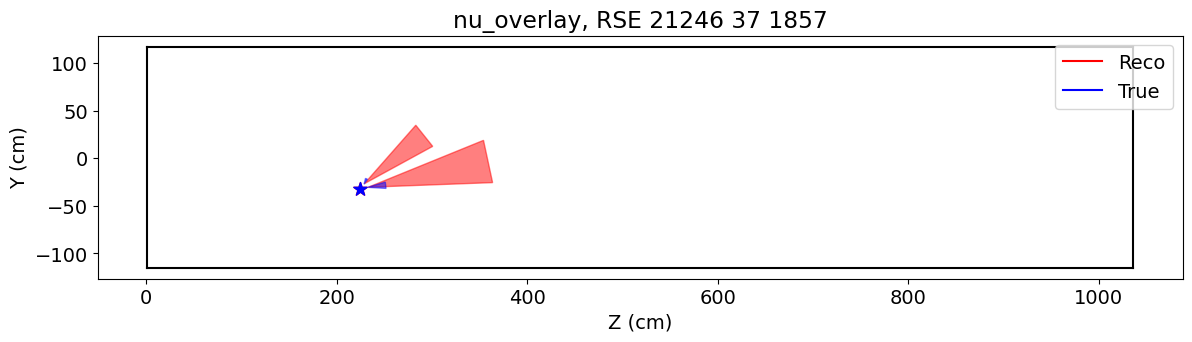

[5]
[5]
[0]


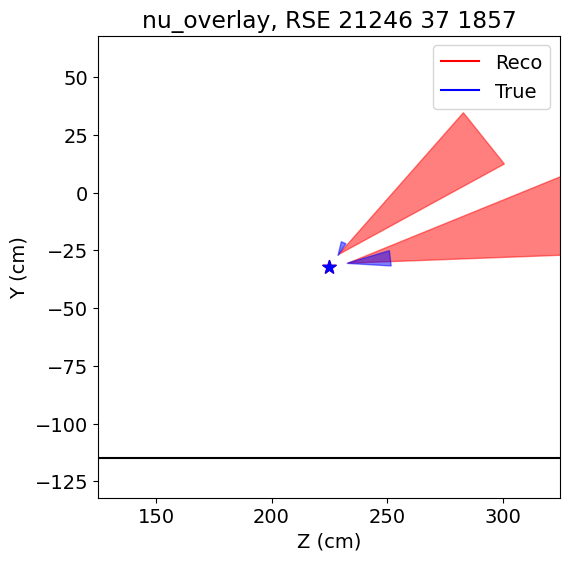

[5]
[5]
[0]


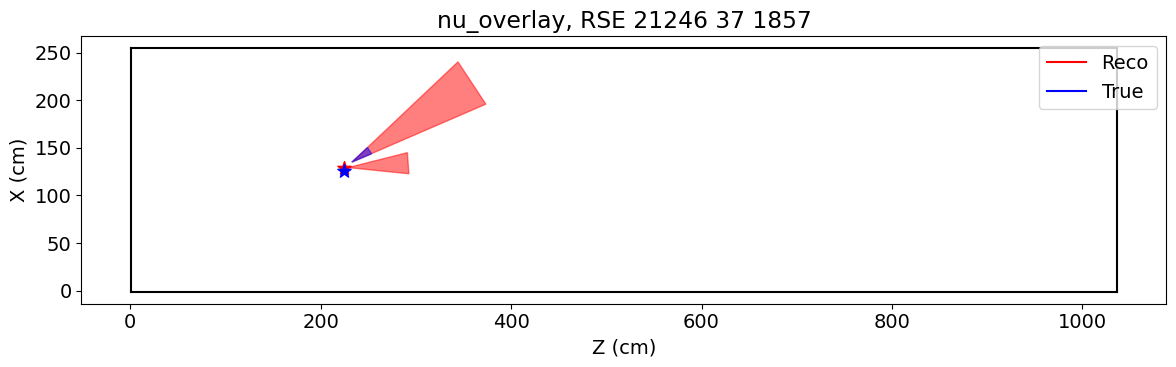

[5]
[5]
[0]


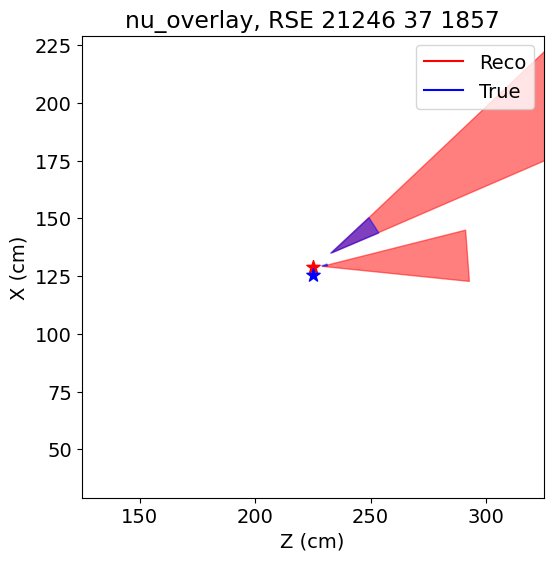

[5]
[5]
[0]


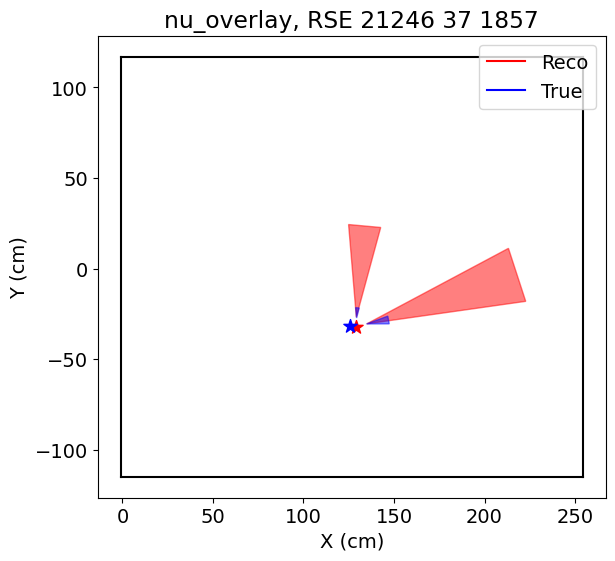

[5]
[5]
[0]


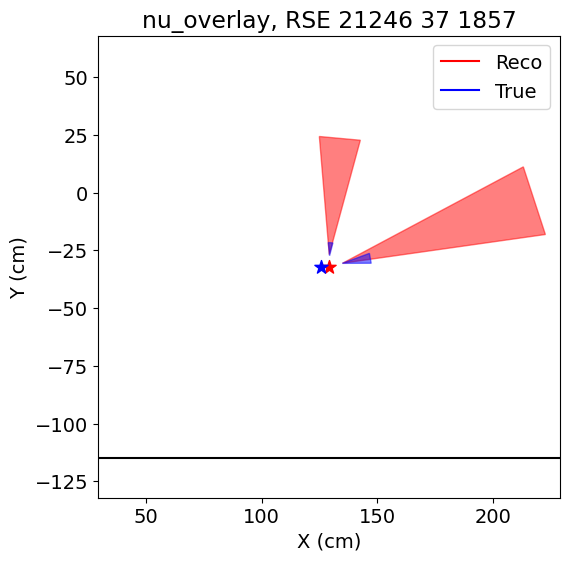

In [1204]:
# friendly event display

from particle import Particle

#print(nu_overlay_df["subrun"].to_numpy())

#print(nu_overlay_df["run"].to_numpy()[0])from particle import Particle

#print(nu_overlay_df["subrun"].to_numpy())

#print(nu_overlay_df["run"].to_numpy()[0])

def show_simplified_event_display(one_event_df, view="zy", index=0, zoomed=False):
    file = one_event_df["file"].to_numpy()[index]
    run = one_event_df["run"].to_numpy()[index]
    #print(run)
    subrun = one_event_df["subrun"].to_numpy()[index]
    event = one_event_df["event"].to_numpy()[index]

    reco_ids = one_event_df["reco_id"].to_numpy()[index]
    reco_pdgs = one_event_df["reco_pdg"].to_numpy()[index]
    reco_start_XYZTs = one_event_df["reco_startXYZT"].to_numpy()[index]
    reco_end_XYZTs = one_event_df["reco_endXYZT"].to_numpy()[index]

    truth_ids = one_event_df["truth_id"].to_numpy()[index]
    truth_pdgs = one_event_df["truth_pdg"].to_numpy()[index]
    truth_start_XYZTs = one_event_df["truth_startXYZT"].to_numpy()[index]
    truth_end_XYZTs = one_event_df["truth_endXYZT"].to_numpy()[index]

    tpc_min_x = -1.
    tpc_max_x = 254.3
    tpc_min_y = -115.
    tpc_max_y = 117.
    tpc_min_z = 0.6
    tpc_max_z = 1036.4

    plt.rcParams.update({'font.size': 14})

    plt.figure(figsize=(14, 6))
    if view == "zy":
        plt.plot([tpc_min_z, tpc_max_z], [tpc_min_y, tpc_min_y], c="k")
        plt.plot([tpc_min_z, tpc_max_z], [tpc_max_y, tpc_max_y], c="k")
        plt.plot([tpc_min_z, tpc_min_z], [tpc_min_y, tpc_max_y], c="k")
        plt.plot([tpc_max_z, tpc_max_z], [tpc_min_y, tpc_max_y], c="k")
    elif view =="zx":
        plt.plot([tpc_min_z, tpc_max_z], [tpc_min_x, tpc_min_x], c="k")
        plt.plot([tpc_min_z, tpc_max_z], [tpc_max_x, tpc_max_x], c="k")
        plt.plot([tpc_min_z, tpc_min_z], [tpc_min_x, tpc_max_x], c="k")
        plt.plot([tpc_max_z, tpc_max_z], [tpc_min_x, tpc_max_x], c="k")
    elif view == "xy":
        plt.plot([tpc_min_x, tpc_max_x], [tpc_min_y, tpc_min_y], c="k")
        plt.plot([tpc_min_x, tpc_max_x], [tpc_max_y, tpc_max_y], c="k")
        plt.plot([tpc_min_x, tpc_min_x], [tpc_min_y, tpc_max_y], c="k")
        plt.plot([tpc_max_x, tpc_max_x], [tpc_min_y, tpc_max_y], c="k")
    plt.plot([], [], c="r", label="Reco")
    plt.plot([], [], c="b", label="True")
    for j in range(len(reco_pdgs)):
        start_x, start_y, start_z, start_t = reco_start_XYZTs[j]
        end_x, end_y, end_z, end_t = reco_end_XYZTs[j]
        if view == "zy":
            start = np.array([start_z, start_y])
            end = np.array([end_z, end_y])
        elif view == "zx":
            start = np.array([start_z, start_x])
            end = np.array([end_z, end_x])
        elif view == "xy":
            start = np.array([start_x, start_y])
            end = np.array([end_x, end_y])
        pdg = reco_pdgs[j]
        if pdg == 11: # shower, plot cone
        #elif pdg == 22:
        #elif pdg == -11:
            mother_index = np.where(reco_ids == reco_mother[index][j])[0]
            if mother_index.size == 0:
                continue  # Skip if no mother found
            mother2_index = np.where(reco_ids == reco_mother[index][mother_index])[0]
            if mother2_index.size == 0:
                continue
            mother2_pdg = reco_pdg[index][mother2_index]
            print(mother2_index)
            if np.any(mother2_pdg == 111):
                direction = end - start
                length = np.linalg.norm(direction)
                unit_direction = direction / length
                perp = np.array([-unit_direction[1], unit_direction[0]])
                angle_rad = np.radians(20 / 2)
                side_length = length * np.tan(angle_rad)
                side1 = end - side_length * perp
                side2 = end + side_length * perp
                triangle = np.array([start, side1, end, side2])
                plt.fill(triangle[:, 0], triangle[:, 1], color="r", alpha=0.5)
        #else: # track, plot line
            #plt.plot([start[0], end[0]], [start[1], end[1]], c="r")

    for j in range(len(truth_pdgs)):
        start_x, start_y, start_z, start_t = truth_start_XYZTs[j]
        end_x, end_y, end_z, end_t = truth_end_XYZTs[j]
        start_x = np.clip(start_x, tpc_min_x, tpc_max_x)
        start_y = np.clip(start_y, tpc_min_y, tpc_max_y)
        start_z = np.clip(start_z, tpc_min_z, tpc_max_z)
        end_x = np.clip(end_x, tpc_min_x, tpc_max_x)
        end_y = np.clip(end_y, tpc_min_y, tpc_max_y)
        end_z = np.clip(end_z, tpc_min_z, tpc_max_z)
        if view == "zy":
            start = np.array([start_z, start_y])
            end = np.array([end_z, end_y])
        elif view == "zx":
            start = np.array([start_z, start_x])
            end = np.array([end_z, end_x])
        elif view == "xy":
            start = np.array([start_x, start_y])
            end = np.array([end_x, end_y])
        pdg = truth_pdgs[j]
        if pdg == 11: # shower, plot cone
        #elif pdg == 22:
        #elif pdg == -11:
            mother_index = np.where(truth_ids == truth_mother[index][j])[0]
            #print(mother_index)
            if mother_index.size == 0:
                continue  # Skip if no mother found
            mother2_index = np.where(truth_ids == truth_mother[index][mother_index])[0]
            if mother2_index.size == 0:
                continue
            if mother2_index.size > 0:
                mother2_pdg = truth_pdg[index][mother2_index]
            if np.any(mother2_pdg == 111):
                direction = end - start
                length = np.linalg.norm(direction)
                unit_direction = direction / length
                perp = np.array([-unit_direction[1], unit_direction[0]])
                angle_rad = np.radians(20 / 2)
                side_length = length * np.tan(angle_rad)
                side1 = end - side_length * perp
                side2 = end + side_length * perp
                triangle = np.array([start, side1, end, side2])
                #print(truth_mother[index][j])
                pdg_index = np.where(truth_ids == truth_mother[index][j])
                mother_of_mother = np.where(truth_ids == truth_mother[index][pdg_index])
                #print(pdg_index)
                #print(truth_pdg[index][pdg_index])
                #print(f'mother of mother: {truth_pdg[index][mother_of_mother]}')
                plt.fill(triangle[:, 0], triangle[:, 1], color="b", alpha=0.5)
        #else: # track, plot line
            #plt.plot([start[0], end[0]], [start[1], end[1]], c="b")

    if view == "zy":
        plt.scatter(one_event_df["reco_nuvtxZ"].to_numpy()[index], one_event_df["reco_nuvtxY"].to_numpy()[index], color="r", marker="*", s=100)
        #plt.scatter(160, 55, color="r", marker="*", s=200)
        plt.scatter(one_event_df["truth_vtxZ"].to_numpy()[index], one_event_df["truth_vtxY"].to_numpy()[index], color="b", marker="*", s=100)# shower vertex location
        #plt.scatter(one_event_df["reco_showervtxZ"].to_numpy()[index], one_event_df["reco_showervtxY"].to_numpy()[index], color="r", marker="P", s=100)
        #plt.scatter(one_event_df["truth_corr_showervtxZ"].to_numpy()[index], one_event_df["truth_corr_showervtxY"].to_numpy()[index], color="b", marker="P", s=100)
  
    elif view == "zx":
        plt.scatter(one_event_df["reco_nuvtxZ"].to_numpy()[index], one_event_df["reco_nuvtxX"].to_numpy()[index], color="r", marker="*", s=100)
        plt.scatter(one_event_df["truth_vtxZ"].to_numpy()[index], one_event_df["truth_vtxX"].to_numpy()[index], color="b", marker="*", s=100)
    elif view == "xy":
        plt.scatter(one_event_df["reco_nuvtxX"].to_numpy()[index], one_event_df["reco_nuvtxY"].to_numpy()[index], color="r", marker="*", s=100)
        plt.scatter(one_event_df["truth_vtxX"].to_numpy()[index], one_event_df["truth_vtxY"].to_numpy()[index], color="b", marker="*", s=100)
    plt.title(f"{file}, RSE {run} {subrun} {event}")
    plt.legend(loc="upper right")
    if view == "zy":
        plt.xlabel("Z (cm)")
        plt.ylabel("Y (cm)")
    elif view == "zx":
        plt.xlabel("Z (cm)")
        plt.ylabel("X (cm)")
    elif view == "xy":
        plt.xlabel("X (cm)")
        plt.ylabel("Y (cm)")
    if zoomed and view == "zy":
        plt.xlim(one_event_df["reco_nuvtxZ"].to_numpy()[index]-100, one_event_df["reco_nuvtxZ"].to_numpy()[index]+100)
        plt.ylim(one_event_df["reco_nuvtxY"].to_numpy()[index]-100, one_event_df["reco_nuvtxY"].to_numpy()[index]+100)
    elif zoomed and view == "zx":
        plt.xlim(one_event_df["reco_nuvtxZ"].to_numpy()[index]-100, one_event_df["reco_nuvtxZ"].to_numpy()[index]+100)
        plt.ylim(one_event_df["reco_nuvtxX"].to_numpy()[index]-100, one_event_df["reco_nuvtxX"].to_numpy()[index]+100)
    elif zoomed and view == "xy":
        plt.xlim(one_event_df["reco_nuvtxX"].to_numpy()[index]-100, one_event_df["reco_nuvtxX"].to_numpy()[index]+100)
        plt.ylim(one_event_df["reco_nuvtxY"].to_numpy()[index]-100, one_event_df["reco_nuvtxY"].to_numpy()[index]+100)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()

def go(i):
    show_simplified_event_display(nu_overlay_df, view="zy", index=i, zoomed=False)
    show_simplified_event_display(nu_overlay_df, view="zy", index=i, zoomed=True)
    show_simplified_event_display(nu_overlay_df, view="zx", index=i, zoomed=False)
    show_simplified_event_display(nu_overlay_df, view="zx", index=i, zoomed=True)

    show_simplified_event_display(nu_overlay_df, view="xy", index=i, zoomed=False)
    show_simplified_event_display(nu_overlay_df, view="xy", index=i, zoomed=True)

go(209)

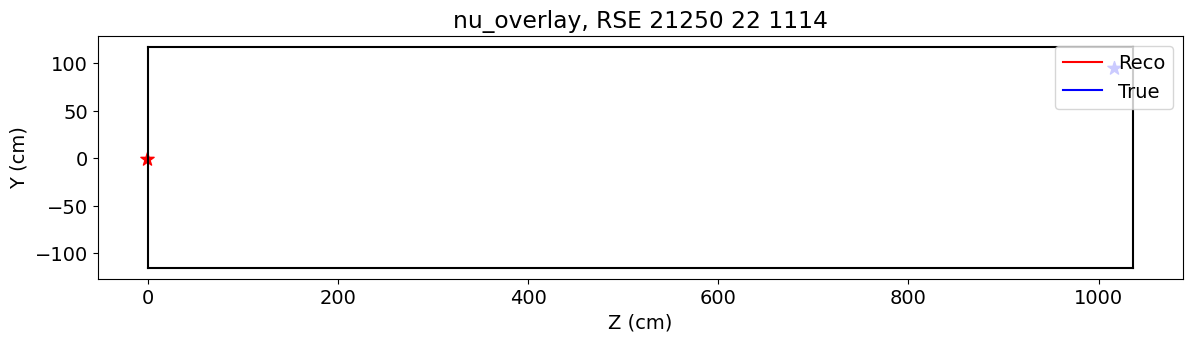

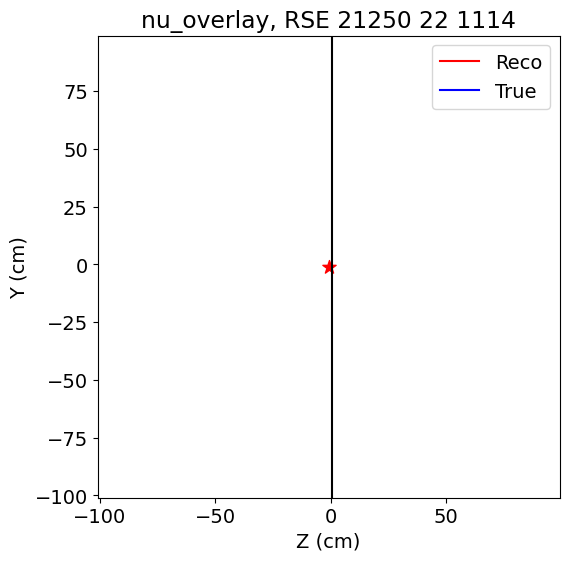

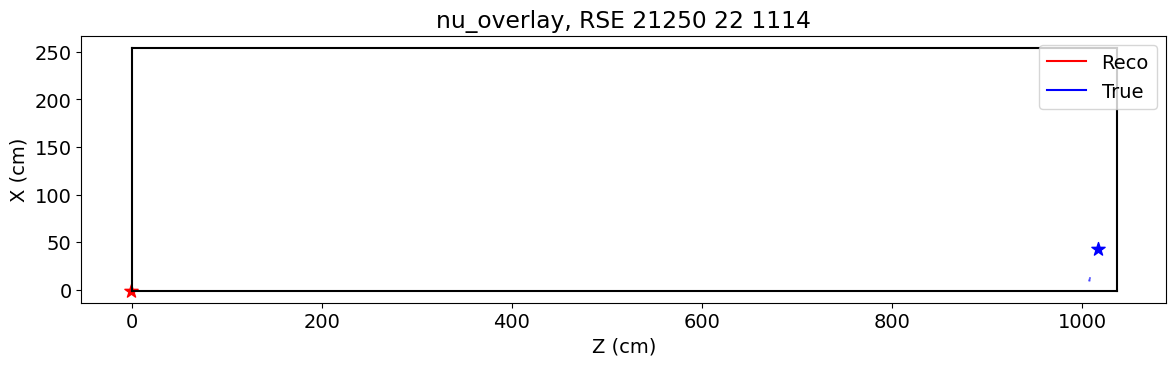

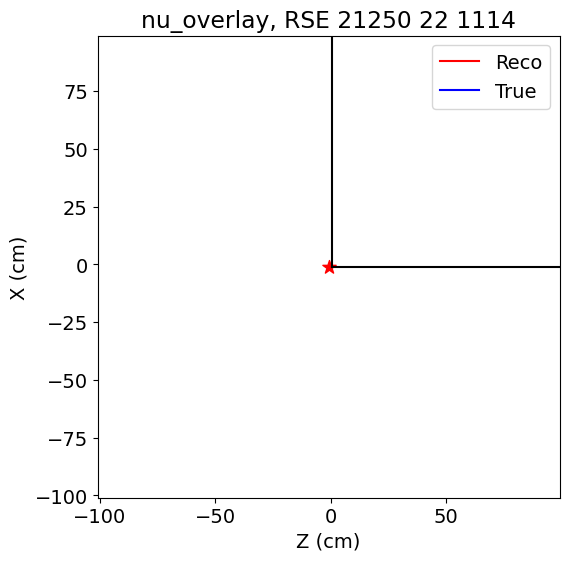

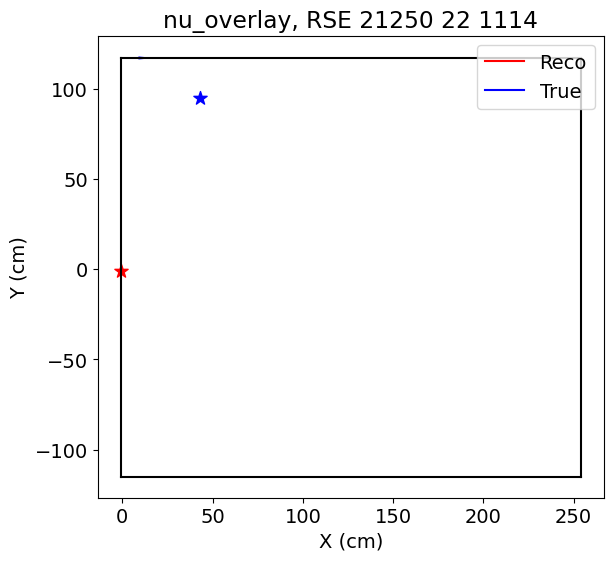

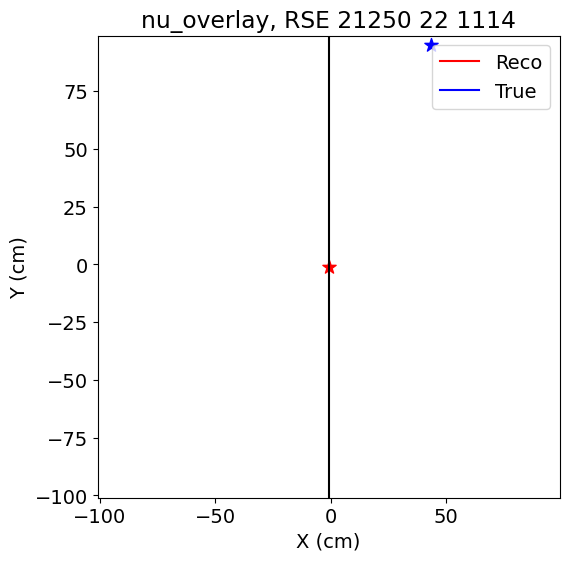

In [1205]:
# go function to see event displays

# restarting only plotting photons from mother^2 = 111 

from particle import Particle

#print(nu_overlay_df["subrun"].to_numpy())

#print(nu_overlay_df["run"].to_numpy()[0])from particle import Particle

#print(nu_overlay_df["subrun"].to_numpy())

#print(nu_overlay_df["run"].to_numpy()[0])

def show_simplified_event_display(one_event_df, view="zy", index=0, zoomed=False):
    file = one_event_df["file"].to_numpy()[index]
    run = one_event_df["run"].to_numpy()[index]
    #print(run)
    subrun = one_event_df["subrun"].to_numpy()[index]
    event = one_event_df["event"].to_numpy()[index]

    reco_ids = one_event_df["reco_id"].to_numpy()[index]
    reco_pdgs = one_event_df["reco_pdg"].to_numpy()[index]
    reco_start_XYZTs = one_event_df["reco_startXYZT"].to_numpy()[index]
    reco_end_XYZTs = one_event_df["reco_endXYZT"].to_numpy()[index]

    truth_ids = one_event_df["truth_id"].to_numpy()[index]
    truth_pdgs = one_event_df["truth_pdg"].to_numpy()[index]
    truth_start_XYZTs = one_event_df["truth_startXYZT"].to_numpy()[index]
    truth_end_XYZTs = one_event_df["truth_endXYZT"].to_numpy()[index]
    
    #print(f'zero shower event: truth mother: {truth_mother[index]}, truth id: {truth_ids}, truth pdg: {truth_pdgs}')

    tpc_min_x = -1.
    tpc_max_x = 254.3
    tpc_min_y = -115.
    tpc_max_y = 117.
    tpc_min_z = 0.6
    tpc_max_z = 1036.4

    plt.rcParams.update({'font.size': 14})

    plt.figure(figsize=(14, 6))
    if view == "zy":
        plt.plot([tpc_min_z, tpc_max_z], [tpc_min_y, tpc_min_y], c="k")
        plt.plot([tpc_min_z, tpc_max_z], [tpc_max_y, tpc_max_y], c="k")
        plt.plot([tpc_min_z, tpc_min_z], [tpc_min_y, tpc_max_y], c="k")
        plt.plot([tpc_max_z, tpc_max_z], [tpc_min_y, tpc_max_y], c="k")
    elif view =="zx":
        plt.plot([tpc_min_z, tpc_max_z], [tpc_min_x, tpc_min_x], c="k")
        plt.plot([tpc_min_z, tpc_max_z], [tpc_max_x, tpc_max_x], c="k")
        plt.plot([tpc_min_z, tpc_min_z], [tpc_min_x, tpc_max_x], c="k")
        plt.plot([tpc_max_z, tpc_max_z], [tpc_min_x, tpc_max_x], c="k")
    elif view == "xy":
        plt.plot([tpc_min_x, tpc_max_x], [tpc_min_y, tpc_min_y], c="k")
        plt.plot([tpc_min_x, tpc_max_x], [tpc_max_y, tpc_max_y], c="k")
        plt.plot([tpc_min_x, tpc_min_x], [tpc_min_y, tpc_max_y], c="k")
        plt.plot([tpc_max_x, tpc_max_x], [tpc_min_y, tpc_max_y], c="k")
    plt.plot([], [], c="r", label="Reco")
    plt.plot([], [], c="b", label="True")
    for j in range(len(reco_pdgs)):
        start_x, start_y, start_z, start_t = reco_start_XYZTs[j]
        end_x, end_y, end_z, end_t = reco_end_XYZTs[j]
        if view == "zy":
            start = np.array([start_z, start_y])
            end = np.array([end_z, end_y])
        elif view == "zx":
            start = np.array([start_z, start_x])
            end = np.array([end_z, end_x])
        elif view == "xy":
            start = np.array([start_x, start_y])
            end = np.array([end_x, end_y])
        pdg = reco_pdgs[j]
        if pdg == 11: # shower, plot cone
        #elif pdg == 22:
        #elif pdg == -11:
            mother_index = np.where(reco_ids == reco_mother[index][j])[0]
            if mother_index.size == 0:
                continue  # Skip if no mother found
            mother2_index = np.where(reco_ids == reco_mother[index][mother_index])[0]
            if mother2_index.size == 0:
                continue
            mother2_pdg = reco_pdg[index][mother2_index]
            print(mother2_pdg)
            if np.any(mother2_pdg == 111):
                direction = end - start
                length = np.linalg.norm(direction)
                unit_direction = direction / length
                perp = np.array([-unit_direction[1], unit_direction[0]])
                angle_rad = np.radians(20 / 2)
                side_length = length * np.tan(angle_rad)
                side1 = end - side_length * perp
                side2 = end + side_length * perp
                triangle = np.array([start, side1, end, side2])
                plt.fill(triangle[:, 0], triangle[:, 1], color="r", alpha=0.5)
        #else: # track, plot line
            #plt.plot([start[0], end[0]], [start[1], end[1]], c="r")

    for j in range(len(truth_pdgs)):
        start_x, start_y, start_z, start_t = truth_start_XYZTs[j]
        end_x, end_y, end_z, end_t = truth_end_XYZTs[j]
        start_x = np.clip(start_x, tpc_min_x, tpc_max_x)
        start_y = np.clip(start_y, tpc_min_y, tpc_max_y)
        start_z = np.clip(start_z, tpc_min_z, tpc_max_z)
        end_x = np.clip(end_x, tpc_min_x, tpc_max_x)
        end_y = np.clip(end_y, tpc_min_y, tpc_max_y)
        end_z = np.clip(end_z, tpc_min_z, tpc_max_z)
        if view == "zy":
            start = np.array([start_z, start_y])
            end = np.array([end_z, end_y])
        elif view == "zx":
            start = np.array([start_z, start_x])
            end = np.array([end_z, end_x])
        elif view == "xy":
            start = np.array([start_x, start_y])
            end = np.array([end_x, end_y])
        pdg = truth_pdgs[j]
        if pdg == 11: # shower, plot cone
        #elif pdg == 22:
        #elif pdg == -11:
            mother_index = np.where(truth_ids == truth_mother[index][j])[0]
            #print(mother_index)
            if mother_index.size == 0:
                continue  # Skip if no mother found
            mother2_index = np.where(truth_ids == truth_mother[index][mother_index])[0]
            if mother2_index.size == 0:
                continue
            if mother2_index.size > 0:
                mother2_pdg = truth_pdg[index][mother2_index]
            if np.any(mother2_pdg == 111):
                direction = end - start
                length = np.linalg.norm(direction)
                unit_direction = direction / length
                perp = np.array([-unit_direction[1], unit_direction[0]])
                angle_rad = np.radians(20 / 2)
                side_length = length * np.tan(angle_rad)
                side1 = end - side_length * perp
                side2 = end + side_length * perp
                triangle = np.array([start, side1, end, side2])
                #print(truth_mother[index][j])
                pdg_index = np.where(truth_ids == truth_mother[index][j])
                mother_of_mother = np.where(truth_ids == truth_mother[index][pdg_index])
                #print(pdg_index)
                #print(truth_pdg[index][pdg_index])
                #print(f'mother of mother: {truth_pdg[index][mother_of_mother]}')
                plt.fill(triangle[:, 0], triangle[:, 1], color="b", alpha=0.5)
        #else: # track, plot line
            #plt.plot([start[0], end[0]], [start[1], end[1]], c="b")

    if view == "zy":
        plt.scatter(one_event_df["reco_nuvtxZ"].to_numpy()[index], one_event_df["reco_nuvtxY"].to_numpy()[index], color="r", marker="*", s=100)
        #plt.scatter(160, 55, color="r", marker="*", s=200)
        plt.scatter(one_event_df["truth_vtxZ"].to_numpy()[index], one_event_df["truth_vtxY"].to_numpy()[index], color="b", marker="*", s=100)# shower vertex location
        #plt.scatter(one_event_df["reco_showervtxZ"].to_numpy()[index], one_event_df["reco_showervtxY"].to_numpy()[index], color="r", marker="P", s=100)
        #plt.scatter(one_event_df["truth_corr_showervtxZ"].to_numpy()[index], one_event_df["truth_corr_showervtxY"].to_numpy()[index], color="b", marker="P", s=100)
  
    elif view == "zx":
        plt.scatter(one_event_df["reco_nuvtxZ"].to_numpy()[index], one_event_df["reco_nuvtxX"].to_numpy()[index], color="r", marker="*", s=100)
        plt.scatter(one_event_df["truth_vtxZ"].to_numpy()[index], one_event_df["truth_vtxX"].to_numpy()[index], color="b", marker="*", s=100)
    elif view == "xy":
        plt.scatter(one_event_df["reco_nuvtxX"].to_numpy()[index], one_event_df["reco_nuvtxY"].to_numpy()[index], color="r", marker="*", s=100)
        plt.scatter(one_event_df["truth_vtxX"].to_numpy()[index], one_event_df["truth_vtxY"].to_numpy()[index], color="b", marker="*", s=100)
    plt.title(f"{file}, RSE {run} {subrun} {event}")
    plt.legend(loc="upper right")
    if view == "zy":
        plt.xlabel("Z (cm)")
        plt.ylabel("Y (cm)")
    elif view == "zx":
        plt.xlabel("Z (cm)")
        plt.ylabel("X (cm)")
    elif view == "xy":
        plt.xlabel("X (cm)")
        plt.ylabel("Y (cm)")
    if zoomed and view == "zy":
        plt.xlim(one_event_df["reco_nuvtxZ"].to_numpy()[index]-100, one_event_df["reco_nuvtxZ"].to_numpy()[index]+100)
        plt.ylim(one_event_df["reco_nuvtxY"].to_numpy()[index]-100, one_event_df["reco_nuvtxY"].to_numpy()[index]+100)
    elif zoomed and view == "zx":
        plt.xlim(one_event_df["reco_nuvtxZ"].to_numpy()[index]-100, one_event_df["reco_nuvtxZ"].to_numpy()[index]+100)
        plt.ylim(one_event_df["reco_nuvtxX"].to_numpy()[index]-100, one_event_df["reco_nuvtxX"].to_numpy()[index]+100)
    elif zoomed and view == "xy":
        plt.xlim(one_event_df["reco_nuvtxX"].to_numpy()[index]-100, one_event_df["reco_nuvtxX"].to_numpy()[index]+100)
        plt.ylim(one_event_df["reco_nuvtxY"].to_numpy()[index]-100, one_event_df["reco_nuvtxY"].to_numpy()[index]+100)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()

def go(i):
    show_simplified_event_display(nu_overlay_df, view="zy", index=i, zoomed=False)
    show_simplified_event_display(nu_overlay_df, view="zy", index=i, zoomed=True)
    show_simplified_event_display(nu_overlay_df, view="zx", index=i, zoomed=False)
    show_simplified_event_display(nu_overlay_df, view="zx", index=i, zoomed=True)

    show_simplified_event_display(nu_overlay_df, view="xy", index=i, zoomed=False)
    show_simplified_event_display(nu_overlay_df, view="xy", index=i, zoomed=True)

# go(107) event with two pi0s

#go(7)
#go(173) # no showers

#go(1747) # one true shower, near edge
#go(1027) 

#go(703) # one true shower, far from edge

go(16)

(2, 2)
4 photons at event 1027
4 photons at event 2110
4 photons at event 3500
4 photons at event 4252
4 photons at event 5148
4 photons at event 6270
4 photons at event 6742
4 photons at event 8840
4 photons at event 9112
4 photons at event 11853
4 photons at event 16308
4 photons at event 19718
4 photons at event 19977
4 photons at event 20828
4 photons at event 22386
4 photons at event 23640
4 photons at event 25175
4 photons at event 25760
4 photons at event 27269
4 photons at event 28263
4 photons at event 29859
4 photons at event 35480
4 photons at event 35548
4 photons at event 40597
4 photons at event 40601


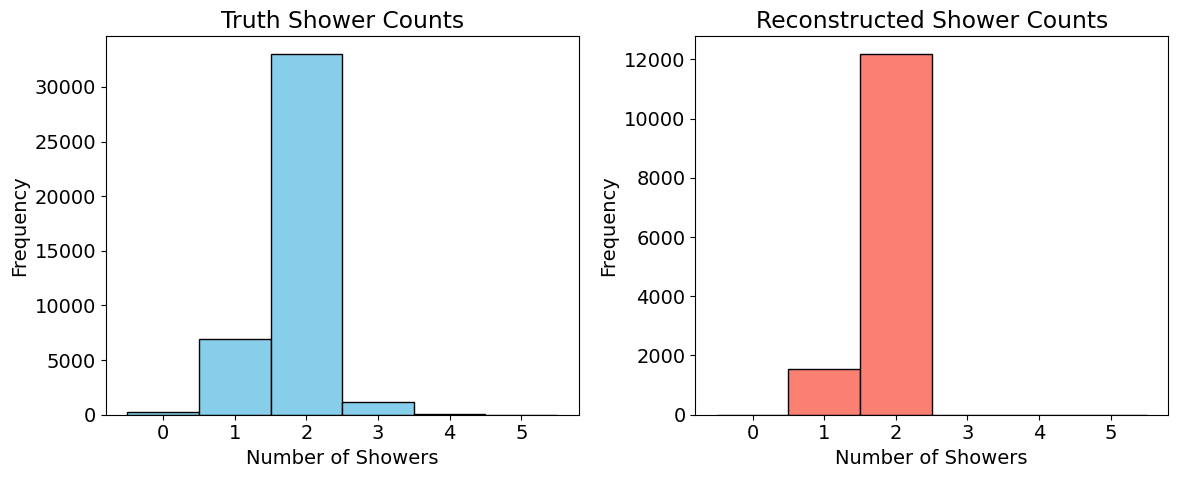

four photons for event 1027
four photons for event 2110
four photons for event 3500
four photons for event 4252
four photons for event 5148
four photons for event 6270
four photons for event 6742
four photons for event 8840
four photons for event 9112
four photons for event 11853
four photons for event 16308
four photons for event 19718
four photons for event 19977
four photons for event 20828
four photons for event 22386
four photons for event 23640
four photons for event 25175
four photons for event 25760
four photons for event 27269
four photons for event 28263
four photons for event 29859
four photons for event 35480
four photons for event 35548
four photons for event 40597
four photons for event 40601
zero: 225, one: 6911, two: 32982, three: 1163, four: 25
zero: 28571, one: 0, two: 12169, three: 0, four: 0


In [1206]:
# original identify_num_showers function definition

def identify_num_showers(one_event_df, index):

    kine_reco_Enus = one_event_df["kine_reco_Enu"].to_numpy()

    reco_ids = one_event_df["reco_id"].to_numpy()[index]
    reco_pdgs = one_event_df["reco_pdg"].to_numpy()[index]

    truth_ids = one_event_df["truth_id"].to_numpy()[index]
    truth_pdgs = one_event_df["truth_pdg"].to_numpy()[index]

    truth_shower_count = 0
    reco_shower_count = 0

    reco_energy = one_event_df["reco_startMomentum"].to_numpy()[index]

    pi0_in_event = 0

    for j in range(len(reco_pdgs)):

        pdg = reco_pdgs[j]
        if kine_reco_Enus[index] < 0:
            #print(f'discarded event with energy {kine_reco_Enus[index]}')
            reco_shower_count = -999
            break
        if pdg == 111:
            pi0_in_event += 1
        if pi0_in_event > 1:
            reco_shower_count = -999
            break
        if pdg == 11: # shower
            mother_index = np.where(reco_ids == reco_mother[index][j])[0]
            if mother_index.size == 0:
                continue
            mother2_index = np.where(reco_ids == reco_mother[index][mother_index])[0]
            if mother2_index.size == 0:
                continue
            mother2_pdg = reco_pdg[index][mother2_index]
            if np.any(mother2_pdg == 111) and reco_energy[j][3] > .02:
                reco_shower_count += 1
    if pi0_in_event == 0:
        reco_shower_count = -999

    pi0_in_event = 0
    
    for j in range(len(truth_pdgs)):
        if truth_pdgs[j] == 111:
            pi0_in_event += 1
        if pi0_in_event > 1:
            #print(f'there were {pi0_in_event} pi0s in event')
            truth_shower_count = -1
            break
        #print(f'{pi0_in_event} pi0s in event')
        pdg = truth_pdgs[j]
        if pdg == 11: # shower
            mother_index = np.where(truth_ids == truth_mother[index][j])[0]
            if mother_index.size == 0:
                continue
            mother2_index = np.where(truth_ids == truth_mother[index][mother_index])[0]
            if mother2_index.size == 0:
                continue
            mother2_pdg = truth_pdg[index][mother2_index]
            if np.any(mother2_pdg == 111):
                truth_shower_count += 1
    if pi0_in_event == 0:
        truth_shower_count = -1


    return truth_shower_count, reco_shower_count

print(identify_num_showers(nu_overlay_df, 209))

truth_counts = []
reco_counts = []
for i in range(42294):
    truthcnt, recocnt = identify_num_showers(nu_overlay_df, i)
    #print(recocnt)
    if truthcnt == 4:
        print(f'4 photons at event {i}')
    truth_counts.append(truthcnt)
    reco_counts.append(recocnt)

# plot histogram of truth counts, reco counts

plt.figure(figsize=(12, 5))

bins = np.arange(0, 5 + 1.5) - 0.5

# Histogram for truth counts
plt.subplot(1, 2, 1)
plt.hist(truth_counts, bins, range=(-5, 5), color='skyblue', edgecolor='black')
plt.title('Truth Shower Counts')
plt.xlabel('Number of Showers')
plt.ylabel('Frequency')

# Histogram for reco counts
plt.subplot(1, 2, 2)
plt.hist(reco_counts, bins, range=(-5, 5), color='salmon', edgecolor='black')
plt.title('Reconstructed Shower Counts')
plt.xlabel('Number of Showers')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

zero_true = 0
one_true = 0
two_true = 0
three_true = 0
four_true = 0

for i in range(len(truth_counts)):
    if truth_counts[i]==0: 
        zero_true+=1
    if truth_counts[i]==1: 
        one_true+=1
    if truth_counts[i]==2: 
        two_true+=1
    if truth_counts[i]==3: 
        three_true+=1
    if truth_counts[i]==4: 
        four_true+=1
        print(f'four photons for event {i}')

print(f'zero: {zero_true}, one: {one_true}, two: {two_true}, three: {three_true}, four: {four_true}')

zero_reco = 0
one_reco = 0
two_reco = 0
three_reco = 0
four_reco = 0

for i in range(len(reco_counts)):
    if reco_counts[i]==-999: 
        zero_reco+=1
    if reco_counts[i]==-99: 
        one_reco+=1
    if reco_counts[i]==2: 
        two_reco+=1
    if reco_counts[i]==3: 
        three_reco+=1
    if reco_counts[i]==4: 
        four_reco+=1

print(f'zero: {zero_reco}, one: {one_reco}, two: {two_reco}, three: {three_reco}, four: {four_reco}')

(2, 2)
distance 71.47025146484384 for event 84
distance 77.33866119384766 for event 226
distance 110.38283729553223 for event 703
distance 76.83978271484375 for event 25592
distance 84.80695533752441 for event 26473
distance 77.28073730468759 for event 27484
distance 92.86854362487793 for event 27538
distance 98.74235916137695 for event 37173


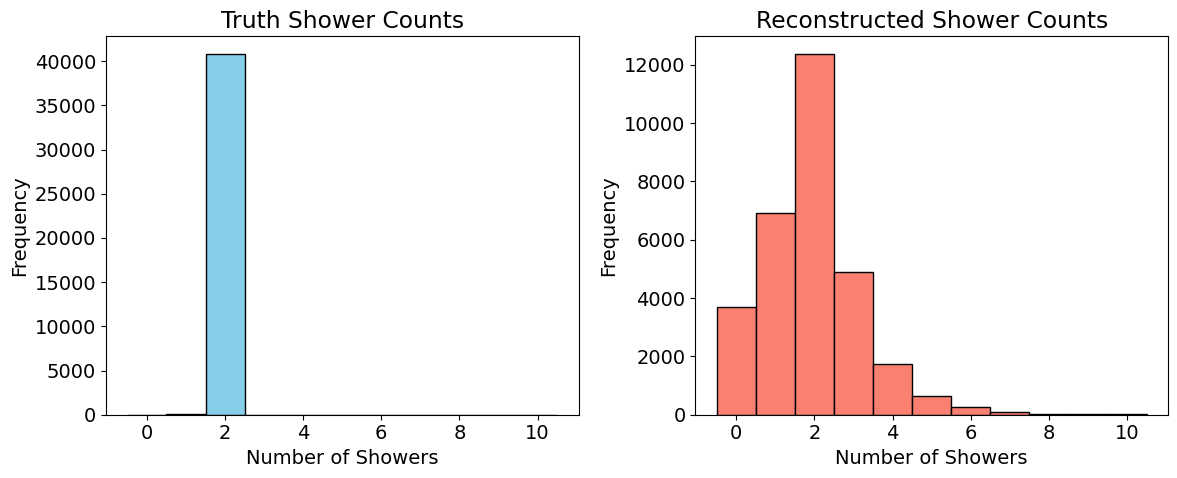

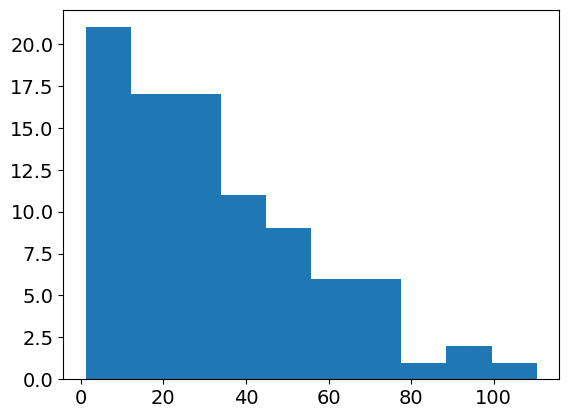

zero: 0, one: 91, two: 40770, three: 0, four: 0, binned: 988, dalitz: 445
zero: 3677, one: 6918, two: 12358, three: 4894, four: 646, binned: 11631


In [1207]:
# only look for photons from pi0 (messy worked on version)

distance = []

one_photon_distance = []

def identify_num_showers(one_event_df, index):

    reco_nu_vtx_x = one_event_df["truth_vtxX"].to_numpy()
    reco_nu_vtx_y = one_event_df["truth_vtxY"].to_numpy()
    reco_nu_vtx_z = one_event_df["truth_vtxZ"].to_numpy()
    
    distance.append(np.min([
        abs(reco_nu_vtx_x[index] - (-1.)),
        abs(reco_nu_vtx_x[index] - (254.3)),
        abs(reco_nu_vtx_y[index] - (-115.)),
        abs(reco_nu_vtx_y[index] - (117.)),
        abs(reco_nu_vtx_z[index] - (0.6)),
        abs(reco_nu_vtx_z[index] - (1036.4))]))

    kine_reco_Enus = one_event_df["kine_reco_Enu"].to_numpy()

    reco_ids = one_event_df["reco_id"].to_numpy()[index]
    reco_pdgs = one_event_df["reco_pdg"].to_numpy()[index]

    truth_ids = one_event_df["truth_id"].to_numpy()[index]
    truth_pdgs = one_event_df["truth_pdg"].to_numpy()[index]

    reco_energy = one_event_df["reco_startMomentum"].to_numpy()[index]

    truth_shower_count = 0
    reco_shower_count = 0

    pi0_in_event = 0

    if kine_reco_Enus[index] < 0:
        reco_shower_count = -999

    for j in range(len(reco_pdgs)):

        pdg = reco_pdgs[j]
        if kine_reco_Enus[index] < 0:
            #print(f'discarded event with energy {kine_reco_Enus[index]}')
            reco_shower_count = -999
            break
        #print(kine_reco_Enus[index])
        if pdg == 111:
            pi0_in_event += 1
        #if pi0_in_event > 1:
            #reco_shower_count = -999
            #break
        if pdg == 22: # shower
            #mother_index = np.where(reco_ids == reco_mother[index][j])[0]
            #if mother_index.size == 0:
            #    continue
            #mother_pdg = reco_pdg[index][mother_index]
            #print(mother_pdg)
            #if np.any(mother_pdg == 111) or np.any(mother_pdg == 0):
            #if np.any(reco_mother[index][j] == 0):
            if reco_energy[j][3] > .02:
                reco_shower_count += 1
    #if pi0_in_event == 0:
        #reco_shower_count = -999

    pi0_in_event = 0
    
    for j in range(len(truth_pdgs)):
        if truth_pdgs[j] == 111:
            pi0_in_event += 1
        if pi0_in_event > 1:
            #print(f'there were {pi0_in_event} pi0s in event')
            truth_shower_count = -999
            break
        #print(f'{pi0_in_event} pi0s in event')
        pdg = truth_pdgs[j]
        # any photons directly from mother pi0
        if pdg == 22: # shower
            mother_index = np.where(truth_ids == truth_mother[index][j])[0]
            if mother_index.size == 0:
                continue
            mother_pdg = truth_pdg[index][mother_index]
            #print(mother_pdg)
            if np.any(mother_pdg == 111):
                truth_shower_count += 1
        # make sure not dalitz decay
        if pdg == 11: # shower
            mother_index = np.where(truth_ids == truth_mother[index][j])[0]
            if mother_index.size == 0:
                continue
            mother_pdg = truth_pdg[index][mother_index]
            #print(mother_pdg)
            if np.any(mother_pdg == 111):
                truth_shower_count = -999
    #if pi0_in_event == 0:
        #truth_shower_count = -999

    if truth_shower_count == 1:
        one_photon_distance.append(distance[index])
        if distance[index] > 70:
            print(f'distance {distance[index]} for event {index}')

    return truth_shower_count, reco_shower_count

print(identify_num_showers(nu_overlay_df, 209))

truth_counts = []
reco_counts = []
for i in range(42294):
    truthcnt, recocnt = identify_num_showers(nu_overlay_df, i)
    #print(recocnt)
    #if recocnt == 0:
        #print(f'event {i} with no photons with KE: {nu_overlay_df["kine_reco_Enu"].to_numpy()[i]}')
    truth_counts.append(truthcnt)
    reco_counts.append(recocnt)

# plot histogram of truth counts, reco counts

plt.figure(figsize=(12, 5))

bins = np.arange(0, 10 + 1.5) - 0.5

# truth hist
plt.subplot(1, 2, 1)
plt.hist(truth_counts, bins, range=(-5, 5), color='skyblue', edgecolor='black')
plt.title('Truth Shower Counts')
plt.xlabel('Number of Showers')
plt.ylabel('Frequency')

# reco hist
plt.subplot(1, 2, 2)
plt.hist(reco_counts, bins, range=(-5, 5), color='salmon', edgecolor='black')
plt.title('Reconstructed Shower Counts')
plt.xlabel('Number of Showers')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

plt.plot()
plt.hist(one_photon_distance)
plt.show()

zero_true = 0
one_true = 0
two_true = 0
three_true = 0
four_true = 0
binned_true = 0
dalitz= 0

# explicit bins truth
for i in range(len(truth_counts)):
    if truth_counts[i]==0: 
        zero_true+=1
    if truth_counts[i]==1: 
        one_true+=1
        #print(f'event with 1 photon: {i}')
    if truth_counts[i]==2: 
        two_true+=1
    if truth_counts[i]==3: 
        three_true+=1
    if truth_counts[i]==4: 
        four_true+=1
    if truth_counts[i]==-999: 
        binned_true+=1
    if truth_counts[i]==-998: 
        dalitz+=1

print(f'zero: {zero_true}, one: {one_true}, two: {two_true}, three: {three_true}, four: {four_true}, binned: {binned_true}, dalitz: {dalitz}')

zero_reco = 0
one_reco = 0
two_reco = 0
three_reco = 0
four_reco = 0
binned_reco = 0

# explicit bins reco
for i in range(len(reco_counts)):
    if reco_counts[i]==0: 
        zero_reco+=1
    if reco_counts[i]==1: 
        one_reco+=1
    if reco_counts[i]==2: 
        #print(f'event with two photons with KE: {nu_overlay_df["kine_reco_Enu"].to_numpy()[i]}')
        two_reco+=1
    if reco_counts[i]==3: 
        three_reco+=1
    if reco_counts[i]==5: 
        four_reco+=1
    if reco_counts[i]==-999: 
        binned_reco+=1

print(f'zero: {zero_reco}, one: {one_reco}, two: {two_reco}, three: {three_reco}, four: {four_reco}, binned: {binned_reco}')

In [1208]:
# only look for photons from pi0 (cleaned up)

truth_distance = []
reco_distance = []
one_photon_distance = []

def identify_num_showers_0(one_event_df, index):

    reco_momentum = one_event_df["reco_startMomentum"].to_numpy()[index]
    truth_momentum = one_event_df["truth_startMomentum"].to_numpy()[index]


    truth_vtx_x = one_event_df["truth_vtxX"].to_numpy()
    truth_vtx_y = one_event_df["truth_vtxY"].to_numpy()
    truth_vtx_z = one_event_df["truth_vtxZ"].to_numpy()

    reco_vtx_x = one_event_df["reco_nuvtxX"].to_numpy()
    reco_vtx_y = one_event_df["reco_nuvtxY"].to_numpy()
    reco_vtx_z = one_event_df["reco_nuvtxZ"].to_numpy()

    truth_distance.append(np.min([
        abs(truth_vtx_x[index] - (-1.)),
        abs(truth_vtx_x[index] - (254.3)),
        abs(truth_vtx_y[index] - (-115.)),
        abs(truth_vtx_y[index] - (117.)),
        abs(truth_vtx_z[index] - (0.6)),
        abs(truth_vtx_z[index] - (1036.4))]))
    
    #print(f'min is {[ abs(truth_vtx_x[index] - (-1.)), abs(truth_vtx_x[index] - (254.3)),abs(truth_vtx_y[index] - (-115.)),abs(truth_vtx_y[index] - (117.)),abs(truth_vtx_z[index] - (0.6)),abs(truth_vtx_z[index] - (1036.4))]}')
    
    reco_distance.append(np.min([
        abs(reco_vtx_x[index] - (-1.)),
        abs(reco_vtx_x[index] - (254.3)),
        abs(reco_vtx_y[index] - (-115.)),
        abs(reco_vtx_y[index] - (117.)),
        abs(reco_vtx_z[index] - (0.6)),
        abs(reco_vtx_z[index] - (1036.4))]))
    
    

    kine_reco_Enus = one_event_df["kine_reco_Enu"].to_numpy()

    reco_ids = one_event_df["reco_id"].to_numpy()[index]
    reco_pdgs = one_event_df["reco_pdg"].to_numpy()[index]

    truth_ids = one_event_df["truth_id"].to_numpy()[index]
    truth_pdgs = one_event_df["truth_pdg"].to_numpy()[index]

    reco_energy = one_event_df["reco_startMomentum"].to_numpy()[index]

    truth_shower_count = 0
    reco_shower_count = 0

    pi0_in_event = 0

    if kine_reco_Enus[index] < 0:
        reco_shower_count = -999

    for j in range(len(reco_pdgs)):

        pdg = reco_pdgs[j]
        if kine_reco_Enus[index] < 0:
            reco_shower_count = -999
            break
        if pdg == 111:
            pi0_in_event += 1
        #if pi0_in_event > 1:
            #reco_shower_count = -999
            #break
        if pdg == 22: # shower
            #mother_index = np.where(reco_ids == reco_mother[index][j])[0]
            #if mother_index.size == 0:
            #    continue
            #mother_pdg = reco_pdg[index][mother_index]
            #if np.any(mother_pdg == 111) or np.any(mother_pdg == 0):
            #if np.any(reco_mother[index][j] == 0):
            if reco_energy[j][3] > .02:
                reco_shower_count += 1
                #if reco_energy[j][3] < .2:
                    #reco_startMomentum.append(reco_momentum[j][-1])
    #if pi0_in_event == 0:
        #reco_shower_count = -999

    pi0_in_event = 0
    
    for j in range(len(truth_pdgs)):
        if truth_pdgs[j] == 111:
            pi0_in_event += 1
        if pi0_in_event > 1:
            truth_shower_count = -999
            break
        pdg = truth_pdgs[j]
        # any photons directly from mother pi0
        if pdg == 22:
            mother_index = np.where(truth_ids == truth_mother[index][j])[0]
            if mother_index.size == 0:
                continue
            mother_pdg = truth_pdg[index][mother_index]
            if np.any(mother_pdg == 111): # and truth_momentum[j][3] > .02:
                truth_shower_count += 1
            if truth_momentum[j][3] < .2:
                truth_startMomentum.append(truth_momentum[j][-1])
        # make sure not dalitz decay
        if pdg == 11:
            mother_index = np.where(truth_ids == truth_mother[index][j])[0]
            if mother_index.size == 0:
                continue
            mother_pdg = truth_pdg[index][mother_index]
            if np.any(mother_pdg == 111):
                truth_shower_count = -999
    #if pi0_in_event == 0:
        #truth_shower_count = -999

    return truth_shower_count, reco_shower_count

truth_counts = []
reco_counts = []
for i in range(42294):
    truthcnt, recocnt = identify_num_showers_0(nu_overlay_df, i)
    truth_counts.append(truthcnt)
    reco_counts.append(recocnt)

plt.figure(figsize=(12, 5))
bins = np.arange(0, 10 + 1.5) - 0.5

# truth hist
plt.subplot(1, 2, 1)
plt.hist(truth_counts, bins, range=(-5, 5), color='skyblue', edgecolor='black')
plt.title('Truth Shower Counts')
plt.xlabel('Number of Showers')
plt.ylabel('Frequency')

# reco hist
plt.subplot(1, 2, 2)
plt.hist(reco_counts, bins, range=(-5, 5), color='salmon', edgecolor='black')
plt.title('Reconstructed Shower Counts')
plt.xlabel('Number of Showers')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

truth_counter = Counter(truth_counts)
reco_counter = Counter(reco_counts)

# Print truth bins
print(f"zero: {truth_counter[0]}, one: {truth_counter[1]}, two: {truth_counter[2]}, "
      f"three: {truth_counter[3]}, four: {truth_counter[4]}, "
      f"binned: {truth_counter[-999]}, dalitz: {truth_counter[-998]}")

# Print reco bins
print(f"zero: {reco_counter[0]}, one: {reco_counter[1]}, two: {reco_counter[2]}, "
      f"three: {reco_counter[3]}, four: {reco_counter[5]}, binned: {reco_counter[-999]}")


# make stacked histogram with events correctly reconstructed, 

# make some histograms that show truth, incorrectly reconstructed, correctly reconstructed, and binned for different values




AttributeError: 'numpy.ndarray' object has no attribute 'append'

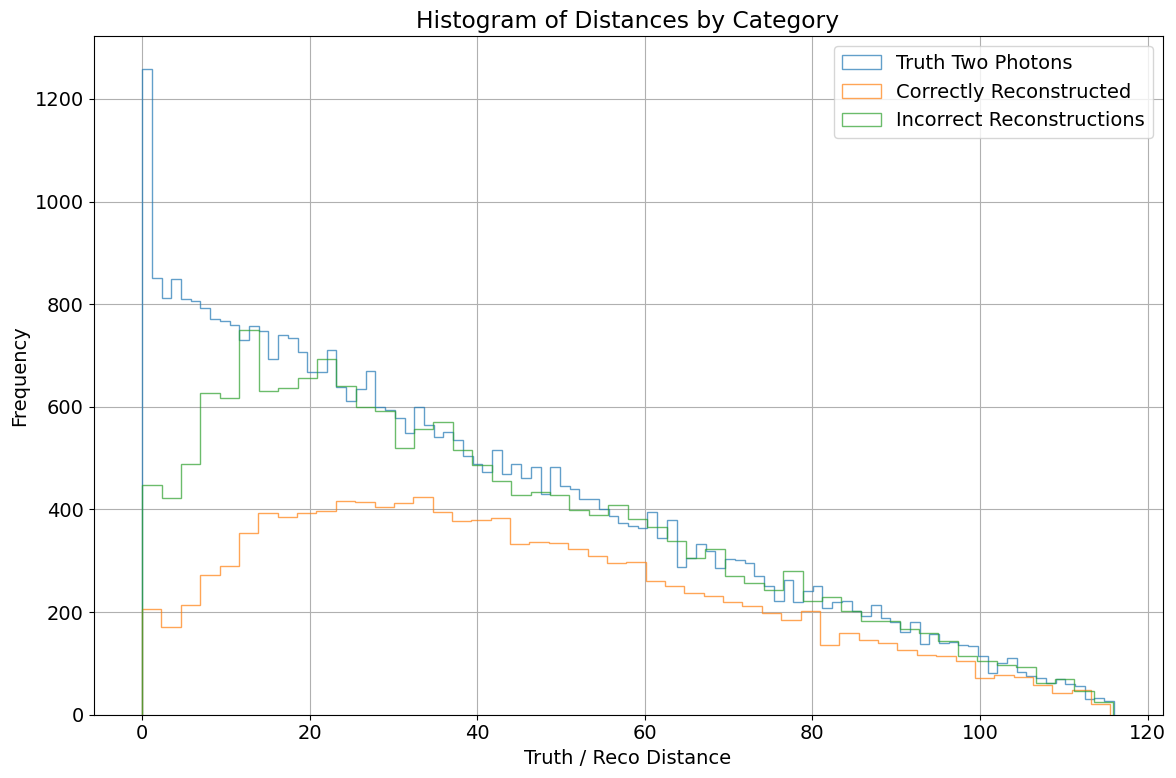

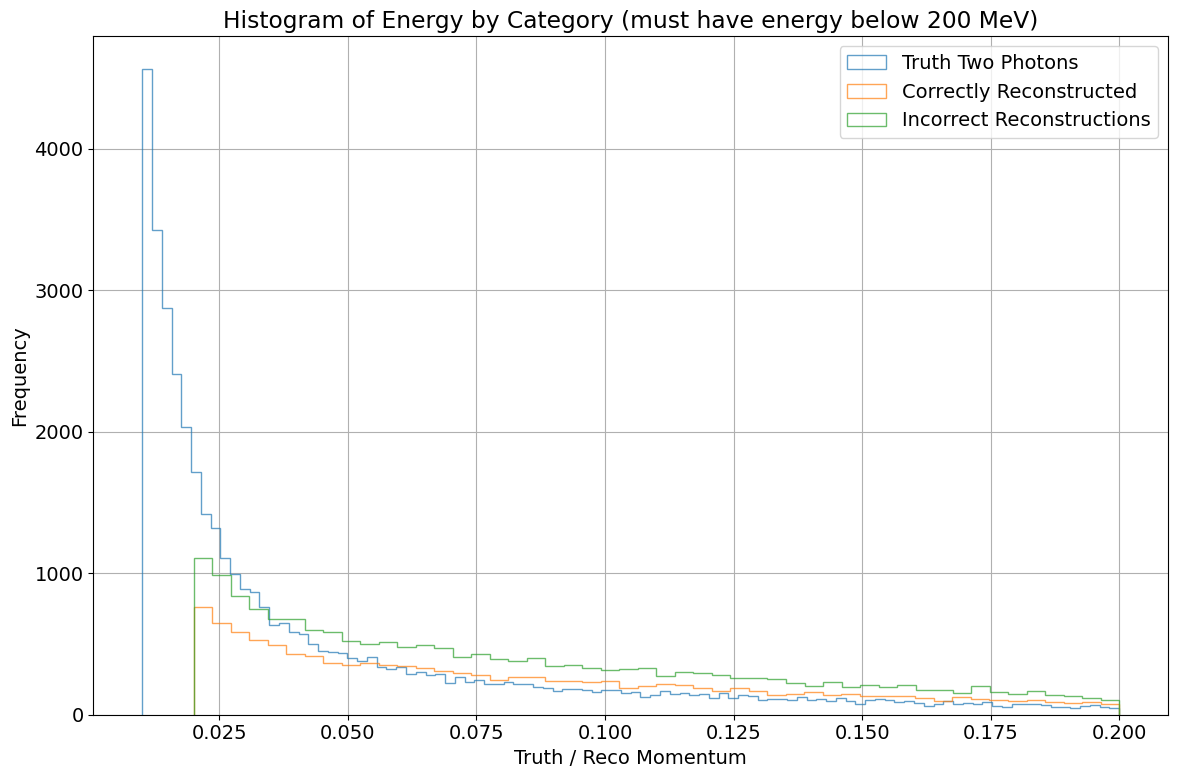

In [ ]:
# make some histograms that show truth, incorrectly reconstructed, correctly reconstructed, and binned for different values

truth_counts = []
reco_counts = []
correctly_reconstructed = []
truth_2shw = []
binned_recos = []
incorrect_reco = []

truth_distance = []
reco_distance = []
one_photon_distance = []

reco_startMomentum = []
truth_startMomentum = []

for i in range(42294):
    
    truthcnt, recocnt = identify_num_showers_0(nu_overlay_df, i)
    truth_counts.append(truthcnt)
    reco_counts.append(recocnt)
    # throw away all events with second shower too low for truth
    if truthcnt == 2:
        truth_2shw.append(i)
    if truthcnt == 1:
        continue
    elif recocnt == 2:
        correctly_reconstructed.append(i)
    elif recocnt == -999 or recocnt == -998:
        binned_recos.append(i)
    else: 
        incorrect_reco.append(i)
    

# make a histogram of distance to boundary vs the three values

def extract(values, indices):
    return [values[i] for i in indices if i < len(values)]

def make_a_hist(true_variable, reco_variable, title, xaxis):
    truth_vals = extract(true_variable, truth_2shw)
    correct_vals = extract(reco_variable, correctly_reconstructed)
    binned_vals = extract(reco_variable, binned_recos) 
    incorrect_vals = extract(reco_variable, incorrect_reco)

    plt.figure(figsize=(12, 8))

    plt.hist(truth_vals, bins=100, alpha=0.7, label='Truth Two Photons', histtype='step', stacked=True, fill=False)
    plt.hist(correct_vals, bins=50, alpha=0.7, label='Correctly Reconstructed', histtype='step', stacked=True, fill=False)
    # plt.hist(binned_vals, bins=30, alpha=0.7, label='Binned Reconstructions', histtype='step', stacked=True, fill=False)
    plt.hist(incorrect_vals, bins=50, alpha=0.7, label='Incorrect Reconstructions', histtype='step', stacked=True, fill=False)

    plt.xlabel(xaxis)
    plt.ylabel('Frequency')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


make_a_hist(truth_distance, reco_distance, 'Histogram of Distances by Category','Truth / Reco Distance' )

make_a_hist(truth_startMomentum, reco_startMomentum, 'Histogram of Energy by Category (must have energy below 200 MeV)','Truth / Reco Momentum' )


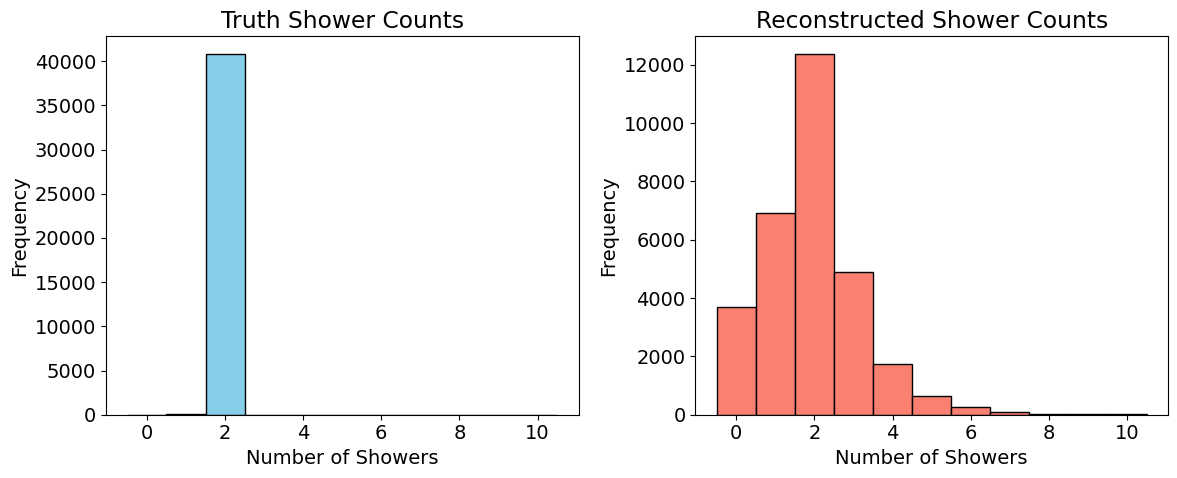

zero: 0, one: 91, two: 40770, three: 0, four: 0, binned: 988, dalitz: 445
zero: 3677, one: 6918, two: 12358, three: 4894, four: 646, binned: 11631


In [1209]:
# analyze one event function

truth_distance = []
reco_distance = []
one_photon_distance = []

def analyze_one_event(one_event_df, index):
    success = -999
    # energy
    reco_momentum = one_event_df["reco_startMomentum"].to_numpy()[index]
    truth_momentum = one_event_df["truth_startMomentum"].to_numpy()[index]
    
    nc_delta = one_event_df["nc_delta_score"].to_numpy()[index]
    nc_pi0 = one_event_df["kine_pio_flag"].to_numpy()[index]

    # distance to boundary
    truth_vtx_x = one_event_df["truth_vtxX"].to_numpy()
    truth_vtx_y = one_event_df["truth_vtxY"].to_numpy()
    truth_vtx_z = one_event_df["truth_vtxZ"].to_numpy()

    reco_vtx_x = one_event_df["reco_nuvtxX"].to_numpy()
    reco_vtx_y = one_event_df["reco_nuvtxY"].to_numpy()
    reco_vtx_z = one_event_df["reco_nuvtxZ"].to_numpy()

    truth_distance.append(np.min([
        abs(truth_vtx_x[index] - (-1.)),
        abs(truth_vtx_x[index] - (254.3)),
        abs(truth_vtx_y[index] - (-115.)),
        abs(truth_vtx_y[index] - (117.)),
        abs(truth_vtx_z[index] - (0.6)),
        abs(truth_vtx_z[index] - (1036.4))]))
      
    reco_distance.append(np.min([
        abs(reco_vtx_x[index] - (-1.)),
        abs(reco_vtx_x[index] - (254.3)),
        abs(reco_vtx_y[index] - (-115.)),
        abs(reco_vtx_y[index] - (117.)),
        abs(reco_vtx_z[index] - (0.6)),
        abs(reco_vtx_z[index] - (1036.4))]))
    
    # reconstruction status
    kine_reco_Enus = one_event_df["kine_reco_Enu"].to_numpy()

    # ids, pdgs, and mothers
    reco_ids = one_event_df["reco_id"].to_numpy()[index]
    reco_pdgs = one_event_df["reco_pdg"].to_numpy()[index]

    truth_ids = one_event_df["truth_id"].to_numpy()[index]
    truth_pdgs = one_event_df["truth_pdg"].to_numpy()[index]

    truth_mother = one_event_df["truth_mother"].to_numpy()
    reco_mother = one_event_df["reco_mother"].to_numpy()

    truth_shower_count = 0
    reco_shower_count = 0

    # initialize counter

    # bin all entries with failed reconstruction
    if kine_reco_Enus[index] < 0:
        reco_shower_count = -999
        success = 0 # binned
    else:
        delta_score.append(nc_delta)
        pi0_score.append(nc_pi0)
        pi0_in_event = 0
        for j in range(len(reco_pdgs)):
            pdg = reco_pdgs[j]
            if pdg == 111:
                pi0_in_event += 1
            if kine_reco_Enus[index] < 0:
                reco_shower_count = -999
                break
            #if pi0_in_event > 1:
            #    reco_shower_count = -999
            #    break
            if pdg == 22: # photon
                if reco_momentum[j][3] > .02: # energy must be at least 20 MeV for reco
                    reco_shower_count += 1
                mother_index = np.where(reco_ids == reco_mother[index][j])[0]
                if mother_index.size == 0:
                    continue
                mother_pdg = reco_pdg[index][mother_index]
                if np.any(mother_pdg == 111):
                    success = 2 # there was a photon that had a pi0 mother
                if reco_momentum[j][3] < .2 and reco_momentum[j][3] > .01: # must be less than 200MeV to be plotted
                    reco_startMomentum.append(reco_momentum[j][-1])
        # if pi0_in_event == 0:
            #reco_shower_count = -999
        if success != 0 and success != 2: 
            success = 1 # if not binned or correct, incorrect

    pi0_in_event = 0
        
    for j in range(len(truth_pdgs)):
        pdg = truth_pdgs[j] 
        if pdg == 111:
            pi0_in_event += 1
        if pi0_in_event > 1:
                truth_shower_count = -999
                break

            # any photons directly from mother pi0
        if pdg == 22:
                mother_index = np.where(truth_ids == truth_mother[index][j])[0]
                if mother_index.size == 0:
                    continue
                mother_pdg = truth_pdg[index][mother_index]
                if np.any(mother_pdg == 111): # and truth_momentum[j][3] > .02:
                    truth_shower_count += 1

            # make sure not dalitz decay
        if pdg == 11:
                mother_index = np.where(truth_ids == truth_mother[index][j])[0]
                if mother_index.size == 0:
                    continue
                mother_pdg = truth_pdg[index][mother_index]
                if np.any(mother_pdg == 111):
                    truth_shower_count = -999
                    success = 0 # binned
            
            # analyze: 
       # if truth_momentum[j][3] < .2:
                #truth_startMomentum.append(truth_momentum[j][-1])
        #if pi0_in_event == 0:
            #truth_shower_count = -999

    return truth_shower_count, reco_shower_count, success

truth_counts = []
reco_counts = []
success_status = []

for i in range(42294):
    truthcnt, recocnt, success = analyze_one_event(nu_overlay_df, i)
    truth_counts.append(truthcnt)
    reco_counts.append(recocnt)
    success_status.append(success)
    

plt.figure(figsize=(12, 5))
bins = np.arange(0, 10 + 1.5) - 0.5

# truth hist
plt.subplot(1, 2, 1)
plt.hist(truth_counts, bins, range=(-5, 5), color='skyblue', edgecolor='black')
plt.title('Truth Shower Counts')
plt.xlabel('Number of Showers')
plt.ylabel('Frequency')

# reco hist
plt.subplot(1, 2, 2)
plt.hist(reco_counts, bins, range=(-5, 5), color='salmon', edgecolor='black')
plt.title('Reconstructed Shower Counts')
plt.xlabel('Number of Showers')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

truth_counter = Counter(truth_counts)
reco_counter = Counter(reco_counts)

# Print truth bins
print(f"zero: {truth_counter[0]}, one: {truth_counter[1]}, two: {truth_counter[2]}, "
      f"three: {truth_counter[3]}, four: {truth_counter[4]}, "
      f"binned: {truth_counter[-999]}, dalitz: {truth_counter[-998]}")

# Print reco bins
print(f"zero: {reco_counter[0]}, one: {reco_counter[1]}, two: {reco_counter[2]}, "
      f"three: {reco_counter[3]}, four: {reco_counter[5]}, binned: {reco_counter[-999]}")


# make stacked histogram with events correctly reconstructed, 

# make some histograms that show truth, incorrectly reconstructed, correctly reconstructed, and binned for different values


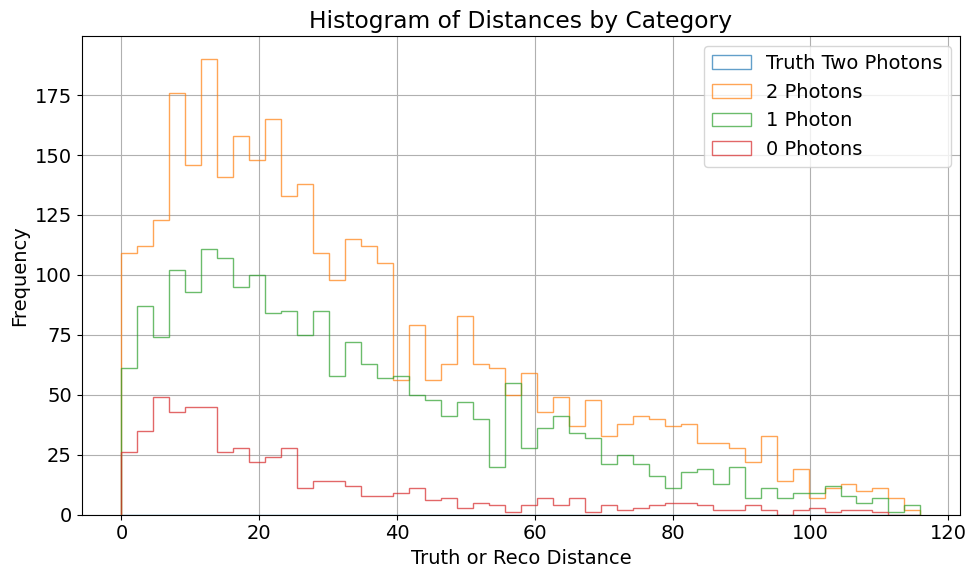

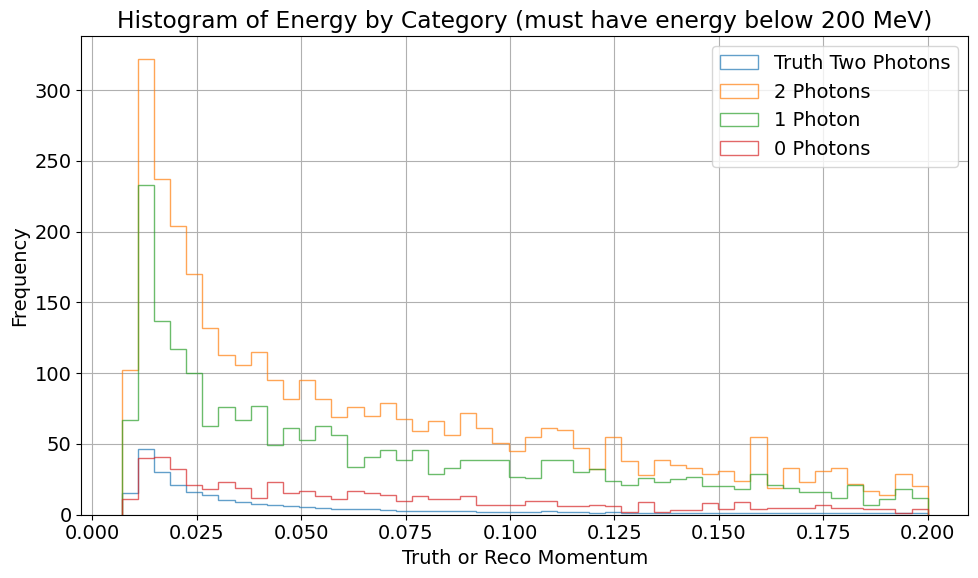

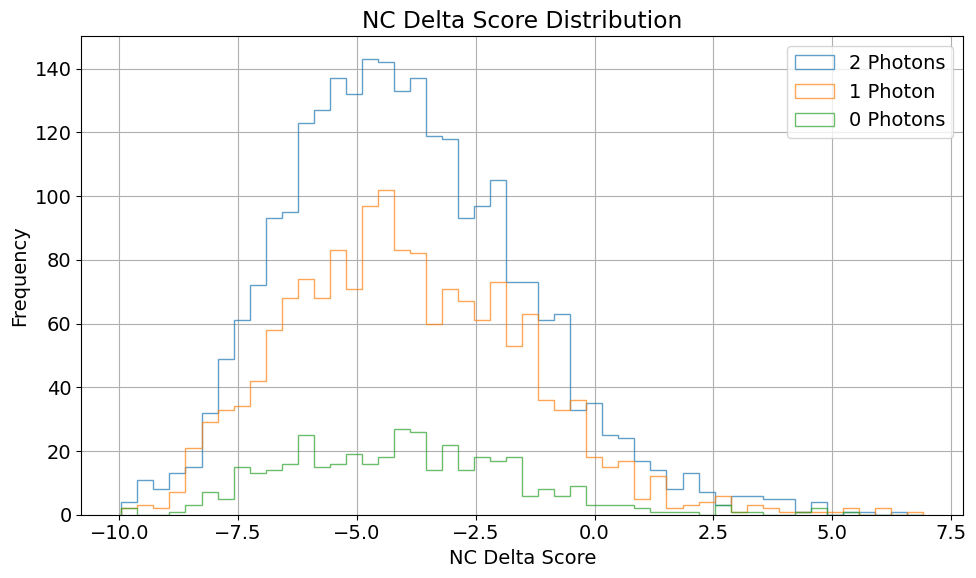

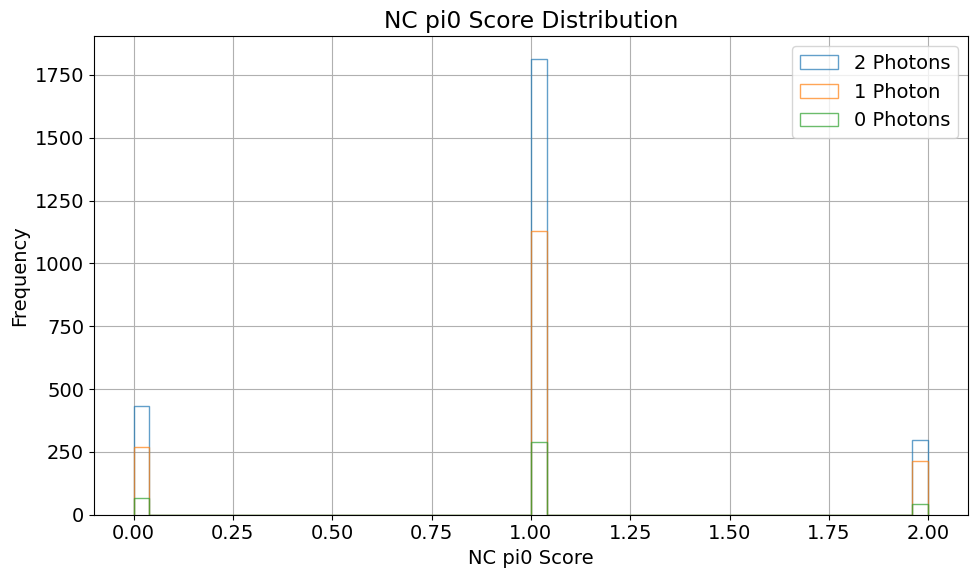

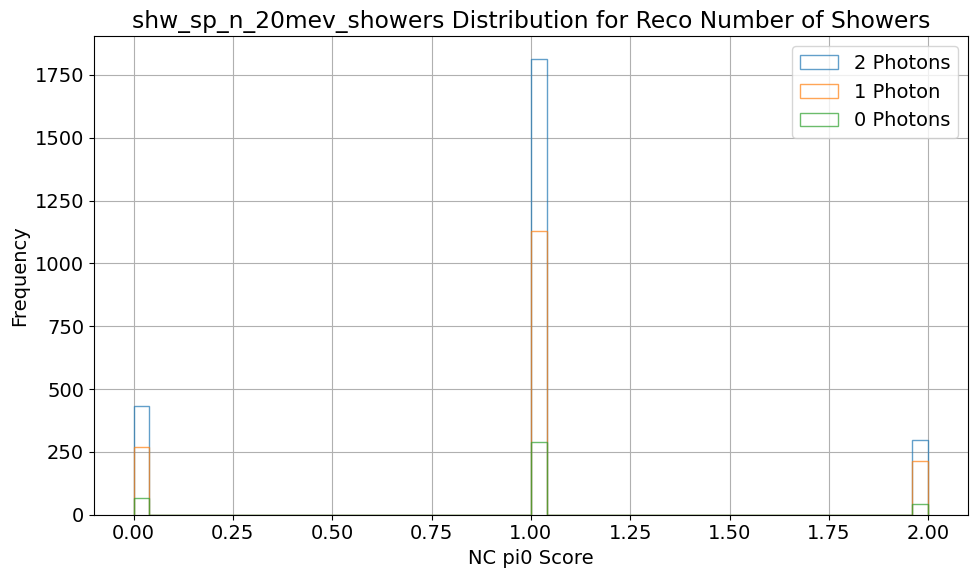

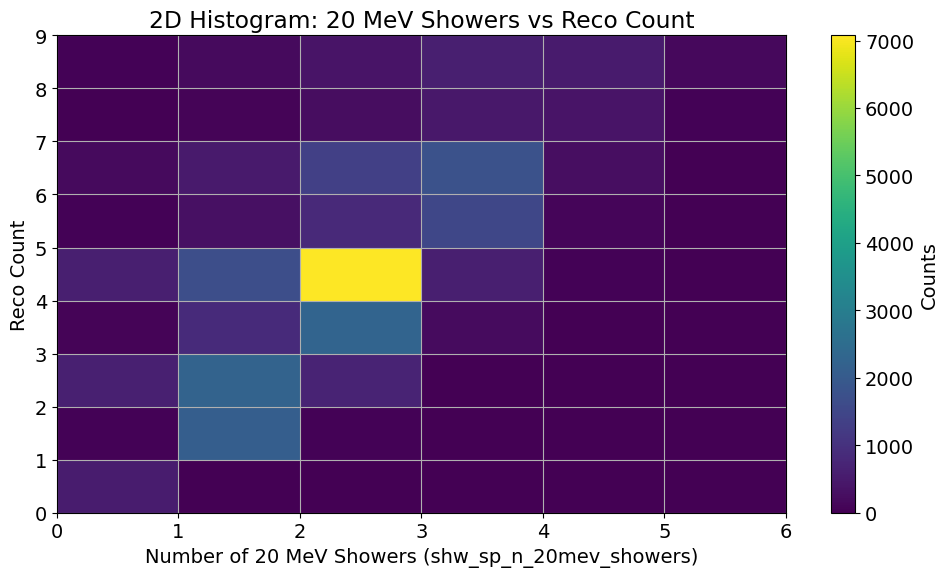

555
2183
3490


In [ ]:
# bug who knows what it is
# 
# 
# histograms that have correct + incorrect + binned = truth (x axis is always truth value)

# every single event is either reconstructed as a pi0 or not, mark every single index

# if index i is properly reconstructed as a pi0, plot its truth value with frequencies that are the reconstruction


truth_counts = []
reco_counts = []

two_reco_showers = []
pi0_reco = []
one_reco_shower = []

truth_2shw = []
binned_recos = []
incorrect_reco = []

truth_distance = []
reco_distance = []
one_photon_distance = []

reco_startMomentum = []
truth_startMomentum = []

delta_score = []
pi0_score = []

zero_photons = []

for i in range(42294):
    truthcnt, recocnt, success = analyze_one_event(nu_overlay_df, i)
    truth_counts.append(truthcnt)
    reco_counts.append(recocnt)
    # throw away all events with second shower too low for truth
    if success == 2:
        pi0_reco.append(i)
    elif success == 1:
        incorrect_reco.append(i)
     
        
    if truthcnt == 2:
        truth_2shw.append(i)
    if truthcnt == 1:
        continue
    elif recocnt == 2:
        two_reco_showers.append(i)
    elif recocnt == 1:
        one_reco_shower.append(i)
    elif recocnt == 0:
        zero_photons.append(i)
       # print(f'{nu_overlay_df["kine_pio_energy_2"].to_numpy()[i]} with success {success}')
#print(max(pi0_reco))

    

# make a histogram of distance to boundary vs the three values

def extract(values, indices):
    return [values[i] for i in indices if i < len(values)]

def make_a_hist(true_variable, reco_variable, title, xaxis):
    if true_variable is not None:
        truth_vals = extract(true_variable, truth_2shw)
    else:
        truth_vals = None
    two_photon = extract(reco_variable, two_reco_showers)
   # binned_vals = extract(reco_variable, one_reco_shower) 
    one_photon = extract(reco_variable, one_reco_shower)
    zero_photon = extract(reco_variable, zero_photons)

    plt.figure(figsize=(10, 6))

    # Remove NaNs
    if truth_vals is not None:
        truth_vals = np.array(truth_vals)
    #    truth_vals = truth_vals[~np.isnan(truth_vals)]
    two_photon = np.array(two_photon)
    #correct_vals = correct_vals[~np.isnan(correct_vals)]
    one_photon = np.array(one_photon)
    #incorrect_vals = incorrect_vals[~np.isnan(incorrect_vals)]

    # Choose bins
    if truth_vals is not None and len(truth_vals) > 0:
        bins = np.histogram_bin_edges(truth_vals, bins=50)
        plt.hist(truth_vals, bins=bins, alpha=0.7, label='Truth Two Photons', histtype='step', stacked=True, fill=False, density=True)
    elif len(two_photon) > 0:
        bins = np.histogram_bin_edges(one_photon, bins=50)
    else:
        # Set a default bin range if all data is empty
        bins = np.linspace(0, 1, 31)

    if len(two_photon) > 0:
        plt.hist(two_photon, bins=bins, alpha=0.7, label='2 Photons', histtype='step', stacked=True, fill=False, density=True)
    if len(one_photon) > 0:
        plt.hist(one_photon, bins=bins, alpha=0.7, label='1 Photon', histtype='step', stacked=True, fill=False, density=True)
    if len(zero_photon) > 0:
        plt.hist(zero_photon, bins=bins, alpha=0.7, label='0 Photons', histtype='step', stacked=True, fill=False, density=True)
           

    plt.xlabel(xaxis)
    plt.ylabel('Frequency')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

#make_a_hist(truth_distance, reco_distance, 'Histogram of Distances by Category','Truth or Reco Distance' )
#make_a_hist(truth_startMomentum, reco_startMomentum, 'Histogram of Energy by Category (must have energy below 200 MeV)','Truth or Reco Momentum' )
make_a_hist(None, delta_score, 'NC Delta Score Distribution', 'NC Delta Score')
#make_a_hist(None, pi0_score, 'NC pi0 Score Distribution', 'NC pi0 Score')
make_a_hist(None, pi0_score, 'shw_sp_n_20mev_showers Distribution for Reco Number of Showers', 'NC pi0 Score')

# Plot the 2D histogram
plt.figure(figsize=(10, 6))
plt.hist2d(x_vals, y_vals, bins=[range(0, 7), range(0, 10)], cmap='viridis')
plt.colorbar(label='Counts')
plt.xlabel('Number of 20 MeV Showers (shw_sp_n_20mev_showers)')
plt.ylabel('Reco Count')
plt.title('2D Histogram: 20 MeV Showers vs Reco Count')
plt.grid(True)
plt.tight_layout()
plt.show()



print(len(zero_photons))
print(len(one_reco_shower))
print(len(two_reco_showers))





In [ ]:
reco_counts = []

for i in range(42294):
    truthcnt, recocnt, success = analyze_one_event(nu_overlay_df, i)
    truth_counts.append(truthcnt)
    reco_counts.append(recocnt)

# Convert the DataFrame column to a NumPy array
df_counts = nu_overlay_df['shw_sp_n_20mev_showers'].to_numpy()

# Convert reco_counts to a NumPy array (if it's not already)
reco_counts = np.array(reco_counts)

# Element-wise comparison
matches = reco_counts == df_counts

# Calculate percentage of matches
percent_equal = 100 * np.sum(matches) / len(matches)

print(f"Percentage of matching counts: {percent_equal:.2f}%")

print(f'Percent of reco counts with 2 showers: {100* np.sum(reco_counts == 2) / len(reco_counts >0)}%')

print(f'Percent of wc with 2 showers: {100* np.sum(df_counts == 2) / len(df_counts)}%')


Percentage of matching counts: 8.38%
Percent of reco counts with 2 showers: 8.289591904289024%
Percent of wc with 2 showers: 30.692296779685062%


In [ ]:
print(wc_df["truth_corr_showervtxX"])

0        235.498718
1        155.019516
2         43.098202
3         83.023964
4        142.971573
            ...    
42289    227.804840
42290     66.858398
42291     99.665054
42292    197.110809
42293     97.995773
Name: truth_corr_showervtxX, Length: 42294, dtype: float64
